## Arno's Exgram keyboard layout

##### NOTE: README and evaluation tables NOT UPDATED

Exgram is a key layout optimized for comfortable and efficient touch typing in English 
created by [Arno Klein](https://binarybottle.com), and based on the Engram layout,
with [open source code](https://github.com/binarybottle/engram) to create other optimized key layouts.

Letters are optimally arranged according to ergonomics factors that promote reduction of lateral finger movements and more efficient typing of high-frequency letter pairs, by minimizing the number of bigrams consisting of two different letters and typed with the same finger. The most common punctuation marks are logically grouped together in the middle columns and numbers are paired with mathematical and logic symbols (shown as pairs of default and Shift-key-accessed characters):

         [{ 1| 2= 3~ 4+  5<  6>  7^ 8& 9% 0* ]} /\
            pP yY oO uU  '(  ")  bB dD lL vV qQ #$ @`
            cC iI eE aA  ,;  .:  nN tT rR sS zZ
            gG kK jJ xX  -_  ?!  hH mM wW fF
            
Letter frequencies (Norvig, 2012), showing that the Exgram layout emphasizes keys in the home row and typed above the home row by the middle and ring fingers, and below by the index finger:

          P   Y   O   U          B   D   L   V   Q
          C   I   E   A          N   T   R   S   Z
          G   K   J   X          H   M   W   F

         76  59 272  97         53 136 145  38   4
        119 270 445 287        258 331 224 232   3
         67  19   6   8        180  90  60  86

See below for a full description and comparisons with other key layouts.

<!--### Standard diagonal keyboard (default and Shift-key layers)
![Standard keyboard](https://github.com/binarybottle/engram/blob/master/assets/engram-800px.png?raw=true)

### "Ergonomic" orthonormal keyboard (default and Shift-key layers)
![Orthonormal keyboard](https://github.com/binarybottle/engram/blob/master/assets/engram-ergo-squeezed-800px.png?raw=true)
-->

(c) 2021 Arno Klein, MIT license

----------------

# Contents
1. [Why a new keyboard layout?](#why)
2. [How does Exgram compare with other key layouts?](#scores)
3. [Guiding criteria](#criteria)
4. Setup:
    - [Dependencies and functions](#import)
    - [Speed matrix](#speed)
    - [Strength matrix](#strength)
    - [Flow matrix and Engram scoring model](#flow)
5. Steps:
    - [Step 1: Define the shape of the key layout to minimize lateral finger movements](#step1)
    - [Step 2: Arrange the most frequent letters based on comfort and bigram frequencies](#step2)
    - [Step 3: Optimize assignment of the remaining letters](#step3)
    - [Step 4: Stability tests](#step4)
    - [Step 5: Arrange non-letter characters in easy-to-remember places](#step5)

## Why a new keyboard layout? <a name="why">

**Personal history** <br>
In the future, I hope to include an engaging rationale for why I took on this challenge.
Suffice to say I love solving problems, and I have battled repetitive strain injury 
ever since I worked on an old DEC workstation at the MIT Media Lab while composing 
my thesis back in the 1990s.
I have experimented with a wide variety of human interface technologies over the years --
voice dictation, one-handed keyboard, keyless keyboard, foot mouse, and ergonomic keyboards 
like the Kinesis Advantage and [Ergodox](https://configure.ergodox-ez.com/ergodox-ez/layouts/APXBR/latest/0) keyboards with different key switches.
While these technologies can significantly improve comfort and reduce strain, 
if you have to type on a keyboard, it can only help to use a key layout optimized according to sound ergonomics principles. 

I have used different key layouts (Qwerty, Dvorak, Colemak, etc.)
for communications and for writing and programming projects,
and have primarily relied on Colemak for the last 10 years. 
**I find that most to all of these key layouts:**

- Demand too much strain on tendons
    - *strenuous lateral extension of the index and little fingers*
- Ignore the ergonomics of the human hand
    - *different finger strengths*
    - *different finger lengths*
    - *natural roundedness of the hand*
    - *easier for shorter fingers to reach below than above longer fingers*
    - *easier for longer fingers to reach above than below shorter fingers*
    - *ease of little-to-index finger rolls vs. reverse*
- Over-emphasize alternation between hands and under-emphasize same-hand, different-finger transitions
    - *same-row, adjacent finger transitions are easy and comfortable*
    - *little-to-index finger rolls are easy and comfortable*

While I used ergonomics principles outlined below and the accompanying code to help generate the Exgram layout,
I also relied on massive bigram frequency data for the English language. 
if one were to follow the procedure below and use a different set of bigram frequencies for another language or text corpus,
they could create a variant of the Exgram layout, say "Exgram-French", better suited to the French language.
    
**Why "Exgram"?** <br>
The name is a pun, referring both to "n-gram", letter permutations and their frequencies that are used to compute the Exgram layout, but because this approach and layout is intended in part to minimize same-finger bigrams, we are removing n-grams, hence "x"-gram.

## How does Exgram compare with other key layouts? <a name="scores">

Despite the fact that the Exgram layout was designed to reduce strain and discomfort, not specifically to increase speed or reduce finger travel from the home row, it scores higher than all other key layouts (Colemak, Dvorak, QWERTY, etc.) for some large, representative, publicly available data (all text sources are listed below and available on [GitHub](https://github.com/binarybottle/text_data)). Below are tables of different prominent key layouts scored using the Engram Scoring Model (detailed below).
 
| Layout | Google bigrams | Alice | Romeo | Gita | Memento | 100K tweets | 20K tweets | MASC tweets | MASC spoken | COCA blogs | iweb | Monkey | Coder | Code |
| --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- |
| Engram | 75.03 | 74.45 | 74.62 | 74.45 | 75.12 | 75.88 | 75.53 | 75.33 | 74.34 | 75.01 | 75.21 | 75.05 | 75.37 | 75.33 |
| Halmak | 74.98 | 74.42 | 74.58 | 74.40 | 75.08 | 75.82 | 75.49 | 75.29 | 74.32 | 74.97 | 75.17 | 75.00 | 75.31 | 75.26 |
| Hieamtsrn | 75.01 | 74.45 | 74.61 | 74.43 | 75.11 | 75.86 | 75.50 | 75.32 | 74.34 | 75.00 | 75.20 | 75.04 | 75.34 | 75.23 |
| Colemak Mod-DH | 74.95 | 74.40 | 74.55 | 74.39 | 75.05 | 75.77 | 75.43 | 75.25 | 74.29 | 74.94 | 75.14 | 74.98 | 75.28 | 75.19 |
| Norman | 74.91 | 74.38 | 74.52 | 74.37 | 75.02 | 75.72 | 75.39 | 75.21 | 74.27 | 74.90 | 75.09 | 74.94 | 75.22 | 75.17 |
| Workman | 74.94 | 74.39 | 74.55 | 74.38 | 75.05 | 75.77 | 75.44 | 75.25 | 74.29 | 74.93 | 75.12 | 74.97 | 75.27 | 75.22 |
| MTGap 2.0 | 74.94 | 74.39 | 74.54 | 74.38 | 75.05 | 75.75 | 75.42 | 75.23 | 74.28 | 74.92 | 75.12 | 74.96 | 75.27 | 75.18 |
| QGMLWB | 74.91 | 74.37 | 74.52 | 74.35 | 75.02 | 75.73 | 75.40 | 75.21 | 74.27 | 74.90 | 75.09 | 74.94 | 75.23 | 75.13 |
| Colemak | 74.93 | 74.37 | 74.53 | 74.37 | 75.02 | 75.75 | 75.40 | 75.24 | 74.27 | 74.92 | 75.12 | 74.96 | 75.26 | 75.20 |
| Asset | 74.90 | 74.36 | 74.51 | 74.35 | 75.01 | 75.71 | 75.39 | 75.21 | 74.25 | 74.89 | 75.08 | 74.92 | 75.23 | 75.18 |
| Capewell-Dvorak | 74.90 | 74.37 | 74.52 | 74.35 | 75.01 | 75.73 | 75.39 | 75.21 | 74.27 | 74.90 | 75.08 | 74.93 | 75.22 | 75.15 |
| Klausler | 74.92 | 74.38 | 74.54 | 74.37 | 75.03 | 75.75 | 75.42 | 75.22 | 74.28 | 74.91 | 75.10 | 74.95 | 75.23 | 75.17 |
| Dvorak | 74.90 | 74.37 | 74.53 | 74.35 | 75.01 | 75.73 | 75.40 | 75.20 | 74.27 | 74.90 | 75.09 | 74.93 | 75.20 | 75.17 |
| QWERTY | 74.76 | 74.27 | 74.41 | 74.25 | 74.88 | 75.55 | 75.25 | 75.06 | 74.17 | 74.76 | 74.94 | 74.79 | 75.06 | 75.01 |
    
---
    
[Keyboard Layout Analyzer](http://patorjk.com/keyboard-layout-analyzer/) (KLA) scores for the same text sources:

> The optimal layout score is based on a weighted calculation that factors in the distance your fingers moved (33%), how often you use particular fingers (33%), and how often you switch fingers and hands while typing (34%).

| Layout | Alice in Wonderland | Romeo Juliet | Bhagavad Gita | Memento screenplay | 100K tweets | 20K tweets | MASC tweets | MASC spoken | COCA blogs | iweb | Monkey | Coder | Software languages |
| --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- |
| Engram    | 69.10 | 61.26 | 61.68 | 56.50 | 63.87 | 58.64 | 60.05 | 63.64 | 69.45 | 68.26 | 67.64 | 47.70 | 48.73 |
| Halmak    | 66.25 | 57.02 | 57.45 | 55.03 | 60.86 | 55.53 | 57.13 | 62.32 | 67.29 | 65.50 | 64.75 | 45.68 | 47.60 |
| Hieamtsrn | 69.43 | 60.94 | 60.87 | 56.75 | 64.40 | 58.95 | 60.47 | 64.33 | 69.93 | 69.15 | 68.30 | 46.01 | 46.48 | 
| Colemak Mod-DH | 65.74 | 56.05 | 57.52 | 54.91 | 60.75 | 54.94 | 57.15 | 61.29 | 67.12 | 65.98 | 64.85 | 47.35 | 48.50 |
| Norman    | 62.76 | 53.21 | 53.44 | 52.33 | 57.43 | 53.24 | 53.90 | 59.97 | 62.80 | 60.90 | 59.82 | 43.76 | 46.01 |
| Workman   | 64.78 | 56.67 | 56.97 | 54.29 | 59.98 | 55.81 | 56.25 | 61.34 | 65.27 | 63.76 | 62.90 | 45.33 | 47.76 |
| MTGAP 2.0 | 66.13 | 53.98 | 56.57 | 53.78 | 59.87 | 55.30 | 55.81 | 60.32 | 65.68 | 63.81 | 62.74 | 45.38 | 44.34 | 
| QGMLWB    | 65.45 | 55.67 | 55.57 | 54.07 | 60.51 | 56.05 | 56.90 | 62.23 | 66.26 | 64.76 | 63.91 | 46.38 | 45.72 |
| Colemak   | 65.83 | 56.12 | 57.63 | 54.94 | 60.67 | 54.97 | 57.04 | 61.36 | 67.14 | 66.01 | 64.91 | 47.30 | 48.65 |
| Asset     | 64.60 | 54.63 | 56.09 | 53.84 | 58.66 | 54.72 | 55.35 | 60.81 | 64.71 | 63.17 | 62.44 | 45.54 | 47.52 |
| Capewell-Dvorak | 66.94 | 58.31 | 57.39 | 55.66 | 62.14 | 56.85 | 57.99 | 62.83 | 66.95 | 65.23 | 64.70 | 45.30 | 45.62 |
| Klausler  | 68.24 | 59.91 | 59.71 | 55.75 | 62.57 | 56.45 | 58.34 | 64.04 | 68.34 | 66.89 | 66.31 | 46.83 | 45.66 |
| Dvorak    | 65.86 | 58.18 | 57.29 | 55.09 | 60.93 | 55.56 | 56.59 | 62.75 | 66.64 | 64.87 | 64.26 | 45.46 | 45.55 | 
| QWERTY    | 53.06 | 43.74 | 44.92 | 44.25 | 48.28 | 44.99 | 44.59 | 51.79 | 52.31 | 50.19 | 49.18 | 38.46 | 39.89 | 

---

| Layout | Year | Website |
| --- | --- | --- |
| Engram | 2021 | https://engram.dev |
| [Halmak 2.2](https://keyboard-design.com/letterlayout.html?layout=halmak-2-2.en.ansi) | 2016 | https://github.com/MadRabbit/halmak |
| [Hieamtsrn](https://www.keyboard-design.com/letterlayout.html?layout=hieamtsrn.en.ansi) | 2014 | https://mathematicalmulticore.wordpress.com/the-keyboard-layout-project/#comment-4976 |
| [Colemak Mod-DH](https://keyboard-design.com/letterlayout.html?layout=colemak-mod-DH-full.en.ansi) | 2014 | https://colemakmods.github.io/mod-dh/ | 
| [Norman](https://keyboard-design.com/letterlayout.html?layout=norman.en.ansi) | 2013 | https://normanlayout.info/ |
| [Workman](https://keyboard-design.com/letterlayout.html?layout=workman.en.ansi) | 2010 | https://workmanlayout.org/ | 
| [MTGAP 2.0](https://www.keyboard-design.com/letterlayout.html?layout=mtgap-2-0.en.ansi) | 2010 | https://mathematicalmulticore.wordpress.com/2010/06/21/mtgaps-keyboard-layout-2-0/ |
| [QGMLWB](https://keyboard-design.com/letterlayout.html?layout=qgmlwb.en.ansi) | 2009 | http://mkweb.bcgsc.ca/carpalx/?full_optimization | 
| [Colemak](https://keyboard-design.com/letterlayout.html?layout=colemak.en.ansi) | 2006 | https://colemak.com/ | 
| [Asset](https://keyboard-design.com/letterlayout.html?layout=asset.en.ansi) | 2006 | http://millikeys.sourceforge.net/asset/ | 
| Capewell-Dvorak | 2004 | http://michaelcapewell.com/projects/keyboard/layout_capewell-dvorak.htm |
| [Klausler](https://www.keyboard-design.com/letterlayout.html?layout=klausler.en.ansi) | 2002 | https://web.archive.org/web/20031001163722/http://klausler.com/evolved.html |
| [Dvorak](https://keyboard-design.com/letterlayout.html?layout=dvorak.en.ansi) | 1936 | https://en.wikipedia.org/wiki/Dvorak_keyboard_layout | 
| [QWERTY](https://keyboard-design.com/letterlayout.html?layout=qwerty.en.ansi) | 1873 | https://en.wikipedia.org/wiki/QWERTY |

---

| Text source | Information |
| --- | --- |
| "Alice in Wonderland" | Alice in Wonderland (Ch.1) |
| "Romeo and Juliet" | [Romeo and Juliet](https://www.fulltextarchive.com/page/Romeo-and-Juliet1/) |
| "Bhagavad Gita" | [Bhagavad Gita](https://www.gutenberg.org/files/2388/2388-h/2388-h.htm) |
| "Memento screenplay" | [Memento screenplay](https://www.dailyscript.com/scripts/memento.html) |
| "100K tweets" | 100,000 tweets from: [Sentiment140 dataset](https://data.world/data-society/twitter-user-data) training data |
| "20K tweets" | 20,000 tweets from [Gender Classifier Data](https://www.kaggle.com/crowdflower/twitter-user-gender-classification) |
| "MASC tweets" | [MASC](http://www.anc.org/data/masc/corpus/) tweets (cleaned of html markup) |
| "MASC spoken" | [MASC](http://www.anc.org/data/masc/corpus/) spoken transcripts (phone and face-to-face: 25,783 words) |
| "COCA blogs" | [Corpus of Contemporary American English](https://www.english-corpora.org/coca/) [blog samples](https://www.corpusdata.org/) |
| "Google website" | [Google homepage](https://google.com) (accessed 10/20/2020) |
| "Software languages" | "Tower of Hanoi" (programming languages A-Z from [Rosetta Code](https://rosettacode.org/wiki/Towers_of_Hanoi)) |
| "Monkey text" | Ian Douglas's English-generated [monkey0-7.txt corpus](https://zenodo.org/record/4642460) |
| "Coder text" | Ian Douglas's software-generated [coder0-7.txt corpus](https://zenodo.org/record/4642460) |
| "iweb cleaned corpus" | First 150,000 lines of Shai Coleman's [iweb-corpus-samples-cleaned.txt](https://colemak.com/pub/corpus/iweb-corpus-samples-cleaned.txt.xz) |

Reference for Monkey and Coder texts:
Douglas, Ian. (2021, March 28). Keyboard Layout Analysis: Creating the Corpus, Bigram Chains, and Shakespeare's Monkeys (Version 1.0.0). Zenodo. http://doi.org/10.5281/zenodo.4642460

## Guiding criteria   <a name="criteria">

    1.  Assign letters to keys that don't require lateral finger movements.
    2.  Promote alternating between hands over uncomfortable same-hand transitions.
    3.  Assign the most common letters to the most comfortable keys.
    4.  Arrange letters so that more frequent bigrams are easier to type.
    5.  Promote little-to-index-finger roll-ins over index-to-little-finger roll-outs.
    6.  Balance finger loads according to their relative strength.
    7.  Avoid stretching shorter fingers up and longer fingers down.
    8.  Avoid using the same finger.
    9.  Avoid skipping over the home row.
    10. Assign the most common punctuation to keys in the middle of the keyboard.
    11. Assign easy-to-remember symbols to the Shift-number keys.
    
### Factors used to compute the Exgram layout <a name="factors">
  - **N-gram letter frequencies** <br>
    
    [Peter Norvig's analysis](http://www.norvig.com/mayzner.html) of data from Google's book scanning project
  - **Flow factors** (transitions between ordered key pairs) <br>
    These factors are influenced by Dvorak's 11 criteria (1936).

### Import dependencies and functions  <a name="import">

In [91]:
# Import dependencies
import xlrd
import numpy as np
from sympy.utilities.iterables import multiset_permutations
import matplotlib
import matplotlib.pyplot as plt    
import seaborn as sns

# Print .png figures and .txt text files
print_output = False # True

# Apply strength data
apply_strength = True
min_strength_factor = 0.9

letters24 = ['E','T','A','O','I','N','S','R','H','L','D','C','U','M','F','P','G','W','Y','B','V','K','X','J']
keys24 = [1,2,3,4, 5,6,7,8, 9,10,11,12, 13,14,15,16, 17,18,19,20, 21,22,23,24]
instances24 = [4.45155E+11,3.30535E+11,2.86527E+11,2.72277E+11,2.69732E+11,2.57771E+11,
               2.32083E+11,2.23768E+11,1.80075E+11,1.44999E+11,1.36018E+11,1.19156E+11,
               97273082907,89506734085,85635440629,76112599849,66615316232,59712390260,
               59331661972,52905544693,37532682260,19261229433,8369138754,5657910830]                        


def permute_optimize_keys(fixed_letters, fixed_letter_indices, open_letter_indices, 
                          all_letters, keys, data_matrix, bigrams, bigram_frequencies, 
                          verbose=False, ntop=0):
    """
    Find all permutations of letters, optimize layout, and generate output.
    """
    matrix_selected = select_keys(data_matrix, keys, verbose=False) 
    
    unassigned_letters = []
    for all_letter in all_letters:
        if all_letter not in fixed_letters:
            unassigned_letters.append(all_letter)
            if len(unassigned_letters) == len(open_letter_indices):
                break

    letter_permutations = permute_letters(unassigned_letters, verbose)
    top_permutation, scores = optimize_layout(matrix_selected, bigrams, bigram_frequencies, letter_permutations, open_letter_indices, fixed_letters, fixed_letter_indices, verbose)

    if ntop > 0:
        print_top_scores(letter_permutations, scores, ntop)
    
    return top_permutation, letter_permutations, scores


def permute_optimize(letters, all_letters, all_keys, data_matrix, bigrams, bigram_frequencies, verbose=False, ntop=0):
    """
    Find all permutations of letters, optimize layout, and generate output.
    """
    matrix_selected = select_keys(data_matrix, all_keys, verbose=False)
    open_positions = []
    fixed_positions = [] 
    open_letters = []
    fixed_letters = []
    assigned_letters = []
    for iletter, letter in enumerate(letters):
        if letter.strip() == "":
            open_positions.append(iletter)
            for all_letter in all_letters:
                if all_letter not in letters and all_letter not in assigned_letters:
                    open_letters.append(all_letter)
                    assigned_letters.append(all_letter)
                    break
        else:
            fixed_positions.append(iletter)
            fixed_letters.append(letter)
    #print(open_positions, fixed_positions, open_letters, fixed_letters)
    letter_permutations = permute_letters(open_letters, verbose)
    top_permutation, scores = optimize_layout(matrix_selected, bigrams, bigram_frequencies, letter_permutations, open_positions, fixed_letters, fixed_positions, verbose)
    if ntop > 0:
        print_top_scores(letter_permutations, scores, ntop)
    
    return top_permutation, letter_permutations, scores


def select_keys(data_matrix, keys, verbose=False):
    """
    Select keys to quantify pairwise relationships.
    """
    # Extract pairwise entries for the keys:
    nkeys = len(keys)
    Select = np.zeros((nkeys, nkeys))
    u = 0
    for i in keys:
        u += 1
        v = 0
        for j in keys:
            v += 1
            Select[u-1,v-1] = data_matrix[i-1,j-1]

    # Normalize matrix with min-max scaling to a range with max 1:
    newMin = np.min(Select) / np.max(Select)
    newMax = 1.0
    Select = newMin + (Select - np.min(Select)) * (newMax - newMin) / (np.max(Select) - np.min(Select))
    
    if verbose:
        #print("Matrix:")
        #np.set_printoptions(precision=2); print(Select)

        # Heatmap of array
        heatmap(data=Select, title="Matrix heatmap", xlabel="Key 1", ylabel="Key 2", print_output=False); plt.show()
    
    return Select


def permute_letters(letters, verbose=False):
    """
    Find all permutations of a given set of letters (max: 8-10 letters).
    """
    letter_permutations = []
    for p in multiset_permutations(letters):
        letter_permutations.append(p)
    letter_permutations = np.array(letter_permutations)
    #if verbose:
    #    print("First permutation: {0}".format(letter_permutations[0])) 
    
    return letter_permutations


def score_layout(data_matrix, letters, bigrams, bigram_frequencies, verbose=False):
    """
    Compute the score for a given letter-key layout (NOTE normalization step).
    """
    # Create a matrix of bigram frequencies:
    nletters = len(letters)
    F2 = np.zeros((nletters, nletters))

    # Find the bigram frequency for each ordered pair of letters in the permutation:
    for i1 in range(nletters):
        for i2 in range(nletters):
            bigram = letters[i1] + letters[i2]
            i2gram = np.where(bigrams == bigram)
            if np.size(i2gram) > 0:
                F2[i1, i2] = bigram_frequencies[i2gram][0]

    # Normalize matrices with min-max scaling to a range with max 1:
    newMax = 1
    minF2 = np.min(F2)
    maxF2 = np.max(F2)
    newMin2 = minF2 / maxF2
    F2 = newMin + (F2 - minF2) * (newMax - newMin2) / (maxF2 - minF2)

    # Compute the score for this permutation:
    score  = np.average(data_matrix * F2) 
    if verbose:
        print("Score for letter permutation {0}: {1}".format(letters, score))

    return score


def tally_bigrams(input_text, bigrams, normalize=True, verbose=False):
    """
    Compute the score for a given letter-key layout (NOTE normalization step).
    """   
    # Find the bigram frequency for each ordered pair of letters in the input text
    #input_text = [str.upper(str(x)) for x in input_text]
    input_text = [str.upper(x) for x in input_text]
    nchars = len(input_text)
    F = np.zeros(len(bigrams))

    for ichar in range(0, nchars-1):
        bigram = input_text[ichar] + input_text[ichar + 1]
        i2gram = np.where(bigrams == bigram)
        if np.size(i2gram) > 0:
            F[i2gram] += 1

    # Normalize matrix with min-max scaling to a range with max 1:
    if normalize:
        newMax = 1
        newMin = np.min(F) / np.max(F)
        F = newMin + (F - np.min(F)) * (newMax - newMin) / (np.max(F) - np.min(F))

    bigram_frequencies_for_input = F

    if verbose:
        print("Bigram frequencies for input: {0}".format(bigram_frequencies_for_input))

    return bigram_frequencies_for_input


def tally_layout_samefinger_bigrams(layout, bigrams, bigram_frequencies, verbose=False):
    """
    Tally the number of same-finger bigrams within (a list of 24 letters representing) a layout:
    ['P','Y','O','U','C','I','E','A','G','K','J','X','M','D','L','B','R','T','N','S','H','V','W','F']
    """   
    #    1  2  3  4   13 14 15 16  
    #    5  6  7  8   17 18 19 20 
    #    9 10 11 12   21 22 23 24
    same_finger_keys = [[1,5],[5,9],[1,9], [2,6],[6,10],[2,10], 
                        [3,7],[7,11],[3,11], [4,8],[8,12],[4,12],
                        [13,17],[17,21],[13,21], [14,18],[18,22],[14,22], 
                        [15,19],[19,23],[15,23], [16,20],[20,24],[16,24]] 

    layout = [str.upper(x) for x in layout]
    max_frequency = 1.00273E+11

    samefinger_bigrams = []
    samefinger_bigram_counts = []
    for bigram_keys in same_finger_keys:
        bigram1 = layout[bigram_keys[0]-1] + layout[bigram_keys[1]-1]
        bigram2 = layout[bigram_keys[1]-1] + layout[bigram_keys[0]-1]
        i2gram1 = np.where(bigrams == bigram1)
        i2gram2 = np.where(bigrams == bigram2)
        if np.size(i2gram1) > 0:
            samefinger_bigrams.append(bigram1)
            samefinger_bigram_counts.append(max_frequency * bigram_frequencies[i2gram1] / np.max(bigram_frequencies))
        if np.size(i2gram2) > 0:
            samefinger_bigrams.append(bigram2)
            samefinger_bigram_counts.append(max_frequency * bigram_frequencies[i2gram2] / np.max(bigram_frequencies))

    samefinger_bigrams_total = np.sum(samefinger_bigram_counts)

    if verbose:
        print("    Total same-finger bigram frequencies: {0:15.0f}".format(samefinger_bigrams_total))

    return samefinger_bigrams, samefinger_bigram_counts, samefinger_bigrams_total 


def optimize_layout(data_matrix, bigrams, bigram_frequencies, letter_permutations, open_positions, fixed_letters, fixed_positions=[], verbose=False):
    """
    Compute scores for all letter-key layouts.
    """
    iter = 0
    top_score = 0
    scores = []
    use_score_function = False

    nletters = len(open_positions) + len(fixed_positions)
    top_permutation = np.array(['E' for x in range(nletters)])
    F2 = np.zeros((nletters, nletters))

    # Loop through the permutations of the selected letters:
    for p in letter_permutations:
        letters = np.array(['E' for x in range(nletters)])  # KEEP to initialize!
        for imove, open_position in enumerate(open_positions):
            letters[open_position] = p[imove]
        for ifixed, fixed_position in enumerate(fixed_positions):
            letters[fixed_position] = fixed_letters[ifixed]

        # Compute the score for this permutation:
        if use_score_function:
            score = score_layout(data_matrix, letters, bigrams, bigram_frequencies, verbose=False)
        else:
            # Find the bigram frequency for each ordered pair of letters in the permutation:
            for i1 in range(nletters):
                for i2 in range(nletters):
                    bigram = letters[i1] + letters[i2]
                    i2gram = np.where(bigrams == bigram)
                    if np.size(i2gram) > 0:
                        F2[i1, i2] = bigram_frequencies[i2gram][0]

            # Normalize matrices with min-max scaling to a range with max 1:
            newMax = 1
            minF2 = np.min(F2)
            maxF2 = np.max(F2)
            newMin2 = minF2 / maxF2
            F = newMin + (F2 - minF2) * (newMax - newMin2) / (maxF2 - minF2)

            # Compute the score for this permutation:
            score  = np.average(data_matrix * F) 

        # Store all scores and the top score and permutation:
        scores.append(score)
        if score > top_score:
            top_score = score
            top_permutation = letters
            
    #print("Topmost of {0} permutations: {1}".format(len(letter_permutations), top_score))
    if verbose:
        print("{0:0.8f}".format(top_score))
        print(*top_permutation)
        
    return top_permutation, scores


def exchange_letters(letters, fixed_letter_indices, all_letters, all_keys, data_matrix, 
                     bigrams, bigram_frequencies, verbose=True, ntop=0):
    """
    Exchange letters, 8 keys at a time (8! = 40,320) selected twice in 32 different ways:

    Indices:
         0  1  2  3     12 13 14 15
         4  5  6  7     16 17 18 19
         8  9 10 11     20 21 22 23 

    1. Top rows
         0  1  2  3     12 13 14 15
    2. Bottom rows
         8  9 10 11     20 21 22 23 
    3. Top and bottom rows on the right side
                        12 13 14 15
                        20 21 22 23 
    4. Top and bottom rows on the left side 
         0  1  2  3
         8  9 10 11 
    5. Top right and bottom left rows
                        12 13 14 15
         8  9 10 11 
    6. Top left and bottom right rows 
         0  1  2  3
                        20 21 22 23 
    7. Center of the top and bottom rows on both sides
            1  2          13 14
            9 10          21 22
    8. The eight corners
         0        3    12       15
         8       11    20       23 
    9. Left half of the top and bottom rows on both sides 
         0  1          12 13
         8  9          20 21
    10. Right half of the top and bottom rows on both sides
               2  3          14 15
              10 11          22 23 
    11. Left half of non-home rows on the left and right half of the same rows on the right 
         0  1                14 15
         8  9                22 23 
    12. Right half of non-home rows on the left and left half of the same rows on the right
               2  3    12 13
              10 11    20 21 
    13. Top center and lower sides
            1  2           13 14
         8       11     20       23 
    14. Top sides and lower center
         0        3     12       15
            9 10           21 22   
    15. Repeat 1-14
         
    """
    score = score_layout(data_matrix, letters, bigrams, bigram_frequencies, verbose=False)
    print('Initial score: {0}'.format(score)) 
    print(*letters) 
    top_permutation = letters

    lists_of_open_indices = [
        [0,1,2,3,12,13,14,15],
        [8,9,10,11,20,21,22,23],
        [12,13,14,15,20,21,22,23],
        [0,1,2,3,8,9,10,11],
        [12,13,14,15,8,9,10,11],
        [0,1,2,3,20,21,22,23],
        [1,2,13,14,9,10,21,22],
        [0,3,12,15,8,11,20,23],
        [0,1,12,13,8,9,20,21],
        [2,3,14,15,10,11,22,23],
        [0,1,14,15,8,9,22,23],
        [2,3,12,13,10,11,20,21],
        [1,2,8,11,13,14,20,23],
        [0,3,9,10,12,15,21,22]  
    ]
    lists_of_print_statements = [
        '1. Top rows',
        '2. Bottom rows',
        '3. Top and bottom rows on the right side',
        '4. Top and bottom rows on the left side',
        '5. Top right and bottom left rows',
        '6. Top left and bottom right rows',
        '7. Center of the top and bottom rows on both sides',
        '8. The eight corners',
        '9. Left half of the top and bottom rows on both sides',
        '10. Right half of the top and bottom rows on both sides',
        '11. Left half of non-home rows on the left and right half of the same rows on the right',
        '12. Right half of non-home rows on the left and left half of the same rows on the right',
        '13. Top center and lower sides',
        '14. Top sides and lower center'
    ]
                         
    for istep in [1,2]:
        if istep == 1:
            s = "First set of 14 letter exchanges: "
        elif istep == 2:
            s = "Second set of 14 letter exchanges: "

        for ilist, open_indices in enumerate(lists_of_open_indices):
            print_statement = lists_of_print_statements[ilist]     

            if verbose:
                print('{0} {1}'.format(s, print_statement))
                             
            for open_index in open_indices:
                if open_index not in fixed_letter_indices:
                    top_permutation[open_index] = ''
                    
            top_permutation, letter_permutations, scores = permute_optimize(top_permutation, letters24, keys24, data_matrix, bigrams, bigram_frequencies, verbose=True, ntop=0)            
            top_permutation = top_permutation.tolist()
        
    if verbose:
        print('')
        print('    -------- DONE --------') 
        print('')

    return top_permutation
                             

def rank_within_epsilon(numbers, epsilon, factor=False, verbose=True):
    """
    numbers = np.array([10,9,8,7,6])
    epsilon = 1
    rank_within_epsilon(numbers, epsilon, factor=False, verbose=True) 
    >>> array([1., 1., 2., 2., 3.])
    numbers = np.array([0.798900824, 0.79899900824, 0.79900824])
    epsilon = 0.9**8 - 0.9**9
    factor = ((24**2 - 1) + (1-epsilon)) / (24**2) # 0.999925266109375
    rank_within_epsilon(numbers, factor, factor=True, verbose=True) 
    >>> array([2., 1., 1.])
    """
    numbers = np.array(numbers)
    Isort = np.argsort(-numbers)
    numbers_sorted = numbers[Isort]
    count = 1
    ranks = np.zeros(np.size(numbers))
    for i, num in enumerate(numbers_sorted):
        if ranks[i] == 0:
            if factor:
                lower_bound = num * epsilon
            else:
                lower_bound = num - epsilon
            bounded_nums1 = num >= numbers_sorted
            bounded_nums2 = numbers_sorted >= lower_bound
            bounded_nums = bounded_nums1 * bounded_nums2
            count += 1
            for ibounded, bounded_num in enumerate(bounded_nums):
                if bounded_num == True:
                    ranks[ibounded] = count

    uranks = np.unique(ranks)
    nranks = np.size(uranks)
    new_ranks = ranks.copy()
    new_count = 0
    for rank in uranks:
        new_count += 1
        same_ranks = ranks == rank
        for isame, same_rank in enumerate(same_ranks):
            if same_rank == True:
                new_ranks[isame] = new_count

    #ranks_sorted = new_ranks[Isort]
    ranks_sorted = [np.int(x) for x in new_ranks]
    
    if verbose:
        for i, num in enumerate(numbers_sorted):
            print("    ({0})    {1}".format(np.int(ranks_sorted[i]), num))
        
    return numbers_sorted, ranks_sorted, Isort

In [92]:
def print_top_scores(letter_permutations, scores, ntop):
    """
    Print top-scored letter permutations.
    """
    scores_negative = -np.array(scores)
    isort = np.argsort(scores_negative)[:ntop]
    sorted_scores = [scores[isort[x]] for x in range(len(isort))]
    sorted_letter_permutations = [letter_permutations[isort[x]].tolist() for x in range(len(isort))]
    for ix, x in enumerate(sorted_letter_permutations):
        print("{0:0.8f}".format(sorted_scores[ix]))
        print(*x)
    
def print_matrix_info(matrix_data, matrix_label, nkeys, nlines=10):
    """
    Print matrix output.
    """
    print("{0} min = {1}, max = {2}".format(matrix_label, np.min(matrix_data), np.max(matrix_data)))
    matrix_flat = matrix_data.flatten()
    argsort = np.argsort(matrix_flat)
    print("{0} key number pairs with minimum values:".format(matrix_label))
    for x in argsort[0:nlines]:
        if x % nkeys == 0:
            min_row = np.int(np.ceil(x / nkeys)) + 1
            min_col = 1
        else:
            min_row = np.int(np.ceil(x / nkeys))
            min_col = x - nkeys * (min_row-1) + 1                
        print("        {0} -> {1}        ({2})".format(min_row, min_col, matrix_flat[x]))
    print("{0} key number pairs with maximum values:".format(matrix_label))
    max_sort = argsort[-nlines::]
    for x in max_sort[::-1]:
        if x % nkeys == 0:
            max_row = np.int(np.ceil(x / nkeys)) + 1
            max_col = 1
        else:
            max_row = np.int(np.ceil(x / nkeys))
            max_col = x - nkeys * (max_row-1) + 1                
        print("        {0} -> {1}        ({2})".format(max_row, max_col, matrix_flat[x]))


def heatmap(data, title="", xlabel="", ylabel="", x_axis_labels=[], y_axis_labels=[], print_output=True):
    """
    Plot heatmap of matrix.
    """
    # use heatmap function, set the color as viridis and
    # make each cell seperate using linewidth parameter
    plt.figure()
    sns_plot = sns.heatmap(data, xticklabels=x_axis_labels, yticklabels=y_axis_labels, linewidths=1, 
                           cmap="viridis", square=True, vmin=np.min(data), vmax=np.max(data))
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    sns_plot.set_xticklabels(x_axis_labels)  #, rotation=75) 
    sns_plot.set_yticklabels(y_axis_labels) 
    if print_output:
        sns_plot.figure.savefig("{0}_heatmap.png".format(title))
        
    
def histmap(data, title="", print_output=True):
    """
    Plot histogram.
    """
    sns.distplot(data)
    plt.title(title)
    if print_output:
        sns_plot.figure.savefig("{0}_histogram.png".format(title))
        
        
def print_layout24(layout):
    """
    Print layout.
    """   
    print('    {0}  {1}'.format(' '.join(layout[0:4]),
                                ' '.join(layout[12:16])))
    print('    {0}  {1}'.format(' '.join(layout[4:8]),
                                ' '.join(layout[16:20])))
    print('    {0}  {1}'.format(' '.join(layout[8:12]),
                                ' '.join(layout[20:24])))


def print_layout24_instances(layout, letters24, instances24, bigrams, bigram_frequencies):
    """
    Print billions of instances per letter (not Z or Q) in layout form.
    layout = ['P','Y','O','U','C','I','E','A','G','K','J','X','M','D','L','B','R','T','N','S','H','V','W','F']
    print_layout24_instances(layout, letters24, instances24, bigrams, bigram_frequencies)
    """
    layout_instances = []
    layout_instances_strings = []
    for letter in layout:
        index = letters24.index(letter)
        layout_instances.append(instances24[index])
        layout_instances_strings.append('{0:3.0f}'.format(instances24[index]/1000000000))
 
    print('    {0}  {1}'.format(' '.join(layout_instances_strings[0:4]),
                                ' '.join(layout_instances_strings[12:16])))
    print('    {0}  {1}'.format(' '.join(layout_instances_strings[4:8]),
                                ' '.join(layout_instances_strings[16:20])))
    print('    {0}  {1}'.format(' '.join(layout_instances_strings[8:12]),
                                ' '.join(layout_instances_strings[20:24])))
    left_sum = np.sum(layout_instances[0:12])/1000000000000
    right_sum = np.sum(layout_instances[12:24])/1000000000000
    pL = ''
    pR = ''
    if left_sum > right_sum:
        pL = ' ({0:3.2f}%)'.format(100 * (left_sum - right_sum) / right_sum)
    elif right_sum > left_sum:
        pR = ' ({0:3.2f}%)'.format(100 * (right_sum - left_sum) / left_sum)
    
    print('\n    left: {0:3.3f}T{1}  right: {2:3.3f}T{3}'.format(left_sum, pL, 
                                                                 right_sum, pR))
    
    tally_layout_samefinger_bigrams(layout, bigrams, bigram_frequencies, verbose=True)

### Bigram frequencies <a name="ngrams">

[Peter Norvig's ngrams table](http://www.norvig.com/mayzner.html](http://www.norvig.com/mayzner.html)
    
[NOTE: If you want to compute an optimized layout for another language, or based on another corpus, you can run the tally_bigrams() function above and replace bigram_frequencies below before running the rest of the code.]

In [93]:
load_original_ngram_files = True
if load_original_ngram_files:
    ngrams_table = "data/bigrams-trigrams-frequencies.xlsx"
    wb = xlrd.open_workbook(ngrams_table) 
    ngrams_sheet = wb.sheet_by_index(0)
    # 1-grams and frequencies
    onegrams = np.array(())
    onegram_frequencies = np.array(())
    i = 0
    start1 = 0
    stop1 = 0
    while stop1 == 0:
        if ngrams_sheet.cell_value(i, 0) == "2-gram":
            stop1 = 1
        elif ngrams_sheet.cell_value(i, 0) == "1-gram":
            start1 = 1
        elif start1 == 1:
            onegrams = np.append(onegrams, ngrams_sheet.cell_value(i, 0))
            onegram_frequencies = np.append(onegram_frequencies, ngrams_sheet.cell_value(i, 1))
        i += 1
    onegram_frequencies = onegram_frequencies / np.sum(onegram_frequencies)

    # 2-grams and frequencies
    bigrams = np.array(())
    bigram_frequencies = np.array(())
    i = 0
    start1 = 0
    stop1 = 0
    while stop1 == 0:
        if ngrams_sheet.cell_value(i, 0) == "3-gram":
            stop1 = 1
        elif ngrams_sheet.cell_value(i, 0) == "2-gram":
            start1 = 1
        elif start1 == 1:
            bigrams = np.append(bigrams, ngrams_sheet.cell_value(i, 0))
            bigram_frequencies = np.append(bigram_frequencies, ngrams_sheet.cell_value(i, 1))
        i += 1
    bigram_frequencies = bigram_frequencies / np.sum(bigram_frequencies)

    # Save:
    if print_output:
        file = open("onegrams.txt", "w+")
        file.write(str(onegrams))
        file.close()
        file = open("onegram_frequencies.txt", "w+")
        file.write(str(onegram_frequencies))
        file.close()
        file = open("bigrams.txt", "w+")
        file.write(str(bigrams))
        file.close()
        file = open("bigram_frequencies.txt", "w+")
        file.write(str(bigram_frequencies))
        file.close()

    # Print:
    print(repr(onegrams))
    print(repr(onegram_frequencies))
    print(repr(bigrams))
    print(repr(bigram_frequencies))

else:
    onegrams = np.array(['E', 'T', 'A', 'O', 'I', 'N', 'S', 'R', 'H', 'L', 'D', 'C', 'U',
       'M', 'F', 'P', 'G', 'W', 'Y', 'B', 'V', 'K', 'X', 'J', 'Q', 'Z'],
      dtype='<U32')
    onegram_frequencies = np.array([0.12492063, 0.09275565, 0.08040605, 0.07640693, 0.07569278,
       0.07233629, 0.06512767, 0.06279421, 0.05053301, 0.04068986,
       0.03816958, 0.03343774, 0.02729702, 0.02511761, 0.02403123,
       0.02135891, 0.01869376, 0.01675664, 0.0166498 , 0.01484649,
       0.01053252, 0.00540513, 0.00234857, 0.00158774, 0.00120469,
       0.00089951])
    bigrams = np.array(['TH', 'HE', 'IN', 'ER', 'AN', 'RE', 'ON', 'AT', 'EN', 'ND', 'TI',
       'ES', 'OR', 'TE', 'OF', 'ED', 'IS', 'IT', 'AL', 'AR', 'ST', 'TO',
       'NT', 'NG', 'SE', 'HA', 'AS', 'OU', 'IO', 'LE', 'VE', 'CO', 'ME',
       'DE', 'HI', 'RI', 'RO', 'IC', 'NE', 'EA', 'RA', 'CE', 'LI', 'CH',
       'LL', 'BE', 'MA', 'SI', 'OM', 'UR', 'CA', 'EL', 'TA', 'LA', 'NS',
       'DI', 'FO', 'HO', 'PE', 'EC', 'PR', 'NO', 'CT', 'US', 'AC', 'OT',
       'IL', 'TR', 'LY', 'NC', 'ET', 'UT', 'SS', 'SO', 'RS', 'UN', 'LO',
       'WA', 'GE', 'IE', 'WH', 'EE', 'WI', 'EM', 'AD', 'OL', 'RT', 'PO',
       'WE', 'NA', 'UL', 'NI', 'TS', 'MO', 'OW', 'PA', 'IM', 'MI', 'AI',
       'SH', 'IR', 'SU', 'ID', 'OS', 'IV', 'IA', 'AM', 'FI', 'CI', 'VI',
       'PL', 'IG', 'TU', 'EV', 'LD', 'RY', 'MP', 'FE', 'BL', 'AB', 'GH',
       'TY', 'OP', 'WO', 'SA', 'AY', 'EX', 'KE', 'FR', 'OO', 'AV', 'AG',
       'IF', 'AP', 'GR', 'OD', 'BO', 'SP', 'RD', 'DO', 'UC', 'BU', 'EI',
       'OV', 'BY', 'RM', 'EP', 'TT', 'OC', 'FA', 'EF', 'CU', 'RN', 'SC',
       'GI', 'DA', 'YO', 'CR', 'CL', 'DU', 'GA', 'QU', 'UE', 'FF', 'BA',
       'EY', 'LS', 'VA', 'UM', 'PP', 'UA', 'UP', 'LU', 'GO', 'HT', 'RU',
       'UG', 'DS', 'LT', 'PI', 'RC', 'RR', 'EG', 'AU', 'CK', 'EW', 'MU',
       'BR', 'BI', 'PT', 'AK', 'PU', 'UI', 'RG', 'IB', 'TL', 'NY', 'KI',
       'RK', 'YS', 'OB', 'MM', 'FU', 'PH', 'OG', 'MS', 'YE', 'UD', 'MB',
       'IP', 'UB', 'OI', 'RL', 'GU', 'DR', 'HR', 'CC', 'TW', 'FT', 'WN',
       'NU', 'AF', 'HU', 'NN', 'EO', 'VO', 'RV', 'NF', 'XP', 'GN', 'SM',
       'FL', 'IZ', 'OK', 'NL', 'MY', 'GL', 'AW', 'JU', 'OA', 'EQ', 'SY',
       'SL', 'PS', 'JO', 'LF', 'NV', 'JE', 'NK', 'KN', 'GS', 'DY', 'HY',
       'ZE', 'KS', 'XT', 'BS', 'IK', 'DD', 'CY', 'RP', 'SK', 'XI', 'OE',
       'OY', 'WS', 'LV', 'DL', 'RF', 'EU', 'DG', 'WR', 'XA', 'YI', 'NM',
       'EB', 'RB', 'TM', 'XC', 'EH', 'TC', 'GY', 'JA', 'HN', 'YP', 'ZA',
       'GG', 'YM', 'SW', 'BJ', 'LM', 'CS', 'II', 'IX', 'XE', 'OH', 'LK',
       'DV', 'LP', 'AX', 'OX', 'UF', 'DM', 'IU', 'SF', 'BT', 'KA', 'YT',
       'EK', 'PM', 'YA', 'GT', 'WL', 'RH', 'YL', 'HS', 'AH', 'YC', 'YN',
       'RW', 'HM', 'LW', 'HL', 'AE', 'ZI', 'AZ', 'LC', 'PY', 'AJ', 'IQ',
       'NJ', 'BB', 'NH', 'UO', 'KL', 'LR', 'TN', 'GM', 'SN', 'NR', 'FY',
       'MN', 'DW', 'SB', 'YR', 'DN', 'SQ', 'ZO', 'OJ', 'YD', 'LB', 'WT',
       'LG', 'KO', 'NP', 'SR', 'NQ', 'KY', 'LN', 'NW', 'TF', 'FS', 'CQ',
       'DH', 'SD', 'VY', 'DJ', 'HW', 'XU', 'AO', 'ML', 'UK', 'UY', 'EJ',
       'EZ', 'HB', 'NZ', 'NB', 'MC', 'YB', 'TP', 'XH', 'UX', 'TZ', 'BV',
       'MF', 'WD', 'OZ', 'YW', 'KH', 'GD', 'BM', 'MR', 'KU', 'UV', 'DT',
       'HD', 'AA', 'XX', 'DF', 'DB', 'JI', 'KR', 'XO', 'CM', 'ZZ', 'NX',
       'YG', 'XY', 'KG', 'TB', 'DC', 'BD', 'SG', 'WY', 'ZY', 'AQ', 'HF',
       'CD', 'VU', 'KW', 'ZU', 'BN', 'IH', 'TG', 'XV', 'UZ', 'BC', 'XF',
       'YZ', 'KM', 'DP', 'LH', 'WF', 'KF', 'PF', 'CF', 'MT', 'YU', 'CP',
       'PB', 'TD', 'ZL', 'SV', 'HC', 'MG', 'PW', 'GF', 'PD', 'PN', 'PC',
       'RX', 'TV', 'IJ', 'WM', 'UH', 'WK', 'WB', 'BH', 'OQ', 'KT', 'RQ',
       'KB', 'CG', 'VR', 'CN', 'PK', 'UU', 'YF', 'WP', 'CZ', 'KP', 'DQ',
       'WU', 'FM', 'WC', 'MD', 'KD', 'ZH', 'GW', 'RZ', 'CB', 'IW', 'XL',
       'HP', 'MW', 'VS', 'FC', 'RJ', 'BP', 'MH', 'HH', 'YH', 'UJ', 'FG',
       'FD', 'GB', 'PG', 'TK', 'KK', 'HQ', 'FN', 'LZ', 'VL', 'GP', 'HZ',
       'DK', 'YK', 'QI', 'LX', 'VD', 'ZS', 'BW', 'XQ', 'MV', 'UW', 'HG',
       'FB', 'SJ', 'WW', 'GK', 'UQ', 'BG', 'SZ', 'JR', 'QL', 'ZT', 'HK',
       'VC', 'XM', 'GC', 'FW', 'PZ', 'KC', 'HV', 'XW', 'ZW', 'FP', 'IY',
       'PV', 'VT', 'JP', 'CV', 'ZB', 'VP', 'ZR', 'FH', 'YV', 'ZG', 'ZM',
       'ZV', 'QS', 'KV', 'VN', 'ZN', 'QA', 'YX', 'JN', 'BF', 'MK', 'CW',
       'JM', 'LQ', 'JH', 'KJ', 'JC', 'GZ', 'JS', 'TX', 'FK', 'JL', 'VM',
       'LJ', 'TJ', 'JJ', 'CJ', 'VG', 'MJ', 'JT', 'PJ', 'WG', 'VH', 'BK',
       'VV', 'JD', 'TQ', 'VB', 'JF', 'DZ', 'XB', 'JB', 'ZC', 'FJ', 'YY',
       'QN', 'XS', 'QR', 'JK', 'JV', 'QQ', 'XN', 'VF', 'PX', 'ZD', 'QT',
       'ZP', 'QO', 'DX', 'HJ', 'GV', 'JW', 'QC', 'JY', 'GJ', 'QB', 'PQ',
       'JG', 'BZ', 'MX', 'QM', 'MZ', 'QF', 'WJ', 'ZQ', 'XR', 'ZK', 'CX',
       'FX', 'FV', 'BX', 'VW', 'VJ', 'MQ', 'QV', 'ZF', 'QE', 'YJ', 'GX',
       'KX', 'XG', 'QD', 'XJ', 'SX', 'VZ', 'VX', 'WV', 'YQ', 'BQ', 'GQ',
       'VK', 'ZJ', 'XK', 'QP', 'HX', 'FZ', 'QH', 'QJ', 'JZ', 'VQ', 'KQ',
       'XD', 'QW', 'JX', 'QX', 'KZ', 'WX', 'FQ', 'XZ', 'ZX'], dtype='<U32')
    bigram_frequencies = np.array([3.55620339e-02, 3.07474124e-02, 2.43274529e-02, 2.04826481e-02,
       1.98515108e-02, 1.85432319e-02, 1.75804642e-02, 1.48673230e-02,
       1.45424846e-02, 1.35228145e-02, 1.34257882e-02, 1.33939375e-02,
       1.27653906e-02, 1.20486963e-02, 1.17497528e-02, 1.16812337e-02,
       1.12842988e-02, 1.12327374e-02, 1.08744953e-02, 1.07489847e-02,
       1.05347566e-02, 1.04126653e-02, 1.04125115e-02, 9.53014842e-03,
       9.32114579e-03, 9.25763559e-03, 8.71095073e-03, 8.70002319e-03,
       8.34931851e-03, 8.29254235e-03, 8.25280566e-03, 7.93859725e-03,
       7.93006486e-03, 7.64818391e-03, 7.63241814e-03, 7.27618866e-03,
       7.26724441e-03, 6.98707488e-03, 6.91722265e-03, 6.88165290e-03,
       6.85633031e-03, 6.51417363e-03, 6.24352184e-03, 5.97765978e-03,
       5.76571076e-03, 5.76283716e-03, 5.65269345e-03, 5.50057242e-03,
       5.46256885e-03, 5.42747781e-03, 5.38164098e-03, 5.30301559e-03,
       5.29886071e-03, 5.27529444e-03, 5.08937452e-03, 4.92966405e-03,
       4.87753568e-03, 4.84902069e-03, 4.77989185e-03, 4.77282719e-03,
       4.74470916e-03, 4.64574958e-03, 4.60971757e-03, 4.54257059e-03,
       4.47772200e-03, 4.42103298e-03, 4.31534618e-03, 4.25820178e-03,
       4.25013516e-03, 4.15745843e-03, 4.12608242e-03, 4.05151268e-03,
       4.05075209e-03, 3.97732158e-03, 3.96527277e-03, 3.94413046e-03,
       3.86884200e-03, 3.85337077e-03, 3.85189513e-03, 3.84646388e-03,
       3.78793431e-03, 3.77605408e-03, 3.74420703e-03, 3.73663638e-03,
       3.67956418e-03, 3.65492648e-03, 3.61676413e-03, 3.61373182e-03,
       3.60899233e-03, 3.47234973e-03, 3.45829494e-03, 3.39212478e-03,
       3.37488213e-03, 3.36877623e-03, 3.30478042e-03, 3.23572471e-03,
       3.17759946e-03, 3.17691369e-03, 3.16447752e-03, 3.15240004e-03,
       3.15172398e-03, 3.11176534e-03, 2.95503911e-03, 2.89966768e-03,
       2.87848219e-03, 2.86282435e-03, 2.84865969e-03, 2.84585627e-03,
       2.81484803e-03, 2.69544349e-03, 2.62987083e-03, 2.54961380e-03,
       2.54906719e-03, 2.54783715e-03, 2.52606379e-03, 2.47740122e-03,
       2.39175226e-03, 2.36573195e-03, 2.33400171e-03, 2.29786417e-03,
       2.27503360e-03, 2.27277101e-03, 2.23911052e-03, 2.21754315e-03,
       2.18017446e-03, 2.17360835e-03, 2.14044590e-03, 2.13767970e-03,
       2.13188615e-03, 2.10259217e-03, 2.04932647e-03, 2.04724906e-03,
       2.03256516e-03, 2.02845908e-03, 1.96777866e-03, 1.95449429e-03,
       1.95410531e-03, 1.91254221e-03, 1.89316385e-03, 1.88234971e-03,
       1.87652262e-03, 1.84944194e-03, 1.83351654e-03, 1.78086545e-03,
       1.76468430e-03, 1.75132925e-03, 1.71573739e-03, 1.70683303e-03,
       1.66405086e-03, 1.63999785e-03, 1.62732115e-03, 1.62613977e-03,
       1.60361051e-03, 1.54749379e-03, 1.51636562e-03, 1.51067364e-03,
       1.49901610e-03, 1.49455831e-03, 1.49011351e-03, 1.48460771e-03,
       1.48077067e-03, 1.47541326e-03, 1.47480347e-03, 1.46316579e-03,
       1.46204465e-03, 1.43745726e-03, 1.41513491e-03, 1.39980075e-03,
       1.38382616e-03, 1.36545598e-03, 1.36333253e-03, 1.36012483e-03,
       1.35189358e-03, 1.32127808e-03, 1.30185876e-03, 1.28328757e-03,
       1.27907576e-03, 1.26260675e-03, 1.23637099e-03, 1.23094105e-03,
       1.21386641e-03, 1.20743055e-03, 1.19536134e-03, 1.19032774e-03,
       1.17626124e-03, 1.16805780e-03, 1.14618533e-03, 1.11559852e-03,
       1.06597119e-03, 1.05782134e-03, 1.04699320e-03, 1.04540205e-03,
       1.01153313e-03, 9.97734501e-04, 9.86028683e-04, 9.84491816e-04,
       9.79174450e-04, 9.78784303e-04, 9.70343472e-04, 9.68322624e-04,
       9.66708177e-04, 9.60690121e-04, 9.59749105e-04, 9.43900197e-04,
       9.40242103e-04, 9.28331656e-04, 9.26685761e-04, 9.14014864e-04,
       9.02555222e-04, 8.92112065e-04, 8.85803335e-04, 8.77507468e-04,
       8.62646840e-04, 8.57695087e-04, 8.54499050e-04, 8.43925356e-04,
       8.31382851e-04, 8.23722323e-04, 8.16643644e-04, 7.89875969e-04,
       7.86444549e-04, 7.42072946e-04, 7.36927617e-04, 7.27646949e-04,
       7.25004577e-04, 7.11071849e-04, 6.92833068e-04, 6.71807283e-04,
       6.68638321e-04, 6.56391013e-04, 6.51990243e-04, 6.49048818e-04,
       6.43397537e-04, 6.43118050e-04, 6.37839069e-04, 6.21864133e-04,
       6.06367626e-04, 5.99162639e-04, 5.87024289e-04, 5.74860663e-04,
       5.72519573e-04, 5.68447140e-04, 5.58806800e-04, 5.45711864e-04,
       5.37896691e-04, 5.34768852e-04, 5.20071483e-04, 5.18874875e-04,
       5.16054649e-04, 5.14388309e-04, 5.11931727e-04, 5.04227393e-04,
       5.00890900e-04, 4.97325634e-04, 4.75088970e-04, 4.66605249e-04,
       4.58324041e-04, 4.29127437e-04, 4.27514542e-04, 4.17186146e-04,
       4.16199437e-04, 3.94646924e-04, 3.94183167e-04, 3.86306652e-04,
       3.61812839e-04, 3.50841120e-04, 3.49059129e-04, 3.23402665e-04,
       3.22604151e-04, 3.11527347e-04, 3.10032877e-04, 3.07611603e-04,
       2.96010489e-04, 2.88197255e-04, 2.77494857e-04, 2.70735751e-04,
       2.67122244e-04, 2.64790886e-04, 2.64597695e-04, 2.63237166e-04,
       2.61362824e-04, 2.59399816e-04, 2.58614910e-04, 2.57579773e-04,
       2.49143242e-04, 2.49036616e-04, 2.47547306e-04, 2.36748821e-04,
       2.35282013e-04, 2.32245156e-04, 2.30209194e-04, 2.28229670e-04,
       2.27822992e-04, 2.20319919e-04, 2.17945603e-04, 2.13543715e-04,
       1.97145202e-04, 1.90526970e-04, 1.90304866e-04, 1.88393786e-04,
       1.85754127e-04, 1.85322815e-04, 1.81767370e-04, 1.74089940e-04,
       1.71644610e-04, 1.71039222e-04, 1.69557657e-04, 1.66839046e-04,
       1.64718022e-04, 1.59561636e-04, 1.57658164e-04, 1.54026397e-04,
       1.52211752e-04, 1.51115808e-04, 1.47564559e-04, 1.46841709e-04,
       1.36432949e-04, 1.35005671e-04, 1.32141796e-04, 1.27573620e-04,
       1.27432415e-04, 1.26388914e-04, 1.25919175e-04, 1.23965197e-04,
       1.21174483e-04, 1.18691292e-04, 1.18219114e-04, 1.17637524e-04,
       1.17526303e-04, 1.13037594e-04, 1.10863960e-04, 1.09331046e-04,
       1.08837112e-04, 1.06567401e-04, 1.05698197e-04, 1.00512685e-04,
       1.00106518e-04, 9.85814937e-05, 9.17495595e-05, 9.15174736e-05,
       9.09807382e-05, 8.79007001e-05, 8.16240791e-05, 7.91627682e-05,
       7.79158645e-05, 7.56940333e-05, 7.44394656e-05, 7.18101849e-05,
       6.97589276e-05, 6.81802488e-05, 6.69029567e-05, 6.54143249e-05,
       6.08786925e-05, 6.07607969e-05, 6.03570614e-05, 5.98994801e-05,
       5.95001291e-05, 5.94970869e-05, 5.86983574e-05, 5.79700512e-05,
       5.66119466e-05, 5.50952209e-05, 5.47453912e-05, 5.43839597e-05,
       5.25861529e-05, 4.89722417e-05, 4.78187439e-05, 4.77415865e-05,
       4.77107257e-05, 4.62616737e-05, 4.60653783e-05, 4.60409299e-05,
       4.56730211e-05, 4.54645078e-05, 4.52324283e-05, 4.38982745e-05,
       4.36906610e-05, 4.33593810e-05, 4.31226640e-05, 4.29912118e-05,
       4.29446346e-05, 4.17137339e-05, 3.93478837e-05, 3.84895449e-05,
       3.84390172e-05, 3.81834469e-05, 3.53827628e-05, 3.47222349e-05,
       3.37168917e-05, 3.18518637e-05, 3.15951703e-05, 3.12905207e-05,
       3.10605585e-05, 3.02567524e-05, 2.91709879e-05, 2.89567711e-05,
       2.85652293e-05, 2.82994071e-05, 2.80417376e-05, 2.77861205e-05,
       2.77303518e-05, 2.76273746e-05, 2.72172235e-05, 2.69880432e-05,
       2.66503046e-05, 2.66033916e-05, 2.62086568e-05, 2.59259584e-05,
       2.57640153e-05, 2.56299050e-05, 2.54449453e-05, 2.51909823e-05,
       2.47409597e-05, 2.46797892e-05, 2.42472084e-05, 2.35748710e-05,
       2.24438116e-05, 2.24317329e-05, 2.23097275e-05, 2.21249597e-05,
       2.17815183e-05, 2.15248592e-05, 2.09465192e-05, 2.09125513e-05,
       1.96913177e-05, 1.95330853e-05, 1.91064697e-05, 1.88952009e-05,
       1.85746459e-05, 1.81220081e-05, 1.78919334e-05, 1.73267658e-05,
       1.61874055e-05, 1.60765855e-05, 1.58740992e-05, 1.45486411e-05,
       1.40812264e-05, 1.36678429e-05, 1.32768479e-05, 1.31460479e-05,
       1.30872012e-05, 1.29588223e-05, 1.25748548e-05, 1.24146066e-05,
       1.22821602e-05, 1.22486357e-05, 1.20714645e-05, 1.20448925e-05,
       1.19866728e-05, 1.18936663e-05, 1.17590888e-05, 1.17001978e-05,
       1.16346360e-05, 1.11092945e-05, 1.08992577e-05, 1.06740258e-05,
       1.06735218e-05, 1.06144296e-05, 1.05679067e-05, 1.03656570e-05,
       1.03317955e-05, 9.98437559e-06, 9.01036943e-06, 8.85768061e-06,
       8.76035160e-06, 8.60019167e-06, 8.19227801e-06, 7.80479658e-06,
       7.53516931e-06, 7.44150882e-06, 7.30644125e-06, 7.26777599e-06,
       7.06747616e-06, 6.95177332e-06, 6.85925126e-06, 6.74132156e-06,
       6.71322068e-06, 6.70106994e-06, 6.66133186e-06, 6.47626505e-06,
       6.38130476e-06, 6.29576510e-06, 6.24612583e-06, 5.93271496e-06,
       5.92132104e-06, 5.83947722e-06, 5.76779879e-06, 5.76465728e-06,
       5.53187023e-06, 5.47131015e-06, 5.33180695e-06, 5.22417954e-06,
       5.20732008e-06, 5.15949060e-06, 5.11569104e-06, 4.95336950e-06,
       4.94557425e-06, 4.73636484e-06, 4.63955858e-06, 4.53340156e-06,
       4.22935422e-06, 4.19307790e-06, 4.17347414e-06, 4.12142146e-06,
       4.11855764e-06, 3.80541311e-06, 3.36707879e-06, 3.29563656e-06,
       3.17577578e-06, 3.05442971e-06, 2.98983688e-06, 2.97762691e-06,
       2.95066092e-06, 2.91720550e-06, 2.89840858e-06, 2.77497857e-06,
       2.76265227e-06, 2.74176112e-06, 2.70310579e-06, 2.61648976e-06,
       2.60275585e-06, 2.56616744e-06, 2.55465117e-06, 2.49712549e-06,
       2.42815484e-06, 2.37933375e-06, 2.35040476e-06, 2.33914845e-06,
       2.33036549e-06, 2.32978989e-06, 2.28930419e-06, 2.28804340e-06,
       2.26346210e-06, 2.24353844e-06, 2.23182640e-06, 2.23165865e-06,
       2.22696341e-06, 2.22115030e-06, 2.21572164e-06, 2.20668084e-06,
       2.19243658e-06, 2.17382266e-06, 2.08159887e-06, 2.07762818e-06,
       1.95415065e-06, 1.88693410e-06, 1.83219245e-06, 1.81431726e-06,
       1.67631850e-06, 1.67169206e-06, 1.63803449e-06, 1.57770706e-06,
       1.56577585e-06, 1.53130790e-06, 1.52519015e-06, 1.52439998e-06,
       1.49350905e-06, 1.47212210e-06, 1.45715861e-06, 1.40331777e-06,
       1.38641504e-06, 1.29786439e-06, 1.27069447e-06, 1.25613209e-06,
       1.23105569e-06, 1.22268909e-06, 1.21688094e-06, 1.18065108e-06,
       1.18060143e-06, 1.16794389e-06, 1.13216621e-06, 1.12716419e-06,
       1.12418866e-06, 1.12412659e-06, 1.05684621e-06, 1.05049722e-06,
       1.04986594e-06, 1.03676402e-06, 1.03482230e-06, 9.96847192e-07,
       9.75926251e-07, 9.54397081e-07, 9.36101632e-07, 9.30100914e-07,
       9.27467975e-07, 8.92801774e-07, 8.85217179e-07, 8.58891337e-07,
       7.80484800e-07, 7.67724409e-07, 7.54031637e-07, 7.45052550e-07,
       7.32511689e-07, 7.06828122e-07, 6.59585949e-07, 6.40055245e-07,
       6.18628925e-07, 6.17142222e-07, 6.09904832e-07, 6.07242457e-07,
       5.72270900e-07, 5.49823535e-07, 5.22568859e-07, 5.01838721e-07,
       4.91372576e-07, 4.82981856e-07, 4.69688423e-07, 4.59727658e-07,
       4.54795508e-07, 4.22875379e-07, 4.13494116e-07, 3.99834682e-07,
       3.97288987e-07, 3.87644926e-07, 3.84245584e-07, 3.81268632e-07,
       3.67029696e-07, 3.57267536e-07, 3.52642869e-07, 3.51058992e-07,
       3.44112772e-07, 3.36167495e-07, 3.24215712e-07, 3.23810344e-07,
       3.21814716e-07, 3.21505459e-07, 3.10936465e-07, 2.88018831e-07,
       2.86309762e-07, 2.76140106e-07, 2.63218703e-07, 2.56899508e-07,
       2.51244222e-07, 2.25386521e-07, 2.15766576e-07, 2.03018243e-07,
       1.99078411e-07, 1.97551987e-07, 1.96981706e-07, 1.92415912e-07,
       1.84391194e-07, 1.81253585e-07, 1.78663913e-07, 1.77747846e-07,
       1.59541769e-07, 1.38003378e-07, 1.36499298e-07, 1.22889160e-07,
       1.22576357e-07, 1.19711121e-07, 1.09597855e-07, 9.97477409e-08,
       9.65292710e-08, 9.36271510e-08, 9.35785637e-08, 9.34540807e-08,
       8.40270671e-08, 7.82629028e-08, 7.54898762e-08, 6.64058115e-08,
       5.96748649e-08, 5.79118882e-08, 5.73650143e-08, 5.65688198e-08,
       5.34673852e-08, 5.34237630e-08, 5.29956976e-08, 4.84174907e-08,
       3.83818937e-08])

array(['E', 'T', 'A', 'O', 'I', 'N', 'S', 'R', 'H', 'L', 'D', 'C', 'U',
       'M', 'F', 'P', 'G', 'W', 'Y', 'B', 'V', 'K', 'X', 'J', 'Q', 'Z'],
      dtype='<U32')
array([0.12492063, 0.09275565, 0.08040605, 0.07640693, 0.07569278,
       0.07233629, 0.06512767, 0.06279421, 0.05053301, 0.04068986,
       0.03816958, 0.03343774, 0.02729702, 0.02511761, 0.02403123,
       0.02135891, 0.01869376, 0.01675664, 0.0166498 , 0.01484649,
       0.01053252, 0.00540513, 0.00234857, 0.00158774, 0.00120469,
       0.00089951])
array(['TH', 'HE', 'IN', 'ER', 'AN', 'RE', 'ON', 'AT', 'EN', 'ND', 'TI',
       'ES', 'OR', 'TE', 'OF', 'ED', 'IS', 'IT', 'AL', 'AR', 'ST', 'TO',
       'NT', 'NG', 'SE', 'HA', 'AS', 'OU', 'IO', 'LE', 'VE', 'CO', 'ME',
       'DE', 'HI', 'RI', 'RO', 'IC', 'NE', 'EA', 'RA', 'CE', 'LI', 'CH',
       'LL', 'BE', 'MA', 'SI', 'OM', 'UR', 'CA', 'EL', 'TA', 'LA', 'NS',
       'DI', 'FO', 'HO', 'PE', 'EC', 'PR', 'NO', 'CT', 'US', 'AC', 'OT',
       'IL', 'TR', 'LY', 'NC', 'ET', 'UT',

## Speed matrix  <a name="speed">
### 24x24 relative Speed matrix between key pair (averaged for left/right symmetry)

  - does not take into account order of key pairs (see Flow24x24 matrix)
  - the original version was constructed with data from right-handed people
  - 24 keys that don't require extending index or little fingers ("home block keys")

### Home block keys

        Left:            Right:
     1  2  3  4       13 14 15 16 
     5  6  7  8       17 18 19 20
     9 10 11 12       21 22 23 24

Interkey stroke times in milliseconds from Table 3 of <br>
"Estimation of digraph costs for keyboard layout optimization", <br>
A Iseri, Ma Eksioglu, International Journal of Industrial Ergonomics, 48, 127-138, 2015. <br>
Key numbering in article and in spreadsheet:

         Left:           Right:
     1 4 7 10 13   16 19 22 25 28 31
     2 5 8 11 14   17 20 23 26 29 32
     3 6 9 12 15   18 21 24 27 30
     
### Load table of interkey speeds

Speed24x24 min = 0.34643377001455605, max = 1.0
Speed24x24 key number pairs with minimum values:
        10 -> 1        (0.34643377001455605)
        16 -> 23        (0.34643377001455605)
        1 -> 10        (0.34643377001455605)
        23 -> 16        (0.34643377001455605)
        1 -> 9        (0.4832605531295488)
        16 -> 24        (0.4832605531295488)
        9 -> 1        (0.4832605531295488)
        24 -> 16        (0.4832605531295488)
        20 -> 23        (0.5312954876273654)
        23 -> 20        (0.5312954876273654)
        10 -> 5        (0.5312954876273654)
        5 -> 10        (0.5312954876273654)
        15 -> 23        (0.5676855895196506)
        23 -> 15        (0.5676855895196506)
        10 -> 2        (0.5676855895196506)
        2 -> 10        (0.5676855895196506)
        11 -> 1        (0.5735080058224165)
        22 -> 16        (0.5735080058224165)
        16 -> 22        (0.5735080058224165)
        1 -> 11        (0.5735080058224165)
        9 -

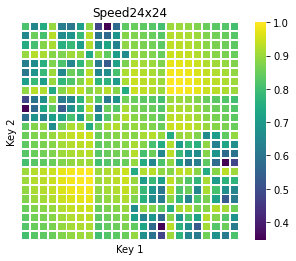

In [94]:
load_original_interkey_timings_table = False
if load_original_interkey_timings_table:

    interkey_table = "data/interkey-timings.xlsx"
    wb = xlrd.open_workbook(interkey_table) 
    interkey_sheet = wb.sheet_by_index(0)

    # Convert interkey stroke times table to array:
    Time32x32 = np.zeros((32,32))
    for i in range(1,33):
        for j in range(1,33):
            if interkey_sheet.cell_value(i,j):
                Time32x32[i-1,j-1] = interkey_sheet.cell_value(i,j)

    # Fill empty (symmetric) portion of the array:
    for i in range(1,33):
        for j in range(1,33):
            if interkey_sheet.cell_value(i,j):
                Time32x32[j-1,i-1] = interkey_sheet.cell_value(i,j)

    # Extract pairwise entries for the 24 vertical range keys:
    table_24_positions = [1,4,7,10, 2,5,8,11, 3,6,9,12,  19,22,25,28, 20,23,26,29, 21,24,27,30]
    Time24x24 = np.zeros((24, 24))
    u = 0
    for i in table_24_positions:
        u += 1
        v = 0
        for j in table_24_positions:
            v += 1
            Time24x24[u-1,v-1] = Time32x32[i-1,j-1]

    # Save:
    if print_output:
        file = open("Time24x24.txt", "w+")
        file.write(str(Time24x24))
        file.close()

    # Print:
    print(repr(Time24x24))

else:
    Time24x24 = np.array([[196., 225., 204., 164., 266., 258., 231., 166., 357., 325., 263.,
        186., 169., 176., 178., 186., 156., 156., 158., 163., 171., 175., 177., 185.],
       [225., 181., 182., 147., 239., 245., 196., 150., 289., 296., 229.,
        167., 162., 169., 170., 178., 148., 148., 150., 155., 163., 167., 169., 177.],
       [204., 182., 170., 149., 196., 194., 232., 155., 237., 214., 263.,
        166., 157., 164., 165., 173., 143., 143., 145., 150., 158., 163., 164., 172.],
       [164., 147., 149., 169., 160., 161., 157., 226., 165., 185., 234.,
        257., 154., 162., 163., 171., 141., 141., 143., 148., 156., 160., 162., 170.],
       [266., 239., 196., 160., 196., 240., 208., 166., 271., 267., 208.,
        169., 143., 150., 151., 160., 129., 129., 132., 137., 145., 149., 151., 159.],
       [258., 245., 194., 161., 240., 181., 183., 149., 245., 256., 184.,
        150., 138., 145., 146., 154., 124., 124., 126., 131., 139., 144., 145., 153.],
       [231., 196., 232., 157., 208., 183., 170., 149., 201., 215., 239.,
        151., 134., 141., 142., 150., 120., 120., 122., 127., 135., 140., 141., 149.],
       [166., 150., 155., 226., 166., 149., 149., 169., 160., 147., 170.,
        221., 133., 140., 141., 150., 119., 119., 122., 126., 135., 139., 141., 149.],
       [357., 289., 237., 165., 271., 245., 201., 160., 196., 236., 194.,
        161., 171., 178., 179., 188., 157., 157., 160., 164., 173., 177., 179., 187.],
       [325., 296., 214., 185., 267., 256., 215., 147., 236., 181., 184.,
        157., 166., 173., 174., 182., 152., 152., 154., 159., 167., 172., 173., 181.],
       [263., 229., 263., 234., 208., 184., 239., 170., 194., 184., 170.,
        150., 159., 166., 167., 176., 145., 145., 148., 153., 161., 165., 167., 175.],
       [186., 167., 166., 257., 169., 150., 151., 221., 161., 157., 150.,
        169., 153., 160., 161., 169., 139., 139., 141., 146., 154., 159., 160., 168.],
       [169., 162., 157., 154., 143., 138., 134., 133., 171., 166., 159.,
        153., 151., 147., 141., 145., 188., 151., 142., 164., 213., 204., 162., 145.],
       [176., 169., 164., 162., 150., 145., 141., 140., 178., 173., 166.,
        160., 147., 151., 189., 209., 137., 207., 191., 206., 149., 227.,  208., 226.],
       [178., 170., 165., 163., 151., 146., 142., 141., 179., 174., 167.,
        161., 141., 189., 157., 253., 136., 188., 210., 231., 155., 226.,   239., 225.],
       [186., 178., 173., 171., 160., 154., 150., 150., 188., 182., 176.,
        169., 145., 209., 253., 170., 147., 206., 251., 233., 164., 268.,  362., 236.],
       [156., 148., 143., 141., 129., 124., 120., 119., 157., 152., 145.,
        139., 188., 137., 136., 147., 151., 133., 138., 152., 192., 149.,  139., 143.],
       [156., 148., 143., 141., 129., 124., 120., 119., 157., 152., 145.,
        139., 151., 207., 188., 206., 133., 151., 179., 183., 145., 204.,  183., 194.],
       [158., 150., 145., 143., 132., 126., 122., 122., 160., 154., 148.,
        141., 142., 191., 210., 251., 138., 179., 157., 240., 145., 185.,  208., 235.],
       [163., 155., 150., 148., 137., 131., 127., 126., 164., 159., 153.,
        146., 164., 206., 231., 233., 152., 183., 240., 170., 160., 220.,  293., 230.],
       [171., 163., 158., 156., 145., 139., 135., 135., 173., 167., 161.,
        154., 213., 149., 155., 164., 192., 145., 145., 160., 151., 140.,  142., 175.],
       [175., 167., 163., 160., 149., 144., 140., 139., 177., 172., 165.,
        159., 204., 227., 226., 268., 149., 204., 185., 220., 140., 151.,  175., 265.],
       [177., 169., 164., 162., 151., 145., 141., 141., 179., 173., 167.,
        160., 162., 208., 239., 362., 139., 183., 208., 293., 142., 175.,  157., 265.],
       [185., 177., 172., 170., 159., 153., 149., 149., 187., 181., 175.,
        168., 145., 226., 225., 236., 143., 194., 235., 230., 175., 265.,  265., 170.]])

# Left/right symmetric version of the Time24x24 matrix
# (The original version was constructed with data from right-handed people.)
TimeSymmetric24x24 = np.ones((24,24))

#        Left:            Right:
#     1  2  3  4       13 14 15 16 
#     5  6  7  8       17 18 19 20
#     9 10 11 12       21 22 23 24

I = [1,2,3,4, 5,6,7,8, 9,10,11,12,  16,15,14,13, 20,19,18,17, 24,23,22,21]
J = [16,15,14,13, 20,19,18,17, 24,23,22,21,  1,2,3,4, 5,6,7,8, 9,10,11,12]

for i1, I1 in enumerate(I):
    for i2, I2 in enumerate(I):
        J1 = J[i1] - 1
        J2 = J[i2] - 1
        #print(i1,i2,I1-1,I2-1,J1,J2)
        avgvalue = (Time24x24[I1-1,I2-1] + Time24x24[J1,J2]) / 2 
        TimeSymmetric24x24[I1-1,I2-1] = avgvalue
        TimeSymmetric24x24[J1,J2] = avgvalue

# Normalize matrix with min-max scaling to a range with maximum = 1:
newMin = np.min(TimeSymmetric24x24) / np.max(TimeSymmetric24x24)
newMax = 1.0
TimeSymmetric24x24 = newMin + (TimeSymmetric24x24 - np.min(TimeSymmetric24x24)) * (newMax - newMin) / (np.max(TimeSymmetric24x24) - np.min(TimeSymmetric24x24))

# Convert relative interkey stroke times to relative speeds by subtracting from 1:
Speed24x24 = 1 - TimeSymmetric24x24 + np.min(TimeSymmetric24x24)

# Print:
print_matrix_info(matrix_data=Speed24x24, matrix_label="Speed24x24", nkeys=24, nlines=50)
heatmap(data=Speed24x24, title="Speed24x24", xlabel="Key 1", ylabel="Key 2", print_output=print_output)

# Print:
#print(repr(Speed24x24))

# Save:
if print_output:
    file = open("Speed24x24.txt", "w+")
    file.write(str(Speed24x24))
    file.close()


/Users/arno.klein/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


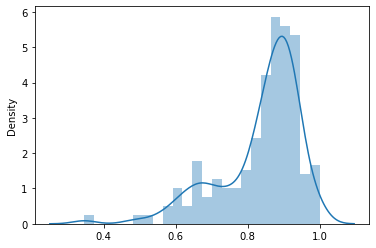

In [95]:
# Histogram
sns_plot = sns.distplot(Speed24x24)
if print_output:
    sns_plot.figure.savefig("{0}_histogram.png".format("Speed24x24"))

Output:

        Left:            Right:
     1  2  3  4       13 14 15 16 
     5  6  7  8       17 18 19 20
     9 10 11 12       21 22 23 24

    Speed24x24 min = 0.34643377001455605, max = 1.0
    Speed24x24 key number pairs with minimum values:
        10 -> 1        (0.34643377001455605)
        16 -> 23        (0.34643377001455605)
        1 -> 10        (0.34643377001455605)
        23 -> 16        (0.34643377001455605)
        1 -> 9        (0.4832605531295488)
        16 -> 24        (0.4832605531295488)
        9 -> 1        (0.4832605531295488)
        24 -> 16        (0.4832605531295488)
        20 -> 23        (0.5312954876273654)
        23 -> 20        (0.5312954876273654)
        10 -> 5        (0.5312954876273654)
        5 -> 10        (0.5312954876273654)
        15 -> 23        (0.5676855895196506)
        23 -> 15        (0.5676855895196506)
        10 -> 2        (0.5676855895196506)
        2 -> 10        (0.5676855895196506)
        11 -> 1        (0.5735080058224165)
        22 -> 16        (0.5735080058224165)
        16 -> 22        (0.5735080058224165)
        1 -> 11        (0.5735080058224165)
        9 -> 2        (0.5982532751091705)
        15 -> 24        (0.5982532751091705)
        2 -> 9        (0.5982532751091705)
        24 -> 15        (0.5982532751091705)
        19 -> 16        (0.6055312954876275)
        1 -> 6        (0.6055312954876275)
        16 -> 19        (0.6055312954876275)
        6 -> 1        (0.6055312954876275)
        20 -> 24        (0.6171761280931587)
        10 -> 9        (0.6171761280931587)
        24 -> 23        (0.6171761280931587)
        5 -> 9        (0.6171761280931587)
        23 -> 24        (0.6171761280931587)
        9 -> 10        (0.6171761280931587)
        9 -> 5        (0.6171761280931587)
        24 -> 20        (0.6171761280931587)
        5 -> 1        (0.6200873362445416)
        20 -> 16        (0.6200873362445416)
        16 -> 20        (0.6200873362445416)
        1 -> 5        (0.6200873362445416)
        3 -> 11        (0.6331877729257642)
        14 -> 22        (0.6331877729257642)
        22 -> 14        (0.6331877729257642)
        11 -> 3        (0.6331877729257642)
        6 -> 5        (0.6477438136826783)
        6 -> 9        (0.6477438136826783)
        19 -> 24        (0.6477438136826783)
        20 -> 19        (0.6477438136826783)
        19 -> 20        (0.6477438136826783)
        24 -> 19        (0.6477438136826783)
    Speed24x24 key number pairs with maximum values:
        17 -> 8        (1.0)
        8 -> 17        (1.0)
        17 -> 7        (0.9985443959243085)
        18 -> 8        (0.9985443959243085)
        7 -> 17        (0.9985443959243085)
        8 -> 18        (0.9985443959243085)
        7 -> 18        (0.9970887918486171)
        18 -> 7        (0.9970887918486171)
        17 -> 6        (0.9883551673944688)
        7 -> 19        (0.9883551673944688)
        18 -> 6        (0.9883551673944688)
        19 -> 8        (0.9883551673944688)
        6 -> 18        (0.9883551673944688)
        19 -> 7        (0.9883551673944688)
        6 -> 17        (0.9883551673944688)
        8 -> 19        (0.9883551673944688)
        6 -> 19        (0.9796215429403203)
        19 -> 6        (0.9796215429403203)
        17 -> 5        (0.975254730713246)
        5 -> 17        (0.975254730713246)
        20 -> 8        (0.975254730713246)
        8 -> 20        (0.975254730713246)
        5 -> 18        (0.9737991266375545)
        7 -> 20        (0.9737991266375545)
        20 -> 7        (0.9737991266375545)
        18 -> 5        (0.9737991266375545)
        6 -> 20        (0.9636098981077148)
        19 -> 5        (0.9636098981077148)
        5 -> 19        (0.9636098981077148)
        20 -> 6        (0.9636098981077148)
        20 -> 5        (0.9475982532751093)
        8 -> 13        (0.9475982532751093)
        21 -> 8        (0.9475982532751093)
        21 -> 7        (0.9475982532751093)
        18 -> 12        (0.9475982532751093)
        17 -> 12        (0.9475982532751093)
        8 -> 21        (0.9475982532751093)
        7 -> 21        (0.9475982532751093)
        13 -> 8        (0.9475982532751093)
        17 -> 4        (0.9475982532751093)
        5 -> 20        (0.9475982532751093)
        12 -> 17        (0.9475982532751093)
        12 -> 18        (0.9475982532751093)
        4 -> 17        (0.9475982532751093)
        4 -> 18        (0.9461426491994178)
        18 -> 4        (0.9461426491994178)
        13 -> 7        (0.9461426491994178)
        7 -> 13        (0.9461426491994178)
        21 -> 6        (0.9388646288209608)
        19 -> 12        (0.9388646288209608)


## Strength matrix  <a name="strength">

### 24x24 relative finger position STRENGTH matrix

Finger strengths are based on peak keyboard reaction forces (in newtons) from Table 4 of <br>
"Keyboard Reaction Force and Finger Flexor Electromyograms during Computer Keyboard Work" <br>
BJ Martin, TJ Armstrong, JA Foulke, S Natarajan, Human Factors,1996,38(4),654-664:
   
    middle     2.36
    index      2.26
    ring       2.02
    little     1.84
    
    index/middle:  0.9576271186440678
    ring/middle:   0.8559322033898306
    little/middle: 0.7796610169491526

For reference, Table 1 of "Ergonomic keyboard layout designed for the Filipino language", 2016 (doi: 10.1007/978-3-319-41694-6_41) presents "average finger strength of Filipinos [n=30, ages 16-36] measured in pounds":
   
                L       R
    little     3.77   4.27
    ring       4.54   5.08
    middle     5.65   6.37
    index      6.09   6.57
    
    6.57/4.27 = 1.54
    6.09/3.77 = 1.62
    6.37/5.08 = 1.25
    5.65/4.54 = 1.24
    
We won't use these results as I don't feel they represent relative strength relevant for typing: "Respondents were asked to sit in upright position, with their wrists resting on a flat surface. A pinch gauge was placed within each finger's reach. The respondents were asked to exert maximum pressure on the device."
    
The following does not take into account order of key pairs (see Flow matrix).


index/middle: 0.9576271186440678
ring/middle: 0.8559322033898306
little/middle: 0.7796610169491526
Strength24x24 min = 0.9, max = 1.0
Strength24x24 key number pairs with minimum values:
        1 -> 1        (0.9)
        5 -> 9        (0.9)
        5 -> 16        (0.9)
        5 -> 20        (0.9)
        5 -> 24        (0.9)
        9 -> 1        (0.9)
        9 -> 5        (0.9)
        9 -> 9        (0.9)
        9 -> 16        (0.9)
        9 -> 20        (0.9)
Strength24x24 key number pairs with maximum values:
        18 -> 11        (1.0)
        22 -> 14        (1.0)
        3 -> 14        (1.0)
        7 -> 18        (1.0)
        18 -> 7        (1.0)
        18 -> 14        (1.0)
        3 -> 18        (1.0)
        18 -> 18        (1.0)
        22 -> 22        (1.0)
        18 -> 22        (1.0)


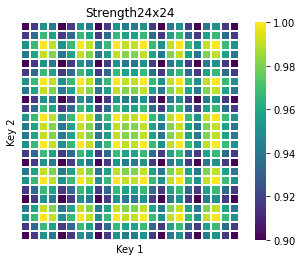

In [96]:
if apply_strength:

    # Normalize by the highest peak force (middle finger):
    middle_force = 2.36
    index_force = 2.26
    ring_force = 2.02
    little_force = 1.84
    middle_norm = 1.0
    index_norm = index_force / middle_force
    ring_norm = ring_force / middle_force
    little_norm = little_force / middle_force
    print('index/middle: {0}'.format(index_norm))
    print('ring/middle: {0}'.format(ring_norm))
    print('little/middle: {0}'.format(little_norm))
    
    # Relative left/right hand strength (assume equal):
    lf = 1.0
    rf = 1.0
    
    strengths24 = np.array((
                        lf * little_norm, lf * ring_norm, lf * middle_norm, lf * index_norm,
                        lf * little_norm, lf * ring_norm, lf * middle_norm, lf * index_norm,
                        lf * little_norm, lf * ring_norm, lf * middle_norm, lf * index_norm,
                        rf * index_norm, rf * middle_norm, rf * ring_norm, rf * little_norm,
                        rf * index_norm, rf * middle_norm, rf * ring_norm, rf * little_norm,
                        rf * index_norm, rf * middle_norm, rf * ring_norm, rf * little_norm))

    # Create a finger-pair position strength matrix by adding pairs of strength values:
    Strength24x24 = np.zeros((24, 24))
    for i in range(24):
        Strength24x24[i,:] = strengths24
    Strength24x24 = (Strength24x24 + Strength24x24.transpose())

    # Normalize matrix with min-max scaling to a range with maximum = 1:
    #newMin = strength_factor
    newMin = min_strength_factor  # np.min(Strength24x24) / np.max(Strength24x24)
    newMax = 1.0
    Strength24x24 = newMin + (Strength24x24 - np.min(Strength24x24)) * (newMax - newMin) / (np.max(Strength24x24) - np.min(Strength24x24))

    # Print:
    print_matrix_info(matrix_data=Strength24x24, matrix_label="Strength24x24", nkeys=24, nlines=10)
    heatmap(data=Strength24x24, title="Strength24x24", xlabel="Key 1", ylabel="Key 2", print_output=print_output)

    # Save:
    if print_output:
        file = open("Strength24x24.txt", "w+")
        file.write(str(Strength24x24))
        file.close()

/Users/arno.klein/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


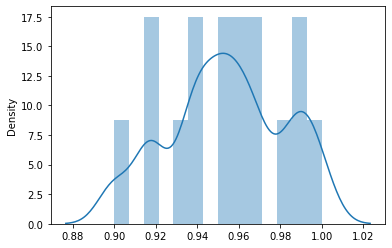

In [97]:
if apply_strength:

    # Histogram
    sns_plot = sns.distplot(Strength24x24)
    if print_output:
        sns_plot.figure.savefig("{0}_histogram.png".format("Strength24x24"))

Strength32x32 min = 0.7796610169491526, max = 1.0
Strength32x32 key number pairs with minimum values:
        1 -> 1        (0.7796610169491526)
        20 -> 5        (0.7796610169491526)
        20 -> 1        (0.7796610169491526)
        32 -> 31        (0.7796610169491526)
        16 -> 31        (0.7796610169491526)
        16 -> 24        (0.7796610169491526)
        16 -> 20        (0.7796610169491526)
        16 -> 16        (0.7796610169491526)
        16 -> 9        (0.7796610169491526)
        16 -> 5        (0.7796610169491526)
Strength32x32 key number pairs with maximum values:
        22 -> 3        (1.0)
        18 -> 22        (1.0)
        3 -> 22        (1.0)
        22 -> 7        (1.0)
        11 -> 11        (1.0)
        7 -> 18        (1.0)
        11 -> 14        (1.0)
        7 -> 22        (1.0)
        11 -> 18        (1.0)
        14 -> 18        (1.0)


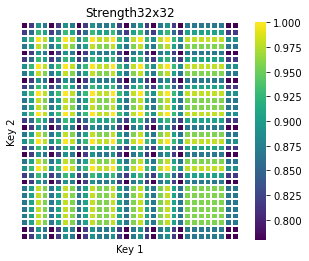

In [98]:
if apply_strength:

    penalty = 1.0  # Penalty for lateral (index, little) finger placement (1 = no penalty)

    strengths32 = np.array((lf * little_norm, lf * ring_norm, lf * middle_norm, lf * index_norm,
                            lf * little_norm, lf * ring_norm, lf * middle_norm, lf * index_norm,
                            lf * little_norm, lf * ring_norm, lf * middle_norm, lf * index_norm,
                            rf * index_norm, rf * middle_norm, rf * ring_norm, rf * little_norm,
                            rf * index_norm, rf * middle_norm, rf * ring_norm, rf * little_norm,
                            rf * index_norm, rf * middle_norm, rf * ring_norm, rf * little_norm,
                            lf * index_norm * penalty, lf * index_norm * penalty, lf * index_norm * penalty,
                            rf * index_norm * penalty, rf * index_norm * penalty, rf * index_norm * penalty,
                            rf * little_norm * penalty, rf * little_norm * penalty))

    # Create a finger-pair position strength matrix by adding pairs of strength values:
    Strength32x32 = np.zeros((32, 32))
    for i in range(32):
        Strength32x32[i,:] = strengths32
    Strength32x32 = (Strength32x32 + Strength32x32.transpose())

    # Normalize matrix with min-max scaling to a range with maximum = 1:
    newMin = np.min(Strength32x32) / np.max(Strength32x32)
    newMax = 1.0
    Strength32x32 = newMin + (Strength32x32 - np.min(Strength32x32)) * (newMax - newMin) / (np.max(Strength32x32) - np.min(Strength32x32))

    # Print:
    print_matrix_info(matrix_data=Strength32x32, matrix_label="Strength32x32", nkeys=32, nlines=10)
    heatmap(data=Strength32x32, title="Strength32x32", xlabel="Key 1", ylabel="Key 2", print_output=print_output)

    # Save:
    if print_output:
        file = open("Strength32x32.txt", "w+")
        file.write(str(Strength32x32))
        file.close()

/Users/arno.klein/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


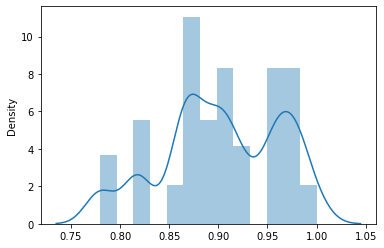

In [99]:
if apply_strength:

    # Histogram
    sns_plot = sns.distplot(Strength32x32)
    if print_output:
        sns_plot.figure.savefig("{0}_histogram.png".format("Strength32x32"))

### Strength output

    index/middle: 0.9576271186440678
    ring/middle: 0.8559322033898306
    little/middle: 0.7796610169491526

        Left:            Right:
     1  2  3  4       13 14 15 16 
     5  6  7  8       17 18 19 20
     9 10 11 12       21 22 23 24

    Strength24x24 min = 0.7796610169491526, max = 1.0
    Strength24x24 key number pairs with minimum values:
        1 -> 1        (0.7796610169491526)
        5 -> 9        (0.7796610169491526)
        5 -> 16        (0.7796610169491526)
        5 -> 20        (0.7796610169491526)
        5 -> 24        (0.7796610169491526)
        9 -> 1        (0.7796610169491526)
        9 -> 5        (0.7796610169491526)
        9 -> 9        (0.7796610169491526)
        9 -> 16        (0.7796610169491526)
        9 -> 20        (0.7796610169491526)
    Strength24x24 key number pairs with maximum values:
        18 -> 11        (1.0)
        22 -> 14        (1.0)
        3 -> 14        (1.0)
        7 -> 18        (1.0)
        18 -> 7        (1.0)
        18 -> 14        (1.0)
        3 -> 18        (1.0)
        18 -> 18        (1.0)
        22 -> 22        (1.0)
        18 -> 22        (1.0)
    Strength32x32 min = 0.7796610169491526, max = 1.0
    Strength32x32 key number pairs with minimum values:
        1 -> 1        (0.7796610169491526)
        20 -> 5        (0.7796610169491526)
        20 -> 1        (0.7796610169491526)
        32 -> 31        (0.7796610169491526)
        16 -> 31        (0.7796610169491526)
        16 -> 24        (0.7796610169491526)
        16 -> 20        (0.7796610169491526)
        16 -> 16        (0.7796610169491526)
        16 -> 9        (0.7796610169491526)
        16 -> 5        (0.7796610169491526)
    Strength32x32 key number pairs with maximum values:
        22 -> 3        (1.0)
        18 -> 22        (1.0)
        3 -> 22        (1.0)
        22 -> 7        (1.0)
        11 -> 11        (1.0)
        7 -> 18        (1.0)
        11 -> 14        (1.0)
        7 -> 22        (1.0)
        11 -> 18        (1.0)
        14 -> 18        (1.0)

## Flow matrix and Engram scoring model  <a name="flow">

The Flow24x24 matrix takes into account ease of transition between ordered pairs of keys.
    
Our optimization algorithm finds every permutation of a given set of letters, maps these letter permutations to a set of keys, and ranks these letter-key mappings according to a score reflecting ease of typing key pairs and frequency of letter pairs (bigrams). The score is the average of the scores for all possible bigrams in this arrangement. The score for each bigram is a product of the frequency of occurrence of that bigram, the frequency of each of the bigram’s characters, and flow, strength (and optional speed) factors for the key pair.

#### Dvorak et al. (1936) defined eleven criteria for the design and evaluation of keyboard layouts:
1.  Deviation from the balance of hand and finger loads should be as low as possible.
2.  Percentage of tapping with the same fingers should be as low as possible.
3.  Percentage of tapping that includes top row should be as low as possible.
4.  Percentage of tapping that includes bottom row should be as low as possible.
5.  Percentage of tapping in the home row should be as high as possible.
6.  Percentage of tapping by alternating hands should be as high as possible.
7.  Percentage of hurdles with the same finger should be as low as possible.
8.  Percentage of hurdles with adjacent offset fingers should be as low as possible.
9.  Percentage of hurdles with remote fingers should be as low as possible.
10. Percentage of reach with the same finger should be as low as possible.
11. Percentage of reach with adjacent offset fingers should be as low as possible.

#### Synopsis of above criteria for pairwise key presses when touch typing:
1. Alternate between hands.
2. Balance finger loads, and avoid using the same finger.
3. Avoid the upper and lower rows, and avoid skipping over the home row.
4. Avoid tapping adjacent offset rows with the same or adjacent offset fingers.
    
### Factors to penalize strenuous key transitions

Direction:
    
    - outward = 0.9: outward roll of fingers from the index to little finger (same hand)

Dexterity:
    
    - side_above_3away = 0.9
        - index and little finger type two keys, one or more rows apart (same hand)
    - side_above_2away = 0.9^2 = 0.81
        - index finger types key a row or two above ring finger key, or
        - little finger types key a row or two above middle finger key (same hand)
    - side_above_1away = 0.9^3 = 0.729
        - index finger types key a row or two above middle finger key, or
        - little finger types key a row or two above ring finger key (same hand)
    - middle_above_ring = 0.9
        - middle finger types key a row or two above ring finger key (same hand)
    - ring_above_middle = 0.9^3 = 0.729
        - ring finger types key a row or two above middle finger key (same hand)
    - lateral = 0.9
        - lateral movement of (index or little) finger outside of 8 vertical columns
    
Distance:
    
    - skip_row_3away = 0.9       
        - index and little fingers type two keys that skip over home row (same hand)
        - (e.g., one on bottom row, the other on top row)
    - skip_row_2away = 0.9^3 = 0.729
        - little and middle or index and ring fingers type two keys that skip over home row (same hand)
    - skip_row_1away = 0.9^5 = 0.59049
        - little and ring or middle and index fingers type two keys that skip over home row (same hand)

Repetition:
 
    - skip_row_0away = 0.9^4 = 0.6561
        - same finger types two keys that skip over home row
    - same_finger = 0.9^5 = 0.59049
        - use same finger again for a different key
        - cannot accompany outward, side_above, or adjacent_shorter_above 

Strength: Accounted for by the strength matrix (minimum value for the little finger = 0.9)    

### Example flow values for left side home block
   
No penalty (for same hand, both keys in the same row in an inward roll or repeating the same key):

    2=>2, 2=>3, 3=>4, 2=>4, 1=>4

    1  2  3  4
    5  6  7  8
    9 10 11 12

Penalty = 0.9:

    outward: 2=>1, 3=>1, 3=>2, 4=>1, 4=>2, 4=>3, 6=>5, 7=>6, 7=>5, 8=>7, 8=>6, 8=>5,... 
    middle_above_ring: 6=>3, 10=>7 
    side_above_3away: 1=>8, 5=>4, 5=>12, 9=>8
    index_above: 1=>4, 2=>4, 3=>4, 4=>4

Penalty = 0.9^2:

    middle_above_ring * outward: 3=>6, 7=>10
    side_above_3away * outward: 8=>1, 4=>5, 12=>5, 8=>9
    side_above_2away: 1=>7, 6=>4, 5=>11, 10=>8    
    skip_row_3away * side_above_3away: 1=>12, 9=>4
    skip_row_2away: 2=>12, 9=>3
    ring_above_middle 2=>7, 6=>11
    side_above_2away * outward: 7=>1, 4=>6, 11=>5, 8=>10
    side_above_1away: 1=>6, 7=>4, 5=>10, 11=>8

Penalty = 0.9^3:

    skip_row_3away * side_above_3away * outward: 12=>1, 4=>9

Penalty = 0.9^4:

    ring_above_middle * outward: 7=>2, 11=>6
    side_above_1away * outward: 4=>7, 6=>1, 10=>5, 4=>7

Penalty = 0.9^5:

    same_finger: 4=>8, 8=>4, 1=>5, 5=>1, 5=>9, 9=>5, 2=>6, 6=>2,...
    skip_row_2away * side_above_2away: 10=>4, 1=>11
    skip_row_1away: 1=>10, 9=>2, 3=>12

Penalty = 0.9^6:

    skip_row_2away * side_above_2away * outward: 4=>10, 11=>1
    skip_row_1away * outward: 10=>1, 2=>9, 12=>3

Penalty = 0.9^8

    skip_row_1away * ring_above_middle: 2=>11
    skip_row_1away * side_above_1away: 1=>10, 11=>4

Penalty = 0.9^9

    skip_row_1away * ring_above_middle * outward: 11=>2
    skip_row_0away * same_finger: 1=>9, 9=>1, 4=>12, 12=>4, 2=>10, 10=>2, 3=>11, 11=>3     
    skip_row_1away * side_above_1away * outward: 10=>1, 4=>11

#### 24 keys:

Flow24x24 min = 0.387420489, max = 1.0
Flow24x24 key number pairs with minimum values:
        2 -> 10        (0.387420489)
        10 -> 1        (0.387420489)
        3 -> 11        (0.387420489)
        10 -> 2        (0.387420489)
        14 -> 22        (0.387420489)
        24 -> 16        (0.387420489)
        15 -> 23        (0.387420489)
        13 -> 21        (0.387420489)
        16 -> 24        (0.387420489)
        21 -> 13        (0.387420489)
        4 -> 11        (0.387420489)
        13 -> 22        (0.387420489)
        1 -> 9        (0.387420489)
        4 -> 12        (0.387420489)
        22 -> 15        (0.387420489)
        22 -> 14        (0.387420489)
        9 -> 1        (0.387420489)
        12 -> 4        (0.387420489)
        11 -> 2        (0.387420489)
        11 -> 3        (0.387420489)
        23 -> 15        (0.387420489)
        23 -> 16        (0.387420489)
        11 -> 4        (0.43046720999999993)
        2 -> 11        (0.43046720999999993)


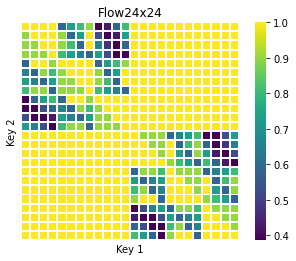

In [100]:
def create_24x24_flow_matrix(not_home_row, side_top, side_above_3away, side_above_2away, side_above_1away, 
                             middle_above_ring, ring_above_middle, outward, skip_row_3away, 
                             skip_row_2away, skip_row_1away, skip_row_0away, same_finger, lateral, 
                             same_hand, shorter_above, adjacent_offset, inside_top, index_above):

    all_24_keys = [1,2,3,4, 5,6,7,8, 9,10,11,12, 13,14,15,16, 17,18,19,20, 21,22,23,24]

    # Create a matrix and multiply by flow factors that promote easy interkey transitions:
    T = np.ones((24, 24))

    # 7.  Promote alternating between hands over uncomfortable transitions with the same hand.
    if same_hand < 1.0:
    #    1  2  3  4   13 14 15 16  
    #    5  6  7  8   17 18 19 20 
    #    9 10 11 12   21 22 23 24
        for i in range(0,12):
            for j in range(0,12):
                T[i,j] *= same_hand
        for i in range(12,24):
            for j in range(12,24):
                T[i,j] *= same_hand

    # 8.  Promote little-to-index-finger roll-ins over index-to-little-finger outwards.
    #    1  2  3  4   13 14 15 16  
    #    5  6  7  8   17 18 19 20 
    #    9 10 11 12   21 22 23 24
    if outward < 1.0:

        # same-row roll-outs:
        roll_ins = [[1,2],[2,3],[3,4], [5,6],[6,7],[7,8], [9,10],[10,11],[11,12],
                    [16,15],[15,14],[14,13], [20,19],[19,18],[18,17], [24,23],[23,22],[22,21]]
        for x in roll_ins:
            T[x[1]-1, x[0]-1] *= outward

        # same-row roll-outs, skipping keys:
        roll_ins_skip_keys = [[1,3],[2,4],[1,4], [5,7],[6,8],[5,8], [9,11],[10,12],[9,12],
                              [16,14],[15,13],[16,13], [20,18],[19,17],[20,17], [24,22],[23,21],[24,21]]
        for x in roll_ins_skip_keys:
            T[x[1]-1, x[0]-1] *= outward

        # adjacent-row roll-outs:
        roll_ins_adj_rows = [[1,6],[1,7],[1,8],[2,7],[2,8],[3,8], [5,2],[5,3],[5,4],[6,3],[6,4],[7,4],
                             [5,10],[5,11],[5,12],[6,11],[6,12],[7,12], [9,6],[9,7],[9,8],[10,7],[10,8],[11,8],
                             [16,19],[16,18],[16,17],[15,18],[15,17],[14,17], [20,15],[20,14],[20,13],[19,14],[19,13],[18,13],
                             [20,23],[20,22],[20,21],[19,22],[19,21],[18,21], [24,19],[24,18],[24,17],[23,18],[23,17],[22,17]]
        for x in roll_ins_adj_rows:
            T[x[1]-1, x[0]-1] *= outward

        # upper<->lower row roll-outs:
        roll_ins_skip_home = [[1,10],[1,11],[1,12],[2,11],[2,12],[3,12], [9,2],[9,3],[9,4],[10,3],[10,4],[11,4],
                              [16,23],[16,22],[16,21],[15,22],[15,21],[14,21], [24,15],[24,14],[24,13],[23,14],[23,13],[22,13]]
        for x in roll_ins_skip_home:
            T[x[1]-1, x[0]-1] *= outward

    # 9.  Avoid stretching shorter fingers up and longer fingers down.
    #    1  2  3  4   13 14 15 16  
    #    5  6  7  8   17 18 19 20 
    #    9 10 11 12   21 22 23 24
    if index_above < 1.0:
        for x in [4]:
            for y in [4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24]:
                T[x-1, y-1] *= index_above
                T[y-1, x-1] *= index_above
        for x in [13]:
            for y in [1,2,3,4,5,6,7,8,9,10,11,12,13,17,18,19,20,21,22,23,24]:
                T[x-1, y-1] *= index_above
                T[y-1, x-1] *= index_above
    if inside_top < 1.0:
        for x in [4,13]:
            for j in range(0,24):
                T[x-1, j] *= inside_top
                T[j, x-1] *= inside_top
    if side_top < 1.0:
        for x in [1,4,13,16]:
            for j in range(0,24):
                T[x-1, j] *= side_top
                T[j, x-1] *= side_top
    if side_above_1away < 1.0:
        for x in [1]:
            for y in [6,10]:
                T[x-1, y-1] *= side_above_1away
                T[y-1, x-1] *= side_above_1away
        for x in [5]:
            for y in [10]:
                T[x-1, y-1] *= side_above_1away
                T[y-1, x-1] *= side_above_1away
        for x in [4]:
            for y in [7,11]:
                T[x-1, y-1] *= side_above_1away
                T[y-1, x-1] *= side_above_1away
        for x in [8]:
            for y in [11]:
                T[x-1, y-1] *= side_above_1away
                T[y-1, x-1] *= side_above_1away
        for x in [13]:
            for y in [18,22]:
                T[x-1, y-1] *= side_above_1away
                T[y-1, x-1] *= side_above_1away
        for x in [17]:
            for y in [22]:
                T[x-1, y-1] *= side_above_1away
                T[y-1, x-1] *= side_above_1away
        for x in [16]:
            for y in [19,23]:
                T[x-1, y-1] *= side_above_1away
                T[y-1, x-1] *= side_above_1away
        for x in [20]:
            for y in [23]:
                T[x-1, y-1] *= side_above_1away
                T[y-1, x-1] *= side_above_1away
    if side_above_2away < 1.0:
        for x in [1]:
            for y in [7,11]:
                T[x-1, y-1] *= side_above_2away
                T[y-1, x-1] *= side_above_2away
        for x in [5]:
            for y in [11]:
                T[x-1, y-1] *= side_above_2away
                T[y-1, x-1] *= side_above_2away
        for x in [4]:
            for y in [6,10]:
                T[x-1, y-1] *= side_above_2away
                T[y-1, x-1] *= side_above_2away
        for x in [8]:
            for y in [10]:
                T[x-1, y-1] *= side_above_2away
                T[y-1, x-1] *= side_above_2away
        for x in [13]:
            for y in [19,23]:
                T[x-1, y-1] *= side_above_2away
                T[y-1, x-1] *= side_above_2away
        for x in [17]:
            for y in [23]:
                T[x-1, y-1] *= side_above_2away
                T[y-1, x-1] *= side_above_2away
        for x in [16]:
            for y in [18,22]:
                T[x-1, y-1] *= side_above_2away
                T[y-1, x-1] *= side_above_2away
        for x in [20]:
            for y in [22]:
                T[x-1, y-1] *= side_above_2away
                T[y-1, x-1] *= side_above_2away
    if side_above_3away < 1.0:
        for x in [1]:
            for y in [8,12]:
                T[x-1, y-1] *= side_above_3away
                T[y-1, x-1] *= side_above_3away
        for x in [5]:
            for y in [12]:
                T[x-1, y-1] *= side_above_3away
                T[y-1, x-1] *= side_above_3away
        for x in [4]:
            for y in [5,9]:
                T[x-1, y-1] *= side_above_3away
                T[y-1, x-1] *= side_above_3away
        for x in [8]:
            for y in [9]:
                T[x-1, y-1] *= side_above_3away
                T[y-1, x-1] *= side_above_3away
        for x in [13]:
            for y in [20,24]:
                T[x-1, y-1] *= side_above_3away
                T[y-1, x-1] *= side_above_3away
        for x in [17]:
            for y in [24]:
                T[x-1, y-1] *= side_above_3away
                T[y-1, x-1] *= side_above_3away
        for x in [16]:
            for y in [17,21]:
                T[x-1, y-1] *= side_above_3away
                T[y-1, x-1] *= side_above_3away
        for x in [20]:
            for y in [21]:
                T[x-1, y-1] *= side_above_3away
                T[y-1, x-1] *= side_above_3away
    if shorter_above < 1.0:
        for x in [1]:
            for y in [6,7,8,10,11,12]:
                T[x-1, y-1] *= shorter_above
                T[y-1, x-1] *= shorter_above
        for x in [2]:
            for y in [7,11]:
                T[x-1, y-1] *= shorter_above
                T[y-1, x-1] *= shorter_above
        for x in [4]:
            for y in [6,7,10,11]:
                T[x-1, y-1] *= shorter_above
                T[y-1, x-1] *= shorter_above

        for x in [5]:
            for y in [10,11,12]:
                T[x-1, y-1] *= shorter_above
                T[y-1, x-1] *= shorter_above
        for x in [6]:
            for y in [11]:
                T[x-1, y-1] *= shorter_above
                T[y-1, x-1] *= shorter_above
        for x in [8]:
            for y in [10,11]:
                T[x-1, y-1] *= shorter_above
                T[y-1, x-1] *= shorter_above

        for x in [16]:
            for y in [17,18,19,21,22,23]:
                T[x-1, y-1] *= shorter_above
                T[y-1, x-1] *= shorter_above
        for x in [15]:
            for y in [18,22]:
                T[x-1, y-1] *= shorter_above
                T[y-1, x-1] *= shorter_above
        for x in [13]:
            for y in [18,19,22,23]:
                T[x-1, y-1] *= shorter_above
                T[y-1, x-1] *= shorter_above

        for x in [20]:
            for y in [21,22,23]:
                T[x-1, y-1] *= shorter_above
                T[y-1, x-1] *= shorter_above
        for x in [19]:
            for y in [22]:
                T[x-1, y-1] *= shorter_above
                T[y-1, x-1] *= shorter_above
        for x in [17]:
            for y in [22,23]:
                T[x-1, y-1] *= shorter_above
                T[y-1, x-1] *= shorter_above

    if ring_above_middle < 1.0:
        ring_above_middles =  [[2,7],[6,11],[2,11],
                            [15,18],[19,22],[15,22]]
        for x in ring_above_middles:
            T[x[0]-1, x[1]-1] *= ring_above_middle
            T[x[1]-1, x[0]-1] *= ring_above_middle

    if middle_above_ring < 1.0:
        middle_above_rings =  [[6,3],[10,7],[10,3],
                            [19,14],[23,18],[23,14]]
        for x in middle_above_rings:
            T[x[0]-1, x[1]-1] *= middle_above_ring
            T[x[1]-1, x[0]-1] *= middle_above_ring

    # 10. Avoid using the same finger.
    #    1  2  3  4   13 14 15 16  
    #    5  6  7  8   17 18 19 20 
    #    9 10 11 12   21 22 23 24
    if same_finger < 1.0:
        same_fingers = [[1,5],[5,9],[1,9], [2,6],[6,10],[2,10], [3,7],[7,11],[3,11], [4,8],[8,12],[4,12],
                        [13,17],[17,21],[13,21], [14,18],[18,22],[14,22], [15,19],[19,23],[15,23], [16,20],[20,24],[16,24]] 
        for x in same_fingers:
            T[x[0]-1, x[1]-1] *= same_finger
            T[x[1]-1, x[0]-1] *= same_finger

    # 11. Avoid the upper and lower rows.
    #    1  2  3  4   13 14 15 16  
    #    5  6  7  8   17 18 19 20 
    #    9 10 11 12   21 22 23 24
    if not_home_row < 1.0:
        not_home_row_keys = [1,2,3,4, 9,10,11,12, 13,14,15,16, 21,22,23,24]
        for x in not_home_row_keys:
            for j in range(0,23):
                T[x-1, j] *= not_home_row
                T[j, x-1] *= not_home_row

    # 12. Avoid skipping over the home row.
    #    1  2  3  4   13 14 15 16  
    #    5  6  7  8   17 18 19 20 
    #    9 10 11 12   21 22 23 24
    if skip_row_0away < 1.0:
        skip_top = [1, 2, 3, 4, 13,14,15,16] 
        skip_bot = [9,10,11,12, 21,22,23,24] 
        for ix, x in enumerate(skip_top):
            y = skip_bot[ix]
            T[x-1, y-1] *= skip_row_0away
            T[y-1, x-1] *= skip_row_0away
    if skip_row_1away < 1.0:
        skip_top = [1, 2, 2, 3, 3, 4, 13,14,14,15,15,16] 
        skip_bot = [10,9,11,10,12,11, 22,21,23,22,24,23] 
        for ix, x in enumerate(skip_top):
            y = skip_bot[ix]
            T[x-1, y-1] *= skip_row_1away
            T[y-1, x-1] *= skip_row_1away
    if skip_row_2away < 1.0:
        skip_top = [1,  2,3, 4, 13,14,15,16] 
        skip_bot = [11,12,9,10, 23,24,21,22] 
        for ix, x in enumerate(skip_top):
            y = skip_bot[ix]
            T[x-1, y-1] *= skip_row_2away
            T[y-1, x-1] *= skip_row_2away
    if skip_row_3away < 1.0:
        skip_top = [1, 4, 13,16] 
        skip_bot = [12,9, 24,21] 
        for ix, x in enumerate(skip_top):
            y = skip_bot[ix]
            T[x-1, y-1] *= skip_row_3away
            T[y-1, x-1] *= skip_row_3away

    Flow24x24 = T

    # Normalize matrix with min-max scaling to a range with maximum = 1:
    newMin = np.min(Flow24x24) / np.max(Flow24x24)
    newMax = 1.0
    Flow24x24 = newMin + (Flow24x24 - np.min(Flow24x24)) * (newMax - newMin) / (np.max(Flow24x24) - np.min(Flow24x24))

    return Flow24x24

Flow24x24 = create_24x24_flow_matrix(not_home_row, side_top, 
    side_above_3away, side_above_2away, side_above_1away, middle_above_ring, ring_above_middle, outward, 
    skip_row_3away, skip_row_2away, skip_row_1away, skip_row_0away, same_finger, lateral, same_hand, 
    shorter_above, adjacent_offset, inside_top, index_above)

# Print:
print_matrix_info(matrix_data=Flow24x24, matrix_label="Flow24x24", nkeys=24, nlines=30)
heatmap(data=Flow24x24, title="Flow24x24", xlabel="Key 1", ylabel="Key 2", print_output=print_output)

# Save:
if print_output:
    file = open("Flow24x24.txt", "w+")
    file.write(str(Flow24x24))
    file.close()

#    1  2  3  4   13 14 15 16  
#    5  6  7  8   17 18 19 20 
#    9 10 11 12   21 22 23 24

/Users/arno.klein/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


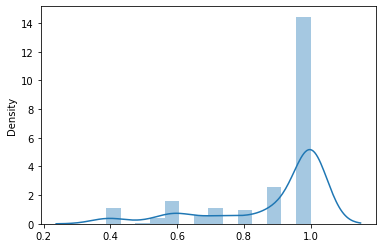

In [101]:
# Histogram
sns_plot = sns.distplot(Flow24x24)
if print_output:
    sns_plot.figure.savefig("{0}_histogram.png".format("Flow24x24"))

#### 32 keys:

         Left:             Right:
     1  2  3  4 25   28 13 14 15 16 31 
     5  6  7  8 26   29 17 18 19 20 32
     9 10 11 12 27   30 21 22 23 24


In [102]:
# Penalizing factors for 24 keys  (1 = no penalty; set to less than 1 to penalize):

# Dexterity
side_above_3away = 0.9     # index and little finger type two keys, one or more rows apart (same hand)
side_above_2away = 0.81    # index finger types key a row or two above ring finger key, or
                           # little finger types key a row or two above middle finger key (same hand)
side_above_1away = 0.729   # index finger types key a row or two above middle finger key, or
                           # little finger types key a row or two above ring finger key (same hand)
middle_above_ring = 0.9    # middle finger types key a row or two above ring finger key (same hand)
ring_above_middle = 0.729  # ring finger types key a row or two above middle finger key (same hand)
lateral = 0.9              # lateral movement of (index or little) finger outside of 8 vertical columns

# Direction
outward = 0.9              # outward roll of fingers from the index to little finger (same hand)

# Distance
skip_row_3away = 0.9       # index and little fingers type two keys that skip over home row (same hand)
                           # (e.g., one on bottom row, the other on top row)
skip_row_2away = 0.729     # little and middle or index and ring fingers type two keys that skip over home row (same hand)
skip_row_1away = 0.59049   # little and ring or middle and index fingers type two keys that skip over home row (same hand)

# Repetition
skip_row_0away = 0.6561    # same finger types two keys that skip over home row
same_finger = 0.59049      # use same finger again for a different key


# Unused or redundant parameters
same_hand = 1.0            # (addressed by splitting up the most frequent letters across left/right sides above)
not_home_row = 1.0         # at least one key not on home row
side_top = 1.0             # index or little finger types top corner key
shorter_above = 1.0        # (taken care of by side_above_[1,2,3]away parameters)
adjacent_offset = 1.0      # (taken care of by side_above_1away, middle_above_ring, ring_above_middle parameters)
inside_top = 1.0           # index finger types top corner key (taken care of by side_above_1away parameter)
index_above = 1.0          # index finger types top corner key (unless other bigram key is in the top row for the same hand)
                           # (taken care of by side_above_[1,2,3]away parameters)

Flow32x32 min = 0.18530201888518408, max = 1.0
Flow32x32 key number pairs with minimum values:
        30 -> 13        (0.18530201888518408)
        27 -> 4        (0.18530201888518408)
        4 -> 27        (0.205891132094649)
        13 -> 30        (0.205891132094649)
        30 -> 28        (0.31381059609)
        28 -> 30        (0.31381059609)
        24 -> 31        (0.31381059609)
        28 -> 21        (0.31381059609)
        25 -> 12        (0.31381059609)
        27 -> 25        (0.31381059609)
        25 -> 27        (0.31381059609)
        25 -> 11        (0.34867844010000004)
        31 -> 24        (0.34867844010000004)
        23 -> 31        (0.34867844010000004)
        12 -> 25        (0.34867844010000004)
        28 -> 22        (0.34867844010000004)
        21 -> 28        (0.34867844010000004)
        4 -> 11        (0.387420489)
        2 -> 10        (0.387420489)
        24 -> 16        (0.387420489)
        23 -> 16        (0.387420489)
        23 -> 15     

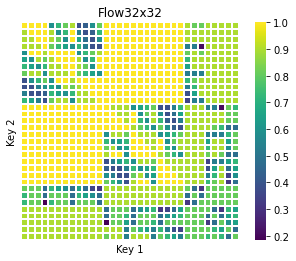

In [103]:
def create_32x32_flow_matrix(not_home_row, side_top, side_above_3away, side_above_2away, side_above_1away, 
                             middle_above_ring, ring_above_middle, outward, skip_row_3away, 
                             skip_row_2away, skip_row_1away, skip_row_0away, same_finger, lateral, 
                             same_hand, shorter_above, adjacent_offset, inside_top, index_above):

    all_32_keys = [1,2,3,4, 5,6,7,8, 9,10,11,12, 13,14,15,16, 17,18,19,20, 21,22,23,24, 
                   25,26,27, 28,29,30, 31,32]

    # Create a matrix and multiply by flow factors that promote easy interkey transitions:
    T = np.ones((32, 32))

    if lateral < 1.0:
        for x in all_32_keys:
            for y in [25,26,27, 28,29,30, 31,32]:
                T[x-1, y-1] *= lateral
                T[y-1, x-1] *= lateral    

    # 7.  Promote alternating between hands over uncomfortable transitions with the same hand.
    if same_hand < 1.0:
        for i in [1,2,3,4,5,6,7,8,9,10,11,12, 25,26,27]:
            for j in [1,2,3,4,5,6,7,8,9,10,11,12, 25,26,27]:
                T[i-1,j-1] *= same_hand
        for i in [13,14,15,16,17,18,19,20,21,22,23,24, 28,29,30,31,32]:
            for j in [13,14,15,16,17,18,19,20,21,22,23,24, 28,29,30,31,32]:
                T[i-1,j-1] *= same_hand

    # 8.  Promote little-to-index-finger roll-ins over index-to-little-finger outsward rolls.
    # Penalize (index, little) finger lateral movements:
    #  1  2  3  4 25   28 13 14 15 16 31 
    #  5  6  7  8 26   29 17 18 19 20 32
    #  9 10 11 12 27   30 21 22 23 24
    if outward < 1.0:

        # same-row roll-outs:
        roll_ins = [[1,2],[2,3],[3,4], [5,6],[6,7],[7,8], [9,10],[10,11],[11,12],
                    [4,25],[8,26],[12,27],
                    [16,15],[15,14],[14,13], [20,19],[19,18],[18,17], [24,23],[23,22],[22,21],
                    [13,28],[17,29],[21,30], [31,16],[32,20]]
        for x in roll_ins:
            T[x[1]-1, x[0]-1] *= outward

        # same-row roll-outs, skipping keys:
        roll_ins_skip_keys = [[1,3],[2,4],[1,4], [5,7],[6,8],[5,8], [9,11],[10,12],[9,12],
                              [1,25],[2,25],[3,25],
                              [5,26],[6,26],[7,26],
                              [9,27],[10,27],[11,27],
                              [16,14],[15,13],[16,13], [20,18],[19,17],[20,17], [24,22],[23,21],[24,21],
                              [16,28],[15,28],[14,28],
                              [20,29],[19,29],[18,29],
                              [24,30],[23,30],[22,30],
                              [31,15],[31,14],[31,13],[31,28],
                              [32,19],[32,18],[32,17],[32,29]]
        for x in roll_ins_skip_keys:
            T[x[1]-1, x[0]-1] *= outward

        # adjacent-row roll-outs:
        #  1  2  3  4 25   28 13 14 15 16 31 
        #  5  6  7  8 26   29 17 18 19 20 32
        #  9 10 11 12 27   30 21 22 23 24
        roll_ins_adj_rows = [[1,6],[1,7],[1,8],[2,7],[2,8],[3,8], 
                             [5,2],[5,3],[5,4],[6,3],[6,4],[7,4],
                             [5,10],[5,11],[5,12],[6,11],[6,12],[7,12], 
                             [9,6],[9,7],[9,8],[10,7],[10,8],[11,8],
                             [5,25],[6,25],[7,25],[8,25],
                             [5,27],[6,27],[7,27],[8,27],
                             [1,26],[2,26],[3,26],[4,26],
                             [9,26],[10,26],[11,26],[12,26],
                             [16,19],[16,18],[16,17],[15,18],[15,17],[14,17], 
                             [20,15],[20,14],[20,13],[19,14],[19,13],[18,13],
                             [20,23],[20,22],[20,21],[19,22],[19,21],[18,21], 
                             [24,19],[24,18],[24,17],[23,18],[23,17],[22,17],
                             [16,29],[15,29],[14,29],[13,29],
                             [24,29],[23,29],[22,29],[21,29],
                             [20,28],[19,28],[18,28],[17,28],
                             [20,30],[19,30],[18,30],[17,30],
                             [31,20],[31,19],[31,18],[31,17],[31,29],
                             [32,16],[32,15],[32,14],[32,13],[32,28],
                             [32,24],[32,23],[32,22],[32,21],[32,30]]
        for x in roll_ins_adj_rows:
            T[x[1]-1, x[0]-1] *= outward

        # upper<->lower row roll-outs:
        roll_ins_skip_home = [[1,10],[1,11],[1,12],[1,27],[2,11],[2,12],[2,27],[3,12],[3,27],[4,27], 
                              [9,2],[9,3],[9,4],[9,25],[10,3],[10,4],[10,25],[11,4],[11,25],[12,25],
                              [16,23],[16,22],[16,21],[16,30],[15,22],[15,21],[15,30],[14,21],[14,30],[13,30],
                              [24,15],[24,14],[24,13],[24,28],[23,14],[23,13],[23,28],[22,13],[22,28],[21,28],
                              [31,24],[31,23],[31,22],[31,21],[31,30]]
        for x in roll_ins_skip_home:
            T[x[1]-1, x[0]-1] *= outward

    # 9.  Avoid stretching shorter fingers up and longer fingers down.
    #  1  2  3  4 25   28 13 14 15 16 31 
    #  5  6  7  8 26   29 17 18 19 20 32
    #  9 10 11 12 27   30 21 22 23 24
    if index_above < 1.0:
        for x in [4]:
            for y in [4,5,6,7,8,26,9,10,11,12,27,28,13,14,15,16,31,29,17,18,19,20,32,30,21,22,23,24]:
                T[x-1, y-1] *= index_above
                T[y-1, x-1] *= index_above
        for x in [25]:
            for y in [25,5,6,7,8,26,9,10,11,12,27,28,13,14,15,16,31,29,17,18,19,20,32,30,21,22,23,24]:
                T[x-1, y-1] *= index_above
                T[y-1, x-1] *= index_above
        for x in [13]:
            for y in [1,2,3,4,25,5,6,7,8,26,9,10,11,12,27,13,29,17,18,19,20,32,30,21,22,23,24]:
                T[x-1, y-1] *= index_above
                T[y-1, x-1] *= index_above
        for x in [28]:
            for y in [1,2,3,4,25,5,6,7,8,26,9,10,11,12,27,28,29,17,18,19,20,32,30,21,22,23,24]:
                T[x-1, y-1] *= index_above
                T[y-1, x-1] *= index_above
    if inside_top < 1.0:
        for x in [4,25,28,13]:
            for j in range(0,32):
                T[x-1, j] *= inside_top
                T[j, x-1] *= inside_top
    if side_top < 1.0:
        for x in [1,4,25,28,13,16,31]:
            for j in range(0,32):
                T[x-1, j] *= side_top
                T[j, x-1] *= side_top
    if side_above_1away < 1.0:
        for x in [1]:
            for y in [6,10]:
                T[x-1, y-1] *= side_above_1away
                T[y-1, x-1] *= side_above_1away
        for x in [5]:
            for y in [10]:
                T[x-1, y-1] *= side_above_1away
                T[y-1, x-1] *= side_above_1away
        for x in [4,25]:
            for y in [7,11]:
                T[x-1, y-1] *= side_above_1away
                T[y-1, x-1] *= side_above_1away
        for x in [8,26]:
            for y in [11]:
                T[x-1, y-1] *= side_above_1away
                T[y-1, x-1] *= side_above_1away
        for x in [13,28]:
            for y in [18,22]:
                T[x-1, y-1] *= side_above_1away
                T[y-1, x-1] *= side_above_1away
        for x in [17,29]:
            for y in [22]:
                T[x-1, y-1] *= side_above_1away
                T[y-1, x-1] *= side_above_1away
        for x in [16,31]:
            for y in [19,23]:
                T[x-1, y-1] *= side_above_1away
                T[y-1, x-1] *= side_above_1away
        for x in [20,32]:
            for y in [23]:
                T[x-1, y-1] *= side_above_1away
                T[y-1, x-1] *= side_above_1away
    if side_above_2away < 1.0:
        for x in [1]:
            for y in [7,11]:
                T[x-1, y-1] *= side_above_2away
                T[y-1, x-1] *= side_above_2away
        for x in [5]:
            for y in [11]:
                T[x-1, y-1] *= side_above_2away
                T[y-1, x-1] *= side_above_2away
        for x in [4,25]:
            for y in [6,10]:
                T[x-1, y-1] *= side_above_2away
                T[y-1, x-1] *= side_above_2away
        for x in [8,26]:
            for y in [10]:
                T[x-1, y-1] *= side_above_2away
                T[y-1, x-1] *= side_above_2away
        for x in [13,28]:
            for y in [19,23]:
                T[x-1, y-1] *= side_above_2away
                T[y-1, x-1] *= side_above_2away
        for x in [17,29]:
            for y in [23]:
                T[x-1, y-1] *= side_above_2away
                T[y-1, x-1] *= side_above_2away
        for x in [16,31]:
            for y in [18,22]:
                T[x-1, y-1] *= side_above_2away
                T[y-1, x-1] *= side_above_2away
        for x in [20,32]:
            for y in [22]:
                T[x-1, y-1] *= side_above_2away
                T[y-1, x-1] *= side_above_2away
    if side_above_3away < 1.0:
        for x in [1]:
            for y in [8,12,26,27]:
                T[x-1, y-1] *= side_above_3away
                T[y-1, x-1] *= side_above_3away
        for x in [5]:
            for y in [12,27]:
                T[x-1, y-1] *= side_above_3away
                T[y-1, x-1] *= side_above_3away
        for x in [4,25]:
            for y in [5,9]:
                T[x-1, y-1] *= side_above_3away
                T[y-1, x-1] *= side_above_3away
        for x in [8,26]:
            for y in [9]:
                T[x-1, y-1] *= side_above_3away
                T[y-1, x-1] *= side_above_3away
        for x in [13,28]:
            for y in [20,24,32]:
                T[x-1, y-1] *= side_above_3away
                T[y-1, x-1] *= side_above_3away
        for x in [17,29]:
            for y in [24]:
                T[x-1, y-1] *= side_above_3away
                T[y-1, x-1] *= side_above_3away
        for x in [16,31]:
            for y in [17,21,29,30]:
                T[x-1, y-1] *= side_above_3away
                T[y-1, x-1] *= side_above_3away
        for x in [20,32]:
            for y in [21,30]:
                T[x-1, y-1] *= side_above_3away
                T[y-1, x-1] *= side_above_3away


    #  1  2  3  4 25   28 13 14 15 16 31 
    #  5  6  7  8 26   29 17 18 19 20 32
    #  9 10 11 12 27   30 21 22 23 24
    if shorter_above < 1.0:
        for x in [1]:
            for y in [6,7,8,26,10,11,12,27]:
                T[x-1, y-1] *= shorter_above
                T[y-1, x-1] *= shorter_above
        for x in [2]:
            for y in [7,11]:
                T[x-1, y-1] *= shorter_above
                T[y-1, x-1] *= shorter_above
        for x in [4]:
            for y in [6,7,10,11]:
                T[x-1, y-1] *= shorter_above
                T[y-1, x-1] *= shorter_above
        for x in [25]:
            for y in [6,7,10,11]:
                T[x-1, y-1] *= shorter_above
                T[y-1, x-1] *= shorter_above

        for x in [5]:
            for y in [10,11,12,27]:
                T[x-1, y-1] *= shorter_above
                T[y-1, x-1] *= shorter_above
        for x in [6]:
            for y in [11]:
                T[x-1, y-1] *= shorter_above
                T[y-1, x-1] *= shorter_above
        for x in [8]:
            for y in [10,11]:
                T[x-1, y-1] *= shorter_above
                T[y-1, x-1] *= shorter_above
        for x in [26]:
            for y in [10,11]:
                T[x-1, y-1] *= shorter_above
                T[y-1, x-1] *= shorter_above

        for x in [16]:
            for y in [29,17,18,19,30,21,22,23]:
                T[x-1, y-1] *= shorter_above
                T[y-1, x-1] *= shorter_above
        for x in [31]:
            for y in [29,17,18,19,30,21,22,23]:
                T[x-1, y-1] *= shorter_above
                T[y-1, x-1] *= shorter_above
        for x in [15]:
            for y in [18,22]:
                T[x-1, y-1] *= shorter_above
                T[y-1, x-1] *= shorter_above
        for x in [13]:
            for y in [18,19,22,23]:
                T[x-1, y-1] *= shorter_above
                T[y-1, x-1] *= shorter_above
        for x in [28]:
            for y in [18,19,22,23]:
                T[x-1, y-1] *= shorter_above
                T[y-1, x-1] *= shorter_above

        for x in [20]:
            for y in [30,21,22,23]:
                T[x-1, y-1] *= shorter_above
                T[y-1, x-1] *= shorter_above
        for x in [32]:
            for y in [30,21,22,23]:
                T[x-1, y-1] *= shorter_above
                T[y-1, x-1] *= shorter_above
        for x in [19]:
            for y in [22]:
                T[x-1, y-1] *= shorter_above
                T[y-1, x-1] *= shorter_above
        for x in [17]:
            for y in [22,23]:
                T[x-1, y-1] *= shorter_above
                T[y-1, x-1] *= shorter_above
        for x in [29]:
            for y in [22,23]:
                T[x-1, y-1] *= shorter_above
                T[y-1, x-1] *= shorter_above

    if ring_above_middle < 1.0:
        ring_above_middles =  [[2,7],[6,11],[2,11],
                            [15,18],[19,22],[15,22]]
        for x in ring_above_middles:
            T[x[0]-1, x[1]-1] *= ring_above_middle
            T[x[1]-1, x[0]-1] *= ring_above_middle

    if middle_above_ring < 1.0:
        middle_above_rings =  [[6,3],[10,7],[10,3],
                            [19,14],[23,18],[23,14]]
        for x in middle_above_rings:
            T[x[0]-1, x[1]-1] *= middle_above_ring
            T[x[1]-1, x[0]-1] *= middle_above_ring

    # 10. Avoid using the same finger.
    #  1  2  3  4 25   28 13 14 15 16 31 
    #  5  6  7  8 26   29 17 18 19 20 32
    #  9 10 11 12 27   30 21 22 23 24
    if same_finger < 1.0:
        same_fingers = [[1,5],[5,9],[1,9], [2,6],[6,10],[2,10], 
                        [3,7],[7,11],[3,11], [4,8],[8,12],[4,12],
                        [25,26],[26,27],[25,27], [28,29],[29,30],[28,30], [31,32],
                        [4,25],[4,26],[4,27], [8,25],[8,26],[8,27], [12,25],[12,26],[12,27],
                        [13,28],[13,29],[13,30], [17,28],[17,29],[17,30], [21,28],[21,29],[21,30],
                        [31,16],[31,20],[31,24], [32,16],[32,20],[32,24],
                        [13,17],[17,21],[13,21], [14,18],[18,22],[14,22], 
                        [15,19],[19,23],[15,23], [16,20],[20,24],[16,24]] 
        for x in same_fingers:
            T[x[0]-1, x[1]-1] *= same_finger
            T[x[1]-1, x[0]-1] *= same_finger

    # 11. Avoid the upper and lower rows.
    if not_home_row < 1.0:
        not_home_row_keys = [1,2,3,4,25, 9,10,11,12,27, 28,13,14,15,16,31, 30,21,22,23,24]
        for x in not_home_row_keys:
            for j in range(0,32):
                T[x-1, j] *= not_home_row
                T[j, x-1] *= not_home_row
                
    # 12. Avoid skipping over the home row.
    #  1  2  3  4 25   28 13 14 15 16 31 
    #  5  6  7  8 26   29 17 18 19 20 32
    #  9 10 11 12 27   30 21 22 23 24
    if skip_row_0away < 1.0:
        skip_top = [1, 2, 3, 4, 4,25,25, 28,28,13,13,14,15,16,31] 
        skip_bot = [9,10,11,12,27,12,27, 30,21,30,21,22,23,24,24] 
        for ix, x in enumerate(skip_top):
            y = skip_bot[ix]
            T[x-1, y-1] *= skip_row_0away
            T[y-1, x-1] *= skip_row_0away
    if skip_row_1away < 1.0:
        skip_top = [1, 2, 2, 3, 3, 4, 4,25, 28,13,13,14,14,15,15,16,31] 
        skip_bot = [10,9,11,10,12,11,27,11, 22,30,22,21,23,22,24,23,23] 
        for ix, x in enumerate(skip_top):
            y = skip_bot[ix]
            T[x-1, y-1] *= skip_row_1away
            T[y-1, x-1] *= skip_row_1away
    if skip_row_2away < 1.0:
        skip_top = [1,  2,3, 4,25, 28,13,14,15,16,31] 
        skip_bot = [11,12,9,10,10, 23,23,24,21,22,22] 
        for ix, x in enumerate(skip_top):
            y = skip_bot[ix]
            T[x-1, y-1] *= skip_row_2away
            T[y-1, x-1] *= skip_row_2away
    if skip_row_3away < 1.0:
        skip_top = [1, 4,25, 28,13,16,16,31,31] 
        skip_bot = [12,9, 9, 24,24,21,30,21,30] 
        for ix, x in enumerate(skip_top):
            y = skip_bot[ix]
            T[x-1, y-1] *= skip_row_3away
            T[y-1, x-1] *= skip_row_3away
                
    Flow32x32 = T

    # Normalize matrix with min-max scaling to a range with maximum = 1:
    newMin = np.min(Flow32x32) / np.max(Flow32x32)
    newMax = 1.0
    Flow32x32 = newMin + (Flow32x32 - np.min(Flow32x32)) * (newMax - newMin) / (np.max(Flow32x32) - np.min(Flow32x32))

    return Flow32x32

Flow32x32 = create_32x32_flow_matrix(not_home_row, side_top, 
    side_above_3away, side_above_2away, side_above_1away, middle_above_ring, ring_above_middle, outward, 
    skip_row_3away, skip_row_2away, skip_row_1away, skip_row_0away, same_finger, lateral, same_hand, 
    shorter_above, adjacent_offset, inside_top, index_above)

# Print:
print_matrix_info(matrix_data=Flow32x32, matrix_label="Flow32x32", nkeys=32, nlines=30)
heatmap(data=Flow32x32, title="Flow32x32", xlabel="Key 1", ylabel="Key 2", print_output=print_output)

# Save:
if print_output:
    file = open("Flow32x32.txt", "w+")
    file.write(str(Flow32x32))
    file.close()

#  1  2  3  4 25   28 13 14 15 16 31 
#  5  6  7  8 26   29 17 18 19 20 32
#  9 10 11 12 27   30 21 22 23 24

/Users/arno.klein/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


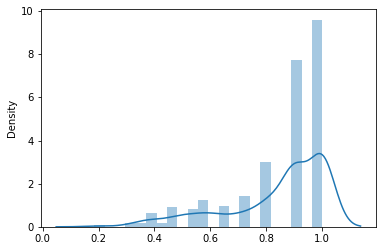

In [104]:
# Histogram
sns_plot = sns.distplot(Flow32x32)
if print_output:
    sns_plot.figure.savefig("{0}_histogram.png".format("Flow32x32"))

### Flow output

        Left:            Right:
     1  2  3  4       13 14 15 16 
     5  6  7  8       17 18 19 20
     9 10 11 12       21 22 23 24

    Flow24x24 min = 0.387420489, max = 1.0
    Flow24x24 key number pairs with minimum values:
        2 -> 10        (0.387420489)
        10 -> 1        (0.387420489)
        3 -> 11        (0.387420489)
        10 -> 2        (0.387420489)
        14 -> 22        (0.387420489)
        24 -> 16        (0.387420489)
        15 -> 23        (0.387420489)
        13 -> 21        (0.387420489)
        16 -> 24        (0.387420489)
        21 -> 13        (0.387420489)
        4 -> 11        (0.387420489)
        13 -> 22        (0.387420489)
        1 -> 9        (0.387420489)
        4 -> 12        (0.387420489)
        22 -> 15        (0.387420489)
        22 -> 14        (0.387420489)
        9 -> 1        (0.387420489)
        12 -> 4        (0.387420489)
        11 -> 2        (0.387420489)
        11 -> 3        (0.387420489)
        23 -> 15        (0.387420489)
        23 -> 16        (0.387420489)
        11 -> 4        (0.43046720999999993)
        2 -> 11        (0.43046720999999993)
        1 -> 10        (0.43046720999999993)
        22 -> 13        (0.43046720999999993)
        16 -> 23        (0.43046720999999993)
        15 -> 22        (0.43046720999999993)
        3 -> 10        (0.4782969)
        14 -> 23        (0.4782969)
    Flow24x24 key number pairs with maximum values:
        24 -> 24        (1.0)
        8 -> 15        (1.0)
        10 -> 12        (1.0)
        10 -> 13        (1.0)
        10 -> 14        (1.0)
        10 -> 15        (1.0)
        10 -> 16        (1.0)
        10 -> 17        (1.0)
        10 -> 18        (1.0)
        10 -> 19        (1.0)
        10 -> 20        (1.0)
        10 -> 21        (1.0)
        10 -> 22        (1.0)
        10 -> 23        (1.0)
        10 -> 24        (1.0)
        11 -> 11        (1.0)
        11 -> 12        (1.0)
        11 -> 13        (1.0)
        11 -> 14        (1.0)
        11 -> 15        (1.0)
        11 -> 16        (1.0)
        11 -> 17        (1.0)
        11 -> 18        (1.0)
        11 -> 19        (1.0)
        11 -> 20        (1.0)
        11 -> 21        (1.0)
        11 -> 22        (1.0)
        10 -> 11        (1.0)
        10 -> 10        (1.0)
        9 -> 24        (1.0)
        
        Left:            Right:
    1  2  3  4 25   28 13 14 15 16 31 
    5  6  7  8 26   29 17 18 19 20 32
    9 10 11 12 27   30 21 22 23 24    

    Flow32x32 min = 0.18530201888518408, max = 1.0
    Flow32x32 key number pairs with minimum values:
        30 -> 13        (0.18530201888518408)
        27 -> 4        (0.18530201888518408)
        4 -> 27        (0.205891132094649)
        13 -> 30        (0.205891132094649)
        30 -> 28        (0.31381059609)
        28 -> 30        (0.31381059609)
        24 -> 31        (0.31381059609)
        28 -> 21        (0.31381059609)
        25 -> 12        (0.31381059609)
        27 -> 25        (0.31381059609)
        25 -> 27        (0.31381059609)
        25 -> 11        (0.34867844010000004)
        31 -> 24        (0.34867844010000004)
        23 -> 31        (0.34867844010000004)
        12 -> 25        (0.34867844010000004)
        28 -> 22        (0.34867844010000004)
        21 -> 28        (0.34867844010000004)
        4 -> 11        (0.387420489)
        2 -> 10        (0.387420489)
        24 -> 16        (0.387420489)
        23 -> 16        (0.387420489)
        23 -> 15        (0.387420489)
        22 -> 28        (0.387420489)
        22 -> 15        (0.387420489)
        22 -> 14        (0.387420489)
        31 -> 23        (0.387420489)
        4 -> 12        (0.387420489)
        3 -> 11        (0.387420489)
        10 -> 2        (0.387420489)
        1 -> 9        (0.387420489)
    Flow32x32 key number pairs with maximum values:
        1 -> 1        (1.0)
        24 -> 4        (1.0)
        23 -> 23        (1.0)
        9 -> 21        (1.0)
        9 -> 22        (1.0)
        9 -> 23        (1.0)
        17 -> 17        (1.0)
        7 -> 8        (1.0)
        7 -> 7        (1.0)
        24 -> 1        (1.0)
        24 -> 2        (1.0)
        24 -> 3        (1.0)
        24 -> 5        (1.0)
        23 -> 21        (1.0)
        24 -> 6        (1.0)
        24 -> 7        (1.0)
        24 -> 8        (1.0)
        24 -> 9        (1.0)
        24 -> 10        (1.0)
        24 -> 11        (1.0)
        24 -> 12        (1.0)
        9 -> 24        (1.0)
        17 -> 12        (1.0)
        17 -> 11        (1.0)
        23 -> 22        (1.0)
        7 -> 12        (1.0)
        16 -> 2        (1.0)
        23 -> 7        (1.0)
        7 -> 22        (1.0)
        7 -> 21        (1.0)

## Combine Strength and Flow matrices  <a name="strengthflow">

Factors24x24 min = 0.3486784401, max = 1.0
Factors24x24 key number pairs with minimum values:
        9 -> 1        (0.3486784401)
        1 -> 9        (0.3486784401)
        24 -> 16        (0.3486784401)
        16 -> 24        (0.3486784401)
        10 -> 1        (0.3553837947173077)
        23 -> 16        (0.3553837947173077)
        2 -> 10        (0.3620891493346154)
        23 -> 15        (0.3620891493346154)
        15 -> 23        (0.3620891493346154)
        10 -> 2        (0.3620891493346154)
        22 -> 15        (0.3747548191673077)
        11 -> 2        (0.3747548191673077)
        21 -> 13        (0.37997009498076917)
        12 -> 4        (0.37997009498076917)
        13 -> 21        (0.37997009498076917)
        4 -> 12        (0.37997009498076917)
        13 -> 22        (0.3836952919903846)
        4 -> 11        (0.3836952919903846)
        22 -> 14        (0.387420489)
        14 -> 22        (0.387420489)
        11 -> 3        (0.387420489)
        3 -> 1

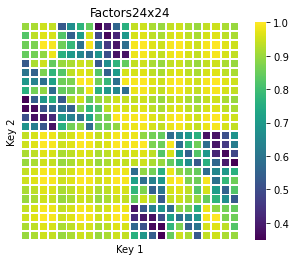

In [105]:
# 24 keys:
Factors24x24 = Flow24x24
if apply_strength:
    Factors24x24 = Strength24x24 * Factors24x24

# Print:
print_matrix_info(matrix_data=Factors24x24, matrix_label="Factors24x24", nkeys=24, nlines=30)
heatmap(data=Factors24x24, title="Factors24x24", xlabel="Key 1", ylabel="Key 2", print_output=print_output)

# Save:
if print_output:
    file = open("Factors24x24.txt", "w+")
    file.write(str(Factors24x24))
    file.close()

/Users/arno.klein/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


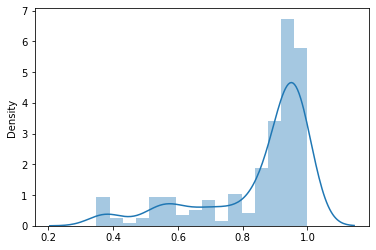

In [106]:
# Histogram
sns_plot = sns.distplot(Factors24x24)
if print_output:
    sns_plot.figure.savefig("{0}_histogram.png".format("Factors24x24"))

Factors32x32 min = 0.17745023842394747, max = 1.0
Factors32x32 key number pairs with minimum values:
        30 -> 13        (0.17745023842394747)
        27 -> 4        (0.17745023842394747)
        4 -> 27        (0.19716693158216386)
        13 -> 30        (0.19716693158216386)
        24 -> 31        (0.24466588847694917)
        31 -> 24        (0.2718509871966102)
        23 -> 31        (0.28514804635296614)
        27 -> 25        (0.3005135369336441)
        30 -> 28        (0.3005135369336441)
        25 -> 27        (0.3005135369336441)
        28 -> 30        (0.3005135369336441)
        25 -> 12        (0.3005135369336441)
        28 -> 21        (0.3005135369336441)
        1 -> 9        (0.302056652440678)
        16 -> 24        (0.302056652440678)
        9 -> 1        (0.302056652440678)
        24 -> 16        (0.302056652440678)
        10 -> 1        (0.3168311626144068)
        23 -> 16        (0.3168311626144068)
        31 -> 23        (0.3168311626144068)
    

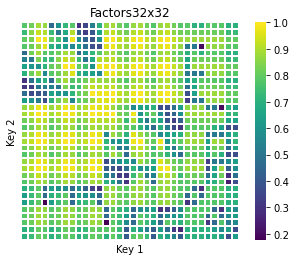

In [107]:
# 32 keys:
Factors32x32 = Flow32x32
if apply_strength:
    Factors32x32 = Strength32x32 * Factors32x32

# Print:
print_matrix_info(matrix_data=Factors32x32, matrix_label="Factors32x32", nkeys=32, nlines=30)
heatmap(data=Factors32x32, title="Factors32x32", xlabel="Key 1", ylabel="Key 2", print_output=print_output)

# Save:
if print_output:
    file = open("Factors32x32.txt", "w+")
    file.write(str(Factors32x32))
    file.close()

/Users/arno.klein/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


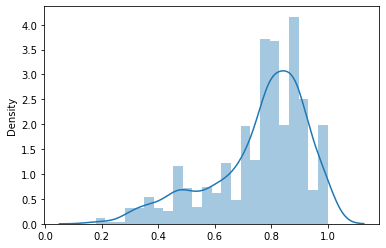

In [108]:
# Histogram
sns_plot = sns.distplot(Factors32x32)
if print_output:
    sns_plot.figure.savefig("{0}_histogram.png".format("Factors32x32"))

### Combined output

        Left:            Right:
     1  2  3  4       13 14 15 16 
     5  6  7  8       17 18 19 20
     9 10 11 12       21 22 23 24

    Factors24x24 min = 0.3486784401, max = 1.0
    Factors24x24 key number pairs with minimum values:
        9 -> 1        (0.3486784401)
        1 -> 9        (0.3486784401)
        24 -> 16        (0.3486784401)
        16 -> 24        (0.3486784401)
        10 -> 1        (0.3553837947173077)
        23 -> 16        (0.3553837947173077)
        2 -> 10        (0.3620891493346154)
        23 -> 15        (0.3620891493346154)
        15 -> 23        (0.3620891493346154)
        10 -> 2        (0.3620891493346154)
        22 -> 15        (0.3747548191673077)
        11 -> 2        (0.3747548191673077)
        21 -> 13        (0.37997009498076917)
        12 -> 4        (0.37997009498076917)
        13 -> 21        (0.37997009498076917)
        4 -> 12        (0.37997009498076917)
        13 -> 22        (0.3836952919903846)
        4 -> 11        (0.3836952919903846)
        22 -> 14        (0.387420489)
        14 -> 22        (0.387420489)
        11 -> 3        (0.387420489)
        3 -> 11        (0.387420489)
        16 -> 23        (0.39487088301923073)
        1 -> 10        (0.39487088301923073)
        15 -> 22        (0.4163942435192307)
        2 -> 11        (0.4163942435192307)
        11 -> 4        (0.4263281022115384)
        22 -> 13        (0.4263281022115384)
        3 -> 10        (0.4626602705769231)
        14 -> 23        (0.4626602705769231)
    Factors24x24 key number pairs with maximum values:
        18 -> 7        (1.0)
        14 -> 11        (1.0)
        14 -> 7        (1.0)
        11 -> 14        (1.0)
        14 -> 3        (1.0)
        11 -> 18        (1.0)
        3 -> 22        (1.0)
        3 -> 18        (1.0)
        11 -> 22        (1.0)
        22 -> 22        (1.0)
        18 -> 3        (1.0)
        22 -> 11        (1.0)
        18 -> 11        (1.0)
        22 -> 7        (1.0)
        22 -> 3        (1.0)
        18 -> 18        (1.0)
        3 -> 3        (1.0)
        11 -> 11        (1.0)
        3 -> 14        (1.0)
        7 -> 7        (1.0)
        14 -> 14        (1.0)
        7 -> 14        (1.0)
        7 -> 22        (1.0)
        7 -> 18        (1.0)
        21 -> 11        (0.9903846153846154)
        22 -> 21        (0.9903846153846154)
        8 -> 18        (0.9903846153846154)
        18 -> 4        (0.9903846153846154)
        21 -> 7        (0.9903846153846154)
        18 -> 8        (0.9903846153846154)
        
         Left:             Right:
     1  2  3  4 25   28 13 14 15 16 31 
     5  6  7  8 26   29 17 18 19 20 32
     9 10 11 12 27   30 21 22 23 24

    Factors32x32 min = 0.17745023842394747, max = 1.0
    Factors32x32 key number pairs with minimum values:
        30 -> 13        (0.17745023842394747)
        27 -> 4        (0.17745023842394747)
        4 -> 27        (0.19716693158216386)
        13 -> 30        (0.19716693158216386)
        24 -> 31        (0.24466588847694917)
        31 -> 24        (0.2718509871966102)
        23 -> 31        (0.28514804635296614)
        27 -> 25        (0.3005135369336441)
        30 -> 28        (0.3005135369336441)
        25 -> 27        (0.3005135369336441)
        28 -> 30        (0.3005135369336441)
        25 -> 12        (0.3005135369336441)
        28 -> 21        (0.3005135369336441)
        1 -> 9        (0.302056652440678)
        16 -> 24        (0.302056652440678)
        9 -> 1        (0.302056652440678)
        24 -> 16        (0.302056652440678)
        10 -> 1        (0.3168311626144068)
        23 -> 16        (0.3168311626144068)
        31 -> 23        (0.3168311626144068)
        2 -> 10        (0.3316056727881356)
        10 -> 2        (0.3316056727881356)
        23 -> 15        (0.3316056727881356)
        15 -> 23        (0.3316056727881356)
        21 -> 28        (0.3339039299262712)
        12 -> 25        (0.3339039299262712)
        28 -> 22        (0.34129118501313566)
        25 -> 11        (0.34129118501313566)
        16 -> 23        (0.3520346251271186)
        1 -> 10        (0.3520346251271186)
    Factors32x32 key number pairs with maximum values:
        14 -> 11        (1.0)
        3 -> 18        (1.0)
        11 -> 14        (1.0)
        11 -> 11        (1.0)
        18 -> 3        (1.0)
        14 -> 14        (1.0)
        18 -> 7        (1.0)
        7 -> 22        (1.0)
        18 -> 11        (1.0)
        22 -> 11        (1.0)
        22 -> 22        (1.0)
        18 -> 18        (1.0)
        14 -> 7        (1.0)
        7 -> 18        (1.0)
        3 -> 22        (1.0)
        22 -> 7        (1.0)
        11 -> 22        (1.0)
        3 -> 3        (1.0)
        3 -> 14        (1.0)
        7 -> 14        (1.0)
        7 -> 7        (1.0)
        22 -> 3        (1.0)
        14 -> 3        (1.0)
        11 -> 18        (1.0)
        3 -> 21        (0.978813559322034)
        8 -> 18        (0.978813559322034)
        8 -> 22        (0.978813559322034)
        17 -> 11        (0.978813559322034)
        13 -> 3        (0.978813559322034)
        11 -> 17        (0.978813559322034)

## Four steps

We will assign letters to keys by choosing the arrangement with the highest score according to our scoring model. However, there are over four hundred septillion, or four hundred trillion trillion (26! = 403,291,461,126,605,635,584,000,000, or 4.032914611 E+26) possible arrangements of 26 letters (24! = 6.204484017 E+23), so we will arrange the letters in four steps, based on ergonomics principles. These consist of (Step 1) assigning the eight most frequent letters to different keys, optimizing assignment of the remaining (Step 2) eight most frequent letters, and (Step 3) eight least frequent letters (besides Z and Q), and (Step 4) exchanging letters. 

## Step 1: Define the shape of the key layout to minimize lateral finger movements<a name="step1">

We will assign 24 letters to 8 columns of keys separated by two middle columns reserved for punctuation. These 8 columns require no lateral finger movements when touch typing, since there is one column per finger. The most comfortable keys include the left and right home rows (keys 5-8 and 17-20), the top-center keys (2,3 and 14,15) that allow the longer middle and ring fingers to uncurl upwards, as well as the bottom corner keys (9,12 and 21,24) that allow the shorter fingers to curl downwards. We will assign the two least frequent letters, Z and Q (or J), to the two hardest-to-reach keys lying outside the 24-key columns in the upper right (25 and 26):

        Left:            Right:
     1  2  3  4       13 14 15 16 25
     5  6  7  8       17 18 19 20 26
     9 10 11 12       21 22 23 24

We will consider the most comfortable keys to be those typed by either hand on the home row, by the ring and middle finger above the home row, and by the index and little finger below the home row, with a preference for the strongest (index and middle) fingers:
    
     -  2  3  -        - 14 15  -  
     5  6  7  8       17 18 19 20  
     9  -  - 12       21  -  - 24

## Step 2: Arrange the most frequent letters based on comfort and bigram frequencies  <a name="step2">

In prior experiments, all vowels consistently automatically clustered together. Below, we will arrange vowels on one side and the most frequent consonants to the other side to encourage balance and alternation across hands. Since aside from the letters Z and Q there is symmetry across left and right sides, we will decide later which side the vowels and which side the most frequent consonants should go.

### Vowels
    
**E**, T, **A, O, I**, N, S, R, H, L, D, C, U, M, F, P, G, W, Y, B, V, K, X, J, Q, Z

The highest frequency bigrams that contain two vowels are listed below in bold, with more than 10 billion instances in Peter Norvig's analysis of Google data:

**OU, IO, EA, IE**, AI, IA, EI, UE, UA, AU, UI, OI, EO, OA, OE 
    
     OU  24,531,132,241
     IO  23,542,263,265
     EA  19,403,941,063
     IE  10,845,731,320
     AI   8,922,759,715
     IA   8,072,199,471   
     EI   5,169,898,489
     UE   4,158,448,570       
     UA   3,844,138,094   
     AU   3,356,322,923
     UI   2,852,182,384
     OI   2,474,275,212
     EO   2,044,268,477
     OA   1,620,913,259
     OE   1,089,254,517 
   
We will assign the most frequent vowels with over 100 billion instances in Norvig's analysis (E,A,O,I) to four of the six most comfortable keys on the left side of the keyboard (keys 2,3,5,6,7,8). We will assign the letter E, the most frequent in the English language, to either of the strongest (index and middle) fingers on the home row, and assign the other three vowels such that (1) the home row keys typed by the index and middle fingers are not left vacant, and any top-frequency bigram (more than 10 billion instances in Norvig's analysis) (1) does not use the same finger and (2) reads from left to right (ex: EA, not AE) for ease of typing (roll-in from little to index finger vs. roll-out from index to little finger). These constraints lead to three arrangements of the four vowels:

    - - O -    - - O -    - - - -    
    - I E A    I - E A    I O E A
    - - - -    - - - -    - - - -

### Consonants

The top-frequency bigrams (more than 10 billion instances in Norvig's analysis) include: TH, ND, ST, NT, CH, NS, CT, TR, RS, NC, and RT (below 10 billion instances these bigrams start to occur in reverse, such as RT and TS): 
    
    TH 100,272,945,963  3.56% 
    ND  38,129,777,631  1.35%
    ST  29,704,461,829  1.05%
    NT  29,359,771,944  1.04%
    CH  16,854,985,236  0.60%
    NS  14,350,320,288   
    CT  12,997,849,406
    TR  12,006,693,396       
    RS  11,180,732,354   
    NC  11,722,631,112
    RT  10,198,055,461  
    TS 	9,516,029,773
    SH	8,888,705,287
    LD	7,122,648,226
    RD	5,338,083,783
    RN	4,521,640,992
    SC	4,363,410,770
    CR	4,214,150,542
    CL	4,201,617,719
    LS	3,990,203,351
    HT	3,670,802,795
    DS	3,560,125,353
    LT	3,486,149,365
    RC	3,422,694,015
    TL	2,775,935,006
    RL	2,432,373,251
    DR	2,409,399,231
    HR	2,379,584,978
    NL	1,798,491,132
    SL	1,575,646,777

On the right side of the keyboard, we will assign the four most frequent consonants (with over 200 billion instances in Norvig's analysis: T, N, S, and R) to the four home row keys. We will assign the letter T, the most frequent consonant in the English language, to either of the strongest (index and middle) fingers on the home row, resulting in 12 possible sequences of the four consonants:

    - - - -    - - - -    - - - -    - - - -    - - - -    - - - -
    T N S R    T N R S    T R N S    T R S N    T S N R    T S R N
    - - - -    - - - -    - - - -    - - - -    - - - -    - - - -
    
    - - - -    - - - -    - - - -    - - - -    - - - -    - - - -
    N T S R    N T R S    R T N S    R T S N    S T N R    S T R N
    - - - -    - - - -    - - - -    - - - -    - - - -    - - - -

We will then assign the next four most frequent consonants (H, L, D, and C), accounting for half of the alphabet, to comfortable keys that do not require the same finger to type a high-frequency bigram (greater than 1 billion instances). This forces C to occupy a vacant key on or above the left home row, H to occupy the key below the right home row typed by the index finger (only when the right index finger types either R or N on the home row and not T or S), and L and D to occupy the keys typed by the middle and ring fingers above the right home row (only when L is paired with N or R and not T or S, and only when D is paired with T). 
    
The resulting eight initial layouts, each with 11 unassigned keys, are represented below, with "NR" representing a key that could be assigned either the letter N or R, and three "+" signs to indicate more comfortable positions than the eight "-" signs:
    
        Left           Right
    
     -  +  O  U     -  D   L  -
     C  I  E  A    NR  T  NR  S
     +  -  -  -     H  -   -  +
    
     -  +  O  U     -  D   L  -
     I  C  E  A    NR  T  NR  S
     +  -  -  -     H  -   -  +
    
     -  D  O  U     -  +   L  -
     I  C  E  A    NR  T  NR  S
     +  -  -  -     H  -   -  +
    
     -  C  O  U     -  +   L  -
     I  D  E  A    NR  T  NR  S
     +  -  -  -     H  -   -  +

Since we want to assign the most frequent remaining consonants (M, F, P,...) to the most comfortable remaining positions, we need to match higher frequency consonants with the letters I, C, S, and T that form low-frequency bigrams. The only remaining consonants that form low-frequency bigrams when combined with the letter I are the letters Y and the lowest frequency letters (X, J, Q, and Z). The letter F, lower frequency letters W and V, and the same lowest frequency letters form low-frequency bigrams with the letter S. We will therefore assign Y to the vacancy above or below I, and F to the vacancy below S. The letters M, G, B, V, K, J, Q, and Z (in descending order of frequency) form low-frequency bigrams with the letter T, so we will assign M (the most frequent remaining consonant) to the vacancy above T. All of the remaining consonants except for Y and K form low-frequency bigrams with the letter C, so we will not commit to a letter assignment to any vacancy above or below C. The assignment of these three letters results in the following eight layouts:
    
     -  Y  O  U     -  D   L  -
     C  I  E  A    NR  T  NR  S
     +  -  -  -     H  -   -  F
    
     -  +  O  U     -  D   L  -
     I  C  E  A    NR  T  NR  S
     Y  -  -  -     H  -   -  F
    
     -  D  O  U     -  M   L  -
     I  C  E  A    NR  T  NR  S
     Y  -  -  -     H  -   -  F
    
     -  C  O  U     -  M   L  -
     I  D  E  A    NR  T  NR  S
     Y  -  -  -     H  -   -  F

## Step 3: Optimize assignment of the remaining letters <a name="step3">
    
We want to assign letters to the nine unassigned keys in each of the above eight layouts based on our scoring model. That would mean scoring all 362,880 (9!) possible arrangements for each layout and choosing the arrangement with the highest score.

In [21]:
"""
NOTE: This procedure takes hours.

     -  Y  O  U     -  D   L  -
     C  I  E  A    NR  T  NR  S
     +  -  -  -     H  -   -  F
    
     -  +  O  U     -  D   L  -
     I  C  E  A    NR  T  NR  S
     Y  -  -  -     H  -   -  F
    
     -  D  O  U     -  -   L  -
     I  C  E  A    NR  T  NR  S
     Y  -  -  -     H  -   -  F
    
     -  C  O  U     -  -   L  -
     I  D  E  A    NR  T  NR  S
     Y  -  -  -     H  -   -  F
    
"""
fixed_letter_lists = [
    ['Y','O','U', 'C','I','E','A',      'D','L', 'N','T','R','S', 'H','F'],
    ['Y','O','U', 'C','I','E','A',      'D','L', 'R','T','N','S', 'H','F'],
    [    'O','U', 'I','C','E','A', 'Y', 'D','L', 'N','T','R','S', 'H','F'],
    [    'O','U', 'I','C','E','A', 'Y', 'D','L', 'R','T','N','S', 'H','F'],
    ['D','O','U', 'I','C','E','A', 'Y',     'L', 'N','T','R','S', 'H','F'],
    ['D','O','U', 'I','C','E','A', 'Y',     'L', 'R','T','N','S', 'H','F'],
    ['C','O','U', 'I','D','E','A', 'Y',     'L', 'N','T','R','S', 'H','F'],
    ['C','O','U', 'I','D','E','A', 'Y',     'L', 'R','T','N','S', 'H','F']]

# Indices for step 1:
#     -  0  1  2        -  7  8  -
#     3  4  5  6        9 10 11 12
#     -  -  -  -       13  -  - 14
fixed_letter_index_lists = [[1,2,3, 4,5,6,7,    13,14, 16,17,18,19, 20,23],
                            [1,2,3, 4,5,6,7,    13,14, 16,17,18,19, 20,23],
                            [  2,3, 4,5,6,7, 8, 13,14, 16,17,18,19, 20,23],
                            [  2,3, 4,5,6,7, 8, 13,14, 16,17,18,19, 20,23],
                            [1,2,3, 4,5,6,7, 8,    14, 16,17,18,19, 20,23],
                            [1,2,3, 4,5,6,7, 8,    14, 16,17,18,19, 20,23],
                            [1,2,3, 4,5,6,7, 8,    14, 16,17,18,19, 20,23],
                            [1,2,3, 4,5,6,7, 8,    14, 16,17,18,19, 20,23]]
open_letter_index_lists  = [[0,   8,9,10,11, 12,15,    21,22],
                            [0,   8,9,10,11, 12,15,    21,22],
                            [0,1,   9,10,11, 12,15,    21,22],
                            [0,1,   9,10,11, 12,15,    21,22],
                            [0,     9,10,11, 12,13,15, 21,22],
                            [0,     9,10,11, 12,13,15, 21,22],
                            [0,     9,10,11, 12,13,15, 21,22],
                            [0,     9,10,11, 12,13,15, 21,22]]

# Loop through initialized layouts with assigned vowels and consonants 
top_layouts = []
nlists = len(fixed_letter_lists)
for ilist, fixed_letters in enumerate(fixed_letter_lists):
  if ilist in [0,1]:
    fixed_letter_indices = fixed_letter_index_lists[ilist]
    open_letter_indices = open_letter_index_lists[ilist]
    #fixed_letter_indices2 = fixed_letter_index_lists2[ilist]

    print('Layout {0}'.format(nlists))
    print(*fixed_letters)

    # Optimize remaining letters
    top_permutation1, letter_permutations1, scores1 = permute_optimize_keys(fixed_letters, fixed_letter_indices, 
                                                        open_letter_indices, letters24, keys24, Factors24x24, 
                                                        bigrams, bigram_frequencies, verbose=True, ntop=0)

    # Further optimize layouts by exchanging more letters
    #top_permutation2 = exchange_letters(top_permutation1, fixed_letter_indices2, letters24, keys24, 
    #                                    Factors24x24, bigrams, bigram_frequencies, verbose=True, ntop=0)

    top_layouts.append(top_permutation1)


Layout 8
Y O U C I E A D L N T R S H F
Layout 8
Y O U C I E A D L R T N S H F


### Import optimized layouts

In [109]:
load_layouts = True
print_layouts = False

if load_layouts:
    top_layouts = [
        ['P','Y','O','U','C','I','E','A','G','K','J','X','M','D','L','B','N','T','R','S','H','V','W','F'],
        ['P','Y','O','U','C','I','E','A','G','K','J','X','M','D','L','B','R','T','N','S','H','V','W','F'],
        ['P','G','O','U','I','C','E','A','Y','K','J','X','M','D','L','B','N','T','R','S','H','V','W','F'],
        ['P','G','O','U','I','C','E','A','Y','K','J','X','M','D','L','B','R','T','N','S','H','V','W','F'],
        ['G','D','O','U','I','C','E','A','Y','X','J','K','M','P','L','B','N','T','R','S','H','V','W','F'],
        ['G','D','O','U','I','C','E','A','Y','X','J','K','M','P','L','B','R','T','N','S','H','V','W','F'],
        ['K','C','O','U','I','D','E','A','Y','X','J','G','M','P','L','B','N','T','R','S','H','V','W','F'],
        ['K','C','O','U','I','D','E','A','Y','X','J','G','M','P','L','B','R','T','N','S','H','V','W','F']]
if print_layouts:
    print('Layouts:\n')
    for layout in top_layouts:
        print(layout)
        #print(*layout)

### Rank optimized layouts

In [110]:
layout_strings = []
scores = []
for layout in top_layouts:
    layout_string = ' '.join(layout)
    score = score_layout(Factors24x24, layout, bigrams, bigram_frequencies, verbose=False)
    #print('    {0}    {1}'.format(layout_string, score))
    layout_strings.append(layout_string)
    scores.append(score)

# Establish which layouts are within a small difference of the top-scoring layout 
#    - half of the smallest difference between two flow penalties, ignoring strength: (0.9^9 - 0.9^10)/2
#    - divided by the number of key pairs: 24^2
delta_flow = (0.9**8 - 0.9**9)
factor = ((24**2 - 1) + (1-delta_flow)) / (24**2)
print('    The smallest difference between two flow penalties: (0.9^8 - 0.9^9) = {0}'.format(delta_flow))
print('    ...divided by the number of key pairs (24^2) = {0}'.format(factor))
scores_sorted, ranks_sorted, Isort = rank_within_epsilon(scores, factor, factor=True, verbose=False)
layouts_sorted = []
layout_strings_sorted = []
for i in Isort:
    layouts_sorted.append(top_layouts[i])
    layout_strings_sorted.append(layout_strings[i])
print('\nRank:   Layout                                             Score\n')
for i, rank in enumerate(ranks_sorted):
    print('    {0}:  {1}    {2}'.format(rank, layout_strings_sorted[i], scores_sorted[i]))

print('\nLayouts tied for first place, with letter frequencies:\n')
print('Rank:   Layout                                             Score\n')
first_ranks = []
first_layouts = []
first_layout_strings = []
first_scores = []
for i, rank in enumerate(ranks_sorted):
    if rank == 1:
        first_ranks.append(rank)
        first_layouts.append(layout_strings_sorted[i])
        first_layout_strings.append(layouts_sorted[i])
        first_scores.append(scores_sorted[i])    
Isort2 = np.argsort([-x for x in first_scores])
first_ranks_sorted = []
first_layouts_sorted = []
first_layout_strings_sorted = []
first_scores_sorted = []
for i in Isort2:
    first_ranks_sorted.append(first_ranks[i])
    first_layouts_sorted.append(first_layouts[i])
    first_layout_strings_sorted.append(first_layout_strings[i])
    first_scores_sorted.append(first_scores[i])
for i, first_layout in enumerate(first_layouts):
    print('    {0}:  {1}    {2}'.format(first_ranks_sorted[i], 
                                        first_layout,  # first_layout_strings_sorted[i], 
                                        first_scores_sorted[i]))
# Print layouts:
for i, layout_string in enumerate(first_layout_strings_sorted):
    layout = first_layouts_sorted[i]
    print('')
    print_layout24(layout_string)
    print('')
    print_layout24_instances(layout_string, letters24, instances24, bigrams, bigram_frequencies)
    print('')

    The smallest difference between two flow penalties: (0.9^8 - 0.9^9) = 0.04304672100000001
    ...divided by the number of key pairs (24^2) = 0.999925266109375

Rank:   Layout                                             Score

    1:  P Y O U C I E A G K J X M D L B R T N S H V W F    0.7077803780948864
    1:  P Y O U C I E A G K J X M D L B N T R S H V W F    0.7077696228120799
    2:  P G O U I C E A Y K J X M D L B R T N S H V W F    0.7076873763504207
    2:  P G O U I C E A Y K J X M D L B N T R S H V W F    0.7076766210676143
    3:  K C O U I D E A Y X J G M P L B R T N S H V W F    0.7075559555554859
    3:  K C O U I D E A Y X J G M P L B N T R S H V W F    0.707511073547672
    4:  G D O U I C E A Y X J K M P L B R T N S H V W F    0.707442288762278
    4:  G D O U I C E A Y X J K M P L B N T R S H V W F    0.7073974067544642

Layouts tied for first place, with letter frequencies:

Rank:   Layout                                             Score

    1:  P Y O U C I E A G

### Optimized layouts

Ranking factor:

    The smallest difference between two flow penalties: (0.9^8 - 0.9^9) = 0.04304672100000001
    ...divided by the number of key pairs (24^2) = 0.999925266109375

Rank:   Layout                                             Score

    1:  P Y O U C I E A G K J X M D L B R T N S H V W F    0.7077803780536206
    1:  P Y O U C I E A G K J X M D L B N T R S H V W F    0.7077696227710919
    2:  P G O U I C E A Y K J X M D L B R T N S H V W F    0.7076873763091379
    2:  P G O U I C E A Y K J X M D L B N T R S H V W F    0.7076766210266091
    3:  K C O U I D E A Y X J G M P L B R T N S H V W F    0.7075559555141423
    3:  K C O U I D E A Y X J G M P L B N T R S H V W F    0.7075110735066311
    4:  G D O U I C E A Y X J K M P L B R T N S H V W F    0.707442288720322
    4:  G D O U I C E A Y X J K M P L B N T R S H V W F    0.7073974067128108

    P Y O U  M D L B     76  59 272  97   90 136 145  53
    C I E A  R T N S    119 270 445 287  224 331 258 232
    G K J X  H V W F     67  19   6   8  180  38  60  86

    P Y O U  M D L B     76  59 272  97   90 136 145  53
    C I E A  N T R S    119 270 445 287  258 331 224 232
    G K J X  H V W F     67  19   6   8  180  38  60  86

    Hand balance: left: 1.725T  right: 1.831T (6.09%)
    Total same-finger bigram frequencies: 36,557,845,830 (1st), 30,378,108,025 (2nd)
       
The two layouts tied for first place differ only by the sequence of consonants in the right home row. The first layout permits more inward rolls for high-frequency bigrams than the second (ND, NT, TR, and DR, but not RN). The second has fewer high-frequency same-finger bigrams (>15B vs. >24B, because the first has RM and WN), and shifts the greater load from the right ring to the stronger right index finger. 

For comparison with prior (Engram) experiments, the layouts below were generated without the above constraints related to placement of letters L, D, or C, and optimized placement of 15 letters in two stages, rather than 9 letters in one stage. It did require the four-consonant sequence on the right home row to consist of three high-frequency bigrams (such as NSTR = NS + ST + TR) and so permits one more inward-rolling, high-frequency bigram (NS) than the second layout above. The top-scoring layouts from the above and below approaches are identical on the left side and differ by the positions of seven letters on the right side (M, L, N, S, V, W, and F). The second layout below is identical to Engram v2.0.

    Rank                                                   Score
    1:  P Y O U C I E A G K J X L D F B R T S N H M V W    0.7079134589554652
    1:  B Y O U C I E A G X J K L D W V H T S N R M F P    0.7078676989043136
    2:  J G O U I C E A B X Y K L D F V R T S N H M W P    0.7078208372363046
    2:  B Y O U H I E A V K J X L D G F R T S N C M W P    0.7078164910125013
    2:  J G O U I C E A B X Y K L D W V H T S N R M F P    0.7077802597858632
    3:  P Y O U C I E A G K J X M L F B H T S R N D V W    0.707765513186795
    3:  J P O U I H E A B K Y X L D G F R T S N C M V W    0.7077426951024633
    4:  P G O U I C E A K X J Y M L F B H T S R N D V W    0.7076779754232723
    5:  J P O U S I E A G K Y X M C W V H T N R D L F B    0.707608035505442
    6:  J G U K I O E A P X Y F L D V B R T S N H M C W    0.707560090465515
    6:  W Y O U R I E A G X J K L D C B H T S N M F V P    0.7075589351593826
    6:  J G O U I S E A P X K Y M C W V H T N R D L F B    0.707549787929756
    6:  J G U X I O E A W K Y F L D C B H T S N R M V P    0.7075212659110061
    7:  J W O U I R E A G X K Y L D C B H T S N M F V P    0.7074562433695609
    7:  J P O U I N E A B X K Y M C G V H T S R L D F W    0.7074435243752765
    7:  J P O U N I E A B K Y X M C G V H T S R L D F W    0.707432984110794
    7:  J G U K I O E A P X Y F M L B W H T S R N D V C    0.7074108195944783
             
    P Y O U  L D F B     76  59 272  97  145 136  86  53
    C I E A  R T S N    119 270 445 287  224 331 232 258
    G K J X  H M V W     67  19   6   8  180  90  38  60

### Optional: rank variations of top-scoring layouts

As an alternative to simply choosing the top-scoring layout, we can generate variations of this layout and find those variants within a small difference of one another and select from among these variants. For this, we select keys to vary, compute scores for every combination of the letters assigned to these keys, and select among those that are tied for first place. Below we vary those keys with different letters in the two layouts tied for first place above and three additional letters assigned to uncomfortable keys.

In [89]:
rank_variations = True
if rank_variations:

    #  P Y O U  M D L B
    #  C I E A  R T N S
    #  G K J X  H V W F

    #  - Y O U  - D L -
    #  C I E A  - T - S
    #  G K J X  H - - -

    #letters = ['P','Y','O','U','C','I','E','A','G','K','J','X','M','D','L','B','R','T','N','S','H','V','W','F']
    fixed_letters = ['Y','O','U', 'C','I','E','A', 'G','K','J','X', 'D','L', 'T','S', 'H']
    fixed_letter_indices = [1,2,3, 4,5,6,7, 8,9,10,11, 13,14, 17,19, 20]
    open_letter_indices  = [0, 12,15, 16,18, 21,22,23]

    top_permutation, letter_permutations, scores = permute_optimize_keys(fixed_letters, fixed_letter_indices, 
                                                        open_letter_indices, letters24, keys24, Factors24x24, 
                                                        bigrams, bigram_frequencies, verbose=False, ntop=0)
    nletters = len(fixed_letter_indices) + len(open_letter_indices)
    layout_variants = []
    for ipermutation, letter_permutation in enumerate(letter_permutations):
        letters = np.array(['E' for x in range(nletters)])  # KEEP to initialize!
        for imove, open_letter_index in enumerate(open_letter_indices):
            letters[open_letter_index] = letter_permutation[imove]
        for ifixed, fixed_letter_index in enumerate(fixed_letter_indices):
            letters[fixed_letter_index] = fixed_letters[ifixed]
        layout_variants.append(letters)

    layout_strings = []
    for layout in layout_variants:
        layout_string = ' '.join(layout)
        layout_strings.append(layout_string)

    scores_sorted, ranks_sorted, Isort = rank_within_epsilon(scores, factor, factor=True, verbose=False)
    layouts_sorted = []
    layout_strings_sorted = []
    for i in Isort:
        layouts_sorted.append(layout_strings[i])
        layout_strings_sorted.append(layout_variants[i])

    print('Rank:   Layout                                             Score\n')
    for i, rank in enumerate(ranks_sorted):
        if rank == 1:
            print('    {0}:  {1}    {2}'.format(rank, layouts_sorted[i], scores_sorted[i]))

    # Print layouts:
    Ifirst_place = []
    layouts_first_place = []
    layout_strings_first_place = []
    for i, rank in enumerate(ranks_sorted):
        if rank == 1:
            layout_string = layout_strings_sorted[i]
            layout = layouts_sorted[i]
            print('')
            print_layout24(layout_string)
            print('')
            print_layout24_instances(layout_string, letters24, instances24, bigrams, bigram_frequencies)
            Ifirst_place.append(i)
            layouts_first_place.append(layout)
            layout_strings_first_place.append(layout_string)

Rank:   Layout                                             Score

    1:  P Y O U C I E A G K J X M D L B R T N S H F V W    0.7077818057116185
    1:  P Y O U C I E A G K J X M D L B R T N S H V W F    0.7077803780536207
    1:  P Y O U C I E A G K J X F D L B R T N S H M V W    0.7077798033933657
    1:  P Y O U C I E A G K J X M D L B R T N S H V F W    0.7077794525908389
    1:  P Y O U C I E A G K J X V D L B R T N S H M W F    0.7077787741093243
    1:  P Y O U C I E A G K J X V D L B R T N S H M F W    0.7077781057237986
    1:  P Y O U C I E A G K J X M D L B R T N S H F W V    0.7077747150460763
    1:  P Y O U C I E A G K J X M D L B R T N S H W V F    0.7077742244130669
    1:  P Y O U C I E A G K J X F D L B R T N S H M W V    0.707772661556241
    1:  P Y O U C I E A G K J X M D L B N T R S H V W F    0.7077696227710919
    1:  P Y O U C I E A G K J X M D L B R T N S H W F V    0.7077661460024984
    1:  P Y O U C I E A G K J X V D L B N T R S H M W F    0.7077596943431474

Rank:   Layout                                             Score

    1:  P Y O U C I E A G K J X M D L B R T N S H F V W    0.7077818057116185
    1:  P Y O U C I E A G K J X M D L B R T N S H V W F    0.7077803780536207
    1:  P Y O U C I E A G K J X F D L B R T N S H M V W    0.7077798033933657
    1:  P Y O U C I E A G K J X M D L B R T N S H V F W    0.7077794525908389
    1:  P Y O U C I E A G K J X V D L B R T N S H M W F    0.7077787741093243
    1:  P Y O U C I E A G K J X V D L B R T N S H M F W    0.7077781057237986
    1:  P Y O U C I E A G K J X M D L B R T N S H F W V    0.7077747150460763
    1:  P Y O U C I E A G K J X M D L B R T N S H W V F    0.7077742244130669
    1:  P Y O U C I E A G K J X F D L B R T N S H M W V    0.707772661556241
    1:  P Y O U C I E A G K J X M D L B N T R S H V W F    0.7077696227710919
    1:  P Y O U C I E A G K J X M D L B R T N S H W F V    0.7077661460024984
    1:  P Y O U C I E A G K J X V D L B N T R S H M W F    0.7077596943431474
    1:  P Y O U C I E A G K J X B D L F R T N S H M V W    0.7077592801213322
    1:  P Y O U C I E A G K J X M D L B N T R S H W V F    0.707759191453331
    1:  P Y O U C I E A G K J X V D L F R T N S H M W B    0.7077577907825605
    1:  P Y O U C I E A G K J X F D L B N T R S H M W V    0.7077551748734543
    1:  P Y O U C I E A G K J X F D L B N T R S H M V W    0.7077542134014241
    1:  P Y O U C I E A G K J X B D L F R T N S H M W V    0.7077526034466854
    1:  P Y O U C I E A G K J X B D L V R T N S H M W F    0.7077503203600539
    1:  P Y O U C I E A G K J X V D L F R T N S H M B W    0.7077500948346779
    1:  P Y O U C I E A G K J X B D L V R T N S H M F W    0.7077497507892488
    1:  P Y O U C I E A G K J X F D L V R T N S H M W B    0.707749429250204
    1:  P Y O U C I E A G K J X B D L V N T R S H M W F    0.7077478765448684
    1:  P Y O U C I E A G K J X M D L B N T R S H F W V    0.7077477888266053
    1:  P Y O U C I E A G K J X M D L B N T R S H F V W    0.707746776182993
    1:  P Y O U C I E A G K J X F D L V N T R S H M W B    0.7077456965787586
    1:  P Y O U C I E A G K J X F D L V R T N S H M B W    0.7077422593554563
    1:  P Y O U C I E A G K J X V D L B R T N S H F M W    0.7077402962916755
    1:  P Y O U C I E A G K J X F D L B R T N S H V M W    0.7077395224274426
    1:  P Y O U C I E A G K J X M D L F R T N S H V W B    0.7077382228893154
    1:  B Y O U C I E A G K J X M D L P R T N S H F V W    0.7077355553339657
    1:  P Y O U C I E A G K J X M D L B N T R S H V F W    0.7077354301289264
    1:  B Y O U C I E A G K J X M D L P R T N S H V W F    0.7077338112865781
    1:  B Y O U C I E A G K J X M D L P R T N S H V F W    0.7077328900501446
    1:  P Y O U C I E A G K J X V D L F N T R S H M W B    0.7077324321983025
    1:  P Y O U C I E A G K J X M D L F R T N S H W V B    0.7077323473880455
    1:  P Y O U C I E A G K J X V D L B R T N S H W M F    0.7077320798107325
    1:  P Y O U C I E A G K J X B D L F R T N S H V M W    0.7077309803243578
    1:  P Y O U C I E A G K J X B D L F N T R S H M W V    0.7077301268020774

Original:

    P Y O U  M D L B
    C I E A  R T N S
    G K J X  H V W F

Shared across all layouts:

    P Y O U  - D L -
    C I E A  - T - S
    G K J X  H - - -

Layouts tied for first place -- only those with decreasing same-finger bigram counts included:

    P Y O U  M D L B
    C I E A  R T N S
    G K J X  H F V W

     76  59 272  97   90 136 145  53
    119 270 445 287  224 331 258 232
     67  19   6   8  180  86  38  60

    Total same-finger bigram frequencies:     38,857,951,315

    P Y O U  M D L B
    C I E A  R T N S
    G K J X  H V W F

     76  59 272  97   90 136 145  53
    119 270 445 287  224 331 258 232
     67  19   6   8  180  38  60  86

    Total same-finger bigram frequencies:     36,557,845,830

    P Y O U  V D L B
    C I E A  R T N S
    G K J X  H M W F

     76  59 272  97   38 136 145  53
    119 270 445 287  224 331 258 232
     67  19   6   8  180  90  60  86

    Total same-finger bigram frequencies:     33,876,968,307

    P Y O U  M D L B
    C I E A  N T R S
    G K J X  H V W F

     76  59 272  97   90 136 145  53
    119 270 445 287  258 331 224 232
     67  19   6   8  180  38  60  86

    Total same-finger bigram frequencies:     30,378,108,025

    P Y O U  B D L V
    C I E A  N T R S
    G K J X  H M W F

     76  59 272  97   53 136 145  38
    119 270 445 287  258 331 224 232
     67  19   6   8  180  90  60  86

    Total same-finger bigram frequencies:     28,566,588,010

We will choose this bottom-most layout tied for first place as our candidate winner, since it only differs from the original and above layouts by five letter assignments, but has the lowest number of same-finger bigrams as well as a load distribution that better matches our comfortable keys as defined above.

## Step 4: Stability Tests <a name="step4">
    
We will run three stability tests on the winning layout variants tied for first place:
    
    1. Compare ranking of all final layouts after removing each scoring parameter
    2. Compare ranking of all final layouts based on interkey speed

In the first test we remove each scoring parameter one at a time and rescore all of the final layouts to see if this affects their ranking. In the second test, we rescore all of the final layouts, replacing the factor matrix with either the flow matrix or the inter-key speed matrix to see if this affects their ranking.

### Stability Test 1: Compare ranking of all final layouts after removing each scoring parameter

In [119]:
use_variants = True
if use_variants:
    test_layouts = layout_strings_first_place
    test_layout_strings = layouts_first_place
else:
    test_layouts = layouts_sorted
    test_layout_strings = layout_strings_sorted

params0 = [side_above_3away, side_above_2away, side_above_1away, middle_above_ring, ring_above_middle, 
           outward, skip_row_3away, skip_row_2away, skip_row_1away, skip_row_0away, same_finger]
param_names = ['side_above_3away', 'side_above_2away', 'side_above_1away', 
               'middle_above_ring', 'ring_above_middle', 'outward', 'skip_row_3away', 
               'skip_row_2away', 'skip_row_1away', 'skip_row_0away', 'same_finger']
params_lists = []
for i in range(len(params0)):
    params_list = params0.copy()
    params_list[i] = 1.0
    params_lists.append(params_list)

for iparam, P in enumerate(params_lists):

    print('\nRemove parameter {0}:'.format(param_names[iparam]))

    data_matrix_param = create_24x24_flow_matrix(not_home_row, side_top,
                                                 P[0],P[1],P[2],P[3],P[4],P[5],P[6],P[7],P[8],P[9],P[10],
                                                 1,1,1,1,1,1)
    if apply_strength:
        data_matrix_param = Strength24x24 * data_matrix_param

    param_scores = []
    if use_variants:
        for letters in layout_strings_first_place:
            score = score_layout(data_matrix_param, letters, bigrams, bigram_frequencies, verbose=False);
            param_scores.append(score)
    else:
        for letters in top_layouts:
            score = score_layout(data_matrix_param, letters, bigrams, bigram_frequencies, verbose=False);
            param_scores.append(score)
            
    param_scores_sorted, param_ranks_sorted, Isort_param = rank_within_epsilon(param_scores, factor, factor=True, verbose=False)
    param_layouts_sorted = []
    param_layout_strings_sorted = []
    for i in Isort_param:
        if use_variants:
            param_layouts_sorted.append(layouts_first_place[i])
            param_layout_strings_sorted.append(layout_strings_first_place[i])
        else:
            param_layouts_sorted.append(test_layouts[i])
            param_layout_strings_sorted.append(test_layout_strings[i])

    print('Rank:   Layout                                             Score\n')
    for i, rank in enumerate(param_ranks_sorted):
        if rank == 1:
            if use_variants:
                print('    {0}:  {1}    {2}'.format(rank, layouts_first_place[i], param_scores_sorted[i]))
            else:
                print('    {0}:  {1}    {2}'.format(rank, layout_strings_sorted[i], param_scores_sorted[i]))


Remove parameter side_above_3away:
Rank:   Layout                                             Score

    1:  P Y O U C I E A G K J X M D L B R T N S H F V W    0.710691034989887
    1:  P Y O U C I E A G K J X M D L B R T N S H V W F    0.7106848813493216
    1:  P Y O U C I E A G K J X F D L B R T N S H M V W    0.7106831782038915
    1:  P Y O U C I E A G K J X M D L B R T N S H V F W    0.7106825158777715
    1:  P Y O U C I E A G K J X V D L B R T N S H M W F    0.7106808250830903
    1:  P Y O U C I E A G K J X V D L B R T N S H M F W    0.7106769997706761
    1:  P Y O U C I E A G K J X M D L B R T N S H F W V    0.7106753708237136
    1:  P Y O U C I E A G K J X M D L B R T N S H W V F    0.7106726649520392
    1:  P Y O U C I E A G K J X F D L B R T N S H M W V    0.710669120934822
    1:  P Y O U C I E A G K J X M D L B N T R S H V W F    0.7106684307270651
    1:  P Y O U C I E A G K J X M D L B R T N S H W F V    0.7106660045842162
    1:  P Y O U C I E A G K J X V D L B N 

Rank:   Layout                                             Score

    1:  P Y O U C I E A G K J X M D L B R T N S H F V W    0.71134781474929
    1:  P Y O U C I E A G K J X M D L B R T N S H V W F    0.7113407240837462
    1:  P Y O U C I E A G K J X F D L B R T N S H M V W    0.7113386250031604
    1:  P Y O U C I E A G K J X M D L B R T N S H V F W    0.7113376995403947
    1:  P Y O U C I E A G K J X V D L B R T N S H M W F    0.7113353278924294
    1:  P Y O U C I E A G K J X V D L B R T N S H M F W    0.7113349620808336
    1:  P Y O U C I E A G K J X M D L B R T N S H F W V    0.7113342986083553
    1:  P Y O U C I E A G K J X M D L B R T N S H W V F    0.7113338351608329
    1:  P Y O U C I E A G K J X F D L B R T N S H M W V    0.7113336302228467
    1:  P Y O U C I E A G K J X M D L B N T R S H V W F    0.7113334255552046
    1:  P Y O U C I E A G K J X M D L B R T N S H W F V    0.711332822517217
    1:  P Y O U C I E A G K J X V D L B N T R S H M W F    0.7113301638975735
 

Rank:   Layout                                             Score

    1:  P Y O U C I E A G K J X M D L B R T N S H F V W    0.71810565714906
    1:  P Y O U C I E A G K J X M D L B R T N S H V W F    0.718105163871471
    1:  P Y O U C I E A G K J X F D L B R T N S H M V W    0.7181040745782368
    1:  P Y O U C I E A G K J X M D L B R T N S H V F W    0.7181029124343701
    1:  P Y O U C I E A G K J X V D L B R T N S H M W F    0.7180999220495582
    1:  P Y O U C I E A G K J X V D L B R T N S H M F W    0.7180971672628078
    1:  P Y O U C I E A G K J X M D L B R T N S H F W V    0.7180964438062574
    1:  P Y O U C I E A G K J X M D L B R T N S H W V F    0.7180949018662536
    1:  P Y O U C I E A G K J X F D L B R T N S H M W V    0.7180934345911034
    1:  P Y O U C I E A G K J X M D L B N T R S H V W F    0.7180901732890714
    1:  P Y O U C I E A G K J X M D L B R T N S H W F V    0.7180876741947388
    1:  P Y O U C I E A G K J X V D L B N T R S H M W F    0.7180873924053797
 

###### Stability Test 1 results: 
We removed each of 12 scoring parameters one by one and ranked the new scores for the top-scoring layouts for the eight initialized layouts, and the candidate layout was included in all cases except when the outward parameter was removed.

###### Stability Test 2: Compare ranking of all final layouts based on strength and interkey speed

The strength matrix is calculated above and references a publication documenting 
measured finger strengths relevant for typing.

The speed matrix contains left-right averaged versions of the normalized interkey stroke times derived from the study (averaged to compensate for right-handedness of participants in the study):

"Estimation of digraph costs for keyboard layout optimization", 
A Iseri, Ma Eksioglu, International Journal of Industrial Ergonomics, 48, 127-138, 2015.

To establish which layouts are within a negligible difference of each other after replacing Factors24x24 with the speed matrix, we define an epsilon of 24.3 ms for a single bigram (of the 24^2 possible bigrams), one tenth of the range of times recorded in the study above, which is less than a quarter of the fastest measured digraph tapping speed (30,000/228 = 131.58 ms) recorded in that study:

    "Digraph-tapping rate changes dramatically across the digraph types. The range is between 82 and 228 taps per 30 s. The difference is nearly three times between the slowest and the fastest digraphs. From this result it can be concluded that the assignment of letter pairs on the correct digraph keys on the keyboard can have a high impact on the typing speed."

In [121]:
data_matrix_strength = Strength24x24
strength_scores = []
for letters in test_layouts:
    score = score_layout(data_matrix_strength, letters, bigrams, bigram_frequencies, verbose = False) 
    strength_scores.append(score)

strength_scores_sorted, strength_ranks_sorted, Isort_strength = rank_within_epsilon(strength_scores, 
                                                                    factor, factor=True, verbose=False)
print('\nRank:   Layout                                             Strength score        Score\n')
for i, rank in enumerate(strength_ranks_sorted):
    if rank == 1:
        print('    {0}:  {1}    {2}'.format(rank, test_layout_strings[Isort_strength[i]], 
                                            strength_scores_sorted[i]))


Rank:   Layout                                             Strength score        Score

    1:  P Y O U C I E A G K J X F D L V N T R S H M W B    0.790552296798888
    1:  P Y O U C I E A G K J X F D L B N T R S H M W V    0.790552296798888
    1:  P Y O U C I E A G K J X F D L B N T R S H M V W    0.790551128272413
    1:  P Y O U C I E A G K J X M D L B N T R S H F W V    0.7905469726348827
    1:  P Y O U C I E A G K J X M D L B N T R S H F V W    0.7905458041084077
    1:  P Y O U C I E A G K J X F D L B R T N S H M W V    0.7905337486626018
    1:  P Y O U C I E A G K J X F D L V R T N S H M W B    0.7905337486626018
    1:  P Y O U C I E A G K J X F D L V R T N S H M B W    0.790533595213282
    1:  P Y O U C I E A G K J X F D L B R T N S H M V W    0.7905325801361268
    1:  P Y O U C I E A G K J X M D L B R T N S H F W V    0.7905284244985965
    1:  P Y O U C I E A G K J X B D L V N T R S H M W F    0.790528285570626
    1:  P Y O U C I E A G K J X B D L F N T R S H M W V   

In [122]:
data_matrix_speed = Speed24x24
time_range = 243  # ms
norm_range = np.max(data_matrix_speed) - np.min(data_matrix_speed)
ms_norm = norm_range / time_range
epsilon = time_range/10 * ms_norm / (24**2)
#epsilon = 131.58/2 * ms_norm / (24**2)
print('norm_range = {0}'.format(norm_range))  # norm_range = 0.6535662299854439
print('ms_norm    = {0}'.format(ms_norm))     # ms_norm    = 0.0026895729629030614
print('epsilon    = {0}'.format(epsilon))     # epsilon    = 0.0001134663593724729
speed_scores = []
for letters in test_layouts:
    score = score_layout(data_matrix_speed, letters,  bigrams, bigram_frequencies, verbose = False) 
    speed_scores.append(score)

speed_scores_sorted, speed_ranks_sorted, Isort_speed = rank_within_epsilon(speed_scores, epsilon, factor=False, verbose=False)

print('\nRank:   Layout                                             Speed score           Score\n')
for i, rank in enumerate(speed_ranks_sorted):
    if rank == 1:
        print('    {0}:  {1}    {2}'.format(rank, test_layout_strings[Isort_speed[i]], 
                                            speed_scores_sorted[i]))

norm_range = 0.6535662299854439
ms_norm    = 0.0026895729629030614
epsilon    = 0.0001134663593724729

Rank:   Layout                                             Speed score           Score

    1:  P Y O U C I E A G K J X M D L B N T R S H F W V    0.6954818005723056
    1:  P Y O U C I E A G K J X M D L B N T R S H F V W    0.6954776917392944
    1:  P Y O U C I E A G K J X F D L V N T R S H M W B    0.695466646336039
    1:  P Y O U C I E A G K J X F D L B N T R S H M W V    0.6954648396735867
    1:  P Y O U C I E A G K J X F D L B N T R S H M V W    0.6954607777198766
    1:  P Y O U C I E A G K J X M D L B N T R S H V F W    0.6954564343453831
    1:  P Y O U C I E A G K J X B D L V N T R S H M W F    0.6954538139540986
    1:  P Y O U C I E A G K J X M D L B N T R S H W V F    0.6954517862512457
    1:  P Y O U C I E A G K J X M D L B N T R S H V W F    0.6954517061935317
    1:  P Y O U C I E A G K J X B D L F N T R S H M W V    0.6954496753151306
    1:  P Y O U C I E A G K J 

#### Stability Test 2 results: 

The candidate layout is tied for first place after replacing Factors24x24 with the strength matrix or the speed matrix and re-ranking the top-scoring layouts for the eight initialized layouts.

In [123]:
winner24 = ['P','Y','O','U', 'C','I','E','A', 'G','K','J','X', 'B','D','L','V', 'N','T','R','S', 'H','M','W','F']

print_layout24(winner24)
print('')
print_layout24_instances(winner24, letters24, instances24, bigrams, bigram_frequencies)

    P Y O U  B D L V
    C I E A  N T R S
    G K J X  H M W F

     76  59 272  97   53 136 145  38
    119 270 445 287  258 331 224 232
     67  19   6   8  180  90  60  86

    left: 1.725T  right: 1.831T (6.09%)
    Total same-finger bigram frequencies:     28566588041


### Optional Stability Test 3. Compare score of the winning layout after rearranging random letters

In [124]:
run_test3 = False
if run_test3:
    original_score = score_layout(Factors24x24, winner24, bigrams, bigram_frequencies, verbose=False) 
    nunber_of_tests = 1000
    size_random_set = 8
    indices = [0,1, 8,9,10,11, 12,15, 20,21,22,23]
    #  0  1  -  -       12  -  - 15
    #  -  -  -  -        -  -  -  -
    #  8  9 10 11        - 21 22 23

    print(original_score)

    for i in range(nunber_of_tests):
        letters_copy = winner24.copy()    
        random_indices = []
        while np.size(random_indices) < size_random_set:
            random_index = indices[np.int( np.round( (np.size(indices) - 1) * np.random.random(1) )[0])]
            if random_index not in random_indices:
                random_indices.append(random_index)   
        for irand in random_indices:
            letters_copy[np.int(irand)] = ''

        top_permutation_test1, letter_permutations_test1, scores_test1 = permute_optimize(letters_copy, 
                            letters24, keys24, Factors24x24, bigrams, bigram_frequencies, verbose=False, ntop=0)

        print(i)
        if ''.join(top_permutation_test1) != ''.join(winner24) and max(scores_test1) > original_score:
            print(max(scores_test1))
            print(*top_permutation_test1)

### Stability Test results
    
Test 1: We removed each of 12 scoring parameters one by one and ranked the new scores for the top-scoring layouts for the eight initialized layouts, and the candidate layout was included in all cases except when the outward parameter was removed.

Test 2: The candidate layout is tied for first place after replacing Factors24x24 with the strength matrix or the speed matrix and re-ranking the top-scoring layouts for the eight initialized layouts.

### Assign letters Z and Q and test left/right swap

Test to see if equal or higher scores are obtained for the following:

    1. Assign Z and Q to keys 112 and 113
    2. Swap left and right sides

In [125]:
layouts_26letters = [
    ['P','Y','O','U', 'C','I','E','A', 'G','K','J','X', 'B','D','L','V', 'R','T','N','S', 'H','M','W','F', "'",',','-', '"','.','?', 'Z','Q'],
    ['P','Y','O','U', 'C','I','E','A', 'G','K','J','X', 'B','D','L','V', 'R','T','N','S', 'H','M','W','F', "'",',','-', '"','.','?', 'Q','Z'],
    ['V','L','D','B', 'S','N','T','R', 'F','W','M','H', 'U','O','Y','P', 'A','E','I','C', 'X','J','K','G', "'",',','-', '"','.','?', 'Z','Q'],
    ['V','L','D','B', 'S','N','T','R', 'F','W','M','H', 'U','O','Y','P', 'A','E','I','C', 'X','J','K','G', "'",',','-', '"','.','?', 'Q','Z']]
data_matrix = Factors32x32
scores_26letters = []
for layout_26letters in layouts_26letters:
    scores_26letters.append(score_layout(data_matrix, layout_26letters, bigrams, bigram_frequencies, verbose=False))

scores_26letters_sorted, ranks_26letters_sorted, Isort_26letters = rank_within_epsilon(scores_26letters, 
                                                                        factor, factor=True, verbose=False)
print('\nRank:   Layout                                             Score\n')
for i, rank in enumerate(ranks_26letters_sorted):
    layout = ' '.join(layouts_26letters[Isort_26letters[i]])
    print('    {0}:  {1}    {2}'.format(rank, layout, scores_26letters_sorted[i]))


Rank:   Layout                                             Score

    1:  P Y O U C I E A G K J X B D L V R T N S H M W F ' , - " . ? Q Z    0.6168126351406974
    1:  P Y O U C I E A G K J X B D L V R T N S H M W F ' , - " . ? Z Q    0.6168125360150648
    1:  V L D B S N T R F W M H U O Y P A E I C X J K G ' , - " . ? Q Z    0.6168072831782996
    1:  V L D B S N T R F W M H U O Y P A E I C X J K G ' , - " . ? Z Q    0.6168001137557619


Left/right swapped:

    V L D B  U O Y P Q
    S N T R  A E I C Z
    F W M H  X J K G
    
All layouts tied for first place:

    Rank                                                                   Score
    1:  P Y O U C I E A G K J X B D L V R T N S H M W F ' , - " . ? Q Z    0.6168126351406974
    1:  P Y O U C I E A G K J X B D L V R T N S H M W F ' , - " . ? Z Q    0.6168125360150648
    1:  V L D B S N T R F W M H U O Y P A E I C X J K G ' , - " . ? Q Z    0.6168072831782996
    1:  V L D B S N T R F W M H U O Y P A E I C X J K G ' , - " . ? Z Q    0.6168001137557619
    
Final set of letters:

    P Y O U  B D L V Q
    C I E A  N T R S Z
    G K J X  H M W F

     76  59 272  97   53 136 145  38
    119 270 445 287  258 331 224 232
     67  19   6   8  180  90  60  86

    left: 1.725T  right: 1.831T (6.09%)
    Total same-finger bigram frequencies:  28,566,588,041

## Step 5: Arrange non-letter characters in easy-to-remember places <a name="step5">
    
Now that we have all 26 letters accounted for, we turn our attention to non-letter characters, taking into account frequency of punctuation and ease of recall.

### Frequency of punctuation marks

  - Statistical values of punctuation frequency in 20 English-speaking countries (Table 1): <br>
Sun, Kun & Wang, Rong. (2018). Frequency Distributions of Punctuation Marks in English: Evidence from Large-scale Corpora. English Today. 10.1017/S0266078418000512. <br> 
https://www.researchgate.net/publication/328512136_Frequency_Distributions_of_Punctuation_Marks_in_English_Evidence_from_Large-scale_Corpora
  <br>"frequency of punctuation marks attested for twenty English-speaking countries and regions... The data were acquired through GloWbE."
  "The corpus of GloWbE (2013) is a large English corpus collecting international English from the internet, containing about 1.9 billion words of text from twenty different countries. For further information on the corpora used, see https://corpus.byu.edu/."
  
  - Google N-grams and Twitter analysis: <br>
"Punctuation Input on Touchscreen Keyboards: Analyzing Frequency of Use and Costs" <br>
S Malik, L Findlater - College Park: The Human-Computer Interaction Lab. 2013 <br>
https://www.cs.umd.edu/sites/default/files/scholarly_papers/Malik.pdf <br>
 "the Twitter corpora included substantially higher punctuation use than the Google corpus,  <br>
 comprising 7.5% of characters in the mobile tweets and 7.6% in desktop versus only 4.4%...  <br>
With the Google corpus,only 6 punctuation symbols (. -’ ( ) “) appeared more frequently than [q]"

  - "Frequencies for English Punctuation Marks" by Vivian Cook <br>
http://www.viviancook.uk/Punctuation/PunctFigs.htm  <br>
 "Based on a writing system corpus some 459 thousand words long.  <br> 
 This includes three novels of different types (276 thousand words),  <br>
 selections of articles from two newspapers (55 thousand), <br> 
one bureaucratic report (94 thousand), and assorted academic papers <br>
on language topics (34 thousand). More information is in <br>
Cook, V.J. (2013) ‘Standard punctuation and the punctuation of the street’ <br>
in M. Pawlak and L. Aronin (eds.), Essential Topics in Applied Linguistics and Multilingualism,  <br>
 Springer International Publishing Switzerland (2013), 267-290"

  - "A Statistical Study of Current Usage in Punctuation": <br>
Ruhlen, H., & Pressey, S. (1924). A Statistical Study of Current Usage in Punctuation. The English Journal, 13(5), 325-331. doi:10.2307/802253

  - "Computer Languages Character Frequency"
by Xah Lee.  <br>
Date: 2013-05-23. Last updated: 2020-06-29. <br>
http://xahlee.info/comp/computer_language_char_distribution.html <br>
NOTE: biased toward C (19.8%) and Py (18.5%), which have high use of "_".

Frequency: 

             Sun:     Malik:   Ruhlen:    Cook:            Xah:
              /1M   N-gram %   /10,000   /1,000       All%  JS%   Py%

    .    42840.02      1.151       535     65.3       6.6   9.4  10.3
    ,    44189.96                  556     61.6       5.8   8.9   7.5
    "                  2.284        44     26.7       3.9   1.6   6.2
    '     2980.35      0.200        40     24.3       4.4   4.0   8.6
    -     9529.78      0.217        21     15.3       4.1   1.9   3.0
    ()    4500.81      0.140         7                7.4   9.8   8.1
    ;     1355.22      0.096        22      3.2       3.8   8.6
    z                  0.09                   -         -
    :     3221.82      0.087        11      3.4       3.5   2.8   4.7
    ?     4154.78      0.032        14      5.6       0.3
    /                  0.019                          4.0   4.9   1.1
    !     2057.22      0.013         3      3.3       0.4
    _                  0.001                         11.0   2.9  10.5
    =                                                 4.4  10.7   5.4
    *                                                 3.6   2.1
    >                                                 3.0         1.4
    $                                                 2.7   1.6
    #                                                 2.2         3.2
    {}                                                1.9   4.2
    <                                                 1.3
    &                                                 1.3
    \                                                 1.2         1.1
    []                                                0.9   1.9   1.2
    @                                                 0.8
    |                                                 0.6
    +                                                 0.6   1.9
    %                                                 0.4

### Add punctuation keys and number keys

We will assign the most frequent punctuation according to Sun, et al (2018) to the six keys in the middle two columns:  . , " ' - ? ; : () ! _

            P Y O U  '   "   B D L V Q
            C I E A  ,   .   N T R S Z
            G K J X  -   ?   H M W F

We will use the Shift key to group similar punctuation marks (separating and joining marks in the left middle column and closing marks in the right middle column):

            P Y O U  '(  ")  B D L V Q
            C I E A  ,;  .:  N T R S Z
            G K J X  -_  ?!  H M W F
 
**Separating marks (left)**: The comma separates text in lists; the semicolon can be used in place of the comma to separate items in a list (especially if these items contain commas); open parenthesis sets off an explanatory word, phrase, or sentence. 

**Joining marks (left)**: The apostrophe joins words as contractions; the hyphen joins words as compounds; the underscore joins words in cases where whitespace characters are not permitted (such as in variables or file names). 

**Closing marks (right)**: A sentence usually ends with a period, question mark, or exclamation mark. The colon ends one statement but precedes the following: an explanation, quotation, list, etc. Double quotes and close parenthesis closes a word, clause, or sentence separated by an open parenthesis.

**Number keys**: 
The numbers are flanked to the left and right by [square brackets], and {curly brackets} accessed by the Shift key. Each of the numbers is paired with a mathematical or logic symbol accessed by the Shift key:
    
    { | = ~ +   <  >   ^ & % * } \
    [ 1 2 3 4   5  6   7 8 9 0 ] /

    1: | (vertical bar or "pipe" represents the logical OR operator: 1 stroke, looks like the number one)
    2: = (equal: 2 strokes, like the Chinese character for "2")
    3: ~ (tilde: "almost equal", often written with 3 strokes, like the Chinese character for "3")
    4: + (plus: has four quadrants; resembles "4")
    5 & 6: < > ("less/greater than"; these angle brackets are directly above the other bracket keys)
    7: ^ (caret for logical XOR operator as well as exponentiation; resembles "7")
    8: & (ampersand: logical AND operator; resembles "8")
    9: % (percent: related to division; resembles "9")
    0: * (asterisk: for multiplication; resembles "0") 

The three remaining keys in many common keyboards (flanking the upper right hand corner Backspace key) are displaced in special keyboards, such as the Kinesis Advantage and Ergodox. For the top right key, we will assign the forward slash and backslash: / \\. For the remaining two keys, we will assign two symbols that in modern usage have significance in social media: the hash/pound sign and the "at sign". The hash or hashtag identifies digital content on a specific topic (the Shift key accesses the dollar sign). The "at sign" identifies a location or affiliation (such as in email addresses) and acts as a "handle" to identify users in popular social media platforms and online forums.

The resulting Exgram layout:

          { | = ~ +   <  >   ^ & % * } \
          [ 1 2 3 4   5  6   7 8 9 0 ] /

            P Y O U  '(  ")  B D L V Q
            C I E A  ,;  .:  N T R S Z
            G K J X  -_  ?!  H M W F